# Librerias

In [1]:
import sklearn.mixture
import sklearn.feature_extraction.text
import numpy as np
import scipy
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from scipy.stats import shapiro
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import normaltest
import sklearn
from matplotlib.colors import Normalize
import tqdm

### Library versions:
| library name   | library version |
|----------------|-----------------|
| `sklearn`      |   1.0.2         |
| `numpy`        |   1.21.6        |
| `scipy`        |   1.6.3         |
| `pandas`       |   1.3.5         |
| `matplotlib`   |   3.4           |
| `seaborn`      |   0.11.2        |

In [2]:
#plt.ioff()
curr_path=os.getcwd()
base_list=curr_path.split(os.sep)[:-1];
base_path_list=[elem+os.sep for elem in base_list]
base_path=''.join(base_path_list)

phenotypic_path=Path(base_path+'csv-fenotipico')
characterization_path=Path(base_path+'Caracterizaciones')

## Abriendo csv's

In [3]:
phen_csv=pd.read_csv(phenotypic_path/'Table_new_cols.csv')
null_phen_csv=phen_csv[pd.isnull(phen_csv['DSM_IV_TR'])]
subjects_DSM_null=pd.unique(null_phen_csv['SUB_ID'])

#subjects_phen_csv=phen_csv['SUB_ID'].values
phen_csv.head()

,SUB_ID,SITE_ID,DATASET,DX_GROUP,GENERO,CENTRO_NOMBRE,MAQUINA,POTENCIA_MAQUINA,TAM_VOXEL,EDAD,HANDEDNESS_CATEGORY,DSM_IV_TR
0,29006,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,48.0,1.0,NaN
1,29007,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,41.0,1.0,NaN
2,29008,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,59.0,1.0,NaN
3,29009,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,57.0,1.0,NaN
4,29010,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,45.0,1.0,NaN


In [4]:
sample = "children"

In [5]:
char_csv=pd.read_csv(characterization_path/'21-apr-2021'/f'curvelet_abide_{sample}_sample_male_axial.csv')
bad_log_csv=pd.read_csv(characterization_path/'21-apr-2021'/f'curvelet_abide_{sample}_sample_male_axial-bad-log.csv', na_filter= False)
discard_q_csv=pd.read_csv('discard-q.csv')

In [6]:
display(discard_q_csv)

,ID
0,50133
1,50136
2,50185
3,50192
4,50197
5,50272
6,50273
7,50274
8,50276
9,50277


In [7]:
discarded_quality_b = pd.read_csv(Path(base_path)/'discarded_subjects_quality'/'ABIDE_CHECK_VISUAL - Quality ABIDE.csv')
discarded_quality_b["SUBJECT_ID"] = [int(center.split("_")[-1]) for center in discarded_quality_b["CENTER"].values]
discarded_quality_b.head()

,CENTER,GROUP,DX_GROUP,SUBJECT_ID
0,KKI_50815,CHILDREN,1,50815
1,MaxMun_51352,CHILDREN,1,51352
2,MaxMun_51353,CHILDREN,1,51353
3,Olin_50122,CHILDREN,1,50122
4,Olin_50133,CHILDREN,1,50133


In [8]:
phen_csv[phen_csv['SUB_ID'].isin(discarded_quality_b['SUBJECT_ID'].values)]

,SUB_ID,SITE_ID,DATASET,DX_GROUP,GENERO,CENTRO_NOMBRE,MAQUINA,POTENCIA_MAQUINA,TAM_VOXEL,EDAD,HANDEDNESS_CATEGORY,DSM_IV_TR
154,28764,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,11.608219,2.0,3.0
162,28782,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,10.016438,1.0,3.0
171,28799,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,8.931507,1.0,1.0
173,28802,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,10.304110,1.0,2.0
181,28816,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,10.621918,1.0,2.0
183,28818,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,12.624658,1.0,1.0
188,28823,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,9.183562,1.0,1.0
227,28781,GU_1,ABIDE-II,2,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,10.687671,1.0,0.0
233,28794,GU_1,ABIDE-II,2,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,11.468493,2.0,0.0
290,29599,IP_1,ABIDE-II,2,1,Institut Pasteur and Robert Debr? Hospital,PHILIPS Achieva,1.5T,1.0x1.0x1.0,10.150000,1.0,0.0


In [9]:
char_csv.head()

,region_index,region_name,subject_id,dx_group,dataset,site_id,age,curv_1,curv_2,curv_3,...,curv_234,curv_235,curv_236,curv_237,curv_238,curv_239,curv_240,curv_241,curv_242,curv_243
0,1,Left Frontal Pole,29864,1,ABIDE-II,EMC_1,9.013005,1.010399,0.625533,2.536742,...,7.095418e-04,0.000224,0.282182,-7.938273e-20,0.000268,0.296127,0.000710,0.000188,0.293059,-1.535778e-09
1,2,Right Frontal Pole,29864,1,ABIDE-II,EMC_1,9.013005,1.407724,0.682717,2.704310,...,-4.039248e-05,0.000881,0.340520,-9.064812e-20,0.000882,0.350391,-0.000371,0.000881,0.361104,1.045796e-10
2,3,Left Insular Cortex,29864,1,ABIDE-II,EMC_1,9.013005,0.493837,0.583369,1.701063,...,1.026472e-03,0.004949,0.499961,5.514113e-20,0.005121,0.515703,0.000111,0.005422,0.534039,-6.943435e-11
3,4,Right Insular Cortex,29864,1,ABIDE-II,EMC_1,9.013005,1.295034,0.704892,2.344375,...,1.784865e-18,0.009747,0.547838,-1.830347e-19,0.009927,0.562927,-0.000084,0.013187,0.626212,-9.399266e-12
4,5,Left Superior Frontal Gyrus,29864,1,ABIDE-II,EMC_1,9.013005,0.583044,0.570330,2.231529,...,2.202403e-20,0.003393,0.457052,-7.362864e-20,0.003300,0.462039,0.000784,0.002839,0.465731,4.779425e-11


In [10]:
len(np.unique(char_csv['subject_id'].values))

825

In [11]:
display(bad_log_csv)

,bad_log_cell1,bad_log_cell2,bad_log_cell3,bad_log_cell4


In [12]:
char_csv=char_csv.dropna()
discarded_subjects=bad_log_csv['bad_log_cell2'].values.tolist()+discard_q_csv['ID'].values.tolist()+discarded_quality_b["SUBJECT_ID"].values.tolist()
print(discarded_subjects)

for subject in discarded_subjects:
    char_csv=char_csv.query('subject_id!=@subject')

#char_csv=char_csv[~char_csv.subject_id.isin(subjects_DSM_null)]
    
regions=pd.unique(char_csv['region_name'])
region_idx=pd.unique(char_csv['region_index'])


regions_dataframe=pd.DataFrame(data={'index':region_idx, 'region':regions}).set_index('index')
pd.options.display.max_rows=200
display(regions_dataframe)

#region_list=['Left Amygdala', 'Right Amygdala', 'Left Frontal Pole', 'Right Frontal Pole', 
#             'Left Frontal Medial Cortex', 'Right Frontal Medial Cortex', 'Left Cingulate Gyrus, anterior division', 
#             'Right Cingulate Gyrus, anterior division', 'Left Superior Temporal Gyrus, anterior division', 
#             'Left Supracalcarine Cortex', 
#             'Right Temporal Fusiform Cortex, anterior division',
#            'Right Supramarginal Gyrus, anterior division',
#            'Left Angular Gyrus',
#            'Left Juxtapositional Lobule Cortex']

#region_list=['Right Amygdala', 'Left Frontal Pole', 'Right Frontal Pole', 
           #  'Left Frontal Medial Cortex', 'Right Frontal Medial Cortex', 'Left Cingulate Gyrus, anterior division', 
            # 'Right Cingulate Gyrus, anterior division']

#region_idx=[106,116,1,2,49,50,57,58,17,93,74,38,41,51]

#region_list=['left frontal medial cortex']
#region_idx=[49]

region_idx, region_list = zip(*[(k,v) for k,v in regions_dataframe.to_dict()['region'].items()])

[50133, 50136, 50185, 50192, 50197, 50272, 50273, 50274, 50276, 50277, 50283, 50287, 50288, 50299, 50303, 50309, 50327, 50328, 51213, 51296, 51353, 50815, 51352, 51353, 50122, 50133, 50136, 51213, 51296, 51312, 51314, 50272, 50273, 50274, 50276, 50277, 50283, 50287, 50288, 50299, 50303, 50313, 50317, 50322, 50323, 50327, 50328, 50371, 50618, 28764, 28781, 28782, 28794, 28799, 28802, 28816, 28818, 28823, 29599, 29398, 29102, 29741, 29742, 29751]


,region
index,
1,Left Frontal Pole
2,Right Frontal Pole
3,Left Insular Cortex
4,Right Insular Cortex
5,Left Superior Frontal Gyrus
6,Right Superior Frontal Gyrus
7,Left Middle Frontal Gyrus
8,Right Middle Frontal Gyrus
9,Left Inferior Frontal Gyrus (pars triangularis)


In [13]:
def get_feature_number(i):
    features={'alphas':np.arange(243)[0::3], 'betas':np.arange(243)[1::3], 'mu':np.arange(243)[2::3]}
    if np.isin(i, features['alphas']):
        return ['alpha', np.where(features['alphas']==i)[0]+1]
    if np.isin(i, features['betas']):
        return ['beta', np.where(features['betas']==i)[0]+1]
    if np.isin(i, features['mu']):
        return ['mu', np.where(features['mu']==i)[0]+1]

In [14]:
c_u=[['#002626ff', '#0e4749ff', '#95c623ff', '#e55812ff', '#efe7daff'],
['#3a4f41ff', '#b9314fff', '#d5a18eff', '#dec3beff', '#e1dee3ff'],
['#119da4ff', '#0c7489ff', '#13505bff', '#040404ff', '#d7d9ceff'],
['#ffb997ff','#f67e7dff','#843b62ff','#0b032dff','#74546aff'],
['#c9cba3ff','#ffe1a8ff','#e26d5cff','#723d46ff','#472d30ff'],
['#2191fbff','#ba274aff','#841c26ff','#b2ece1ff','#8cdedcff'],
['#0081a7ff','#00afb9ff','#f07167ff','#fed9b7ff','#fdfcdcff'],
['#ba2d0bff','#d5f2e3ff','#73ba9bff','#003e1fff','#01110aff'],
['#de541eff','#494331ff','#d6d6b1ff','#878472ff','#3f3f37ff'],
['#7ebdc2ff','#bb4430ff','#f3dfa2ff','#efe6ddff','#231f20ff'],
['#3a4f41ff', '#b9314fff', '#d5a18eff', '#dec3beff', '#e1dee3ff'],
['#119da4ff', '#0c7489ff', '#13505bff', '#040404ff', '#d7d9ceff'],
['#ffb997ff','#f67e7dff','#843b62ff','#0b032dff','#74546aff'],
['#c9cba3ff','#ffe1a8ff','#e26d5cff','#723d46ff','#472d30ff']]

c_i=[['#95c623', '#e55812'], 
        ['#0A2463', '#D8315B'],
        ['#377771', '#ED6A5E'],
        ['#D00000', '#136F63'],
        ['#E5446D', '#706C61'],
        ['#70163C', '#307351'],
        ['#311847', '#E03616'],
        ['#9C0D38', '#243119'],
        ['#f07167', '#00afb9'],
        ['#b9314f', '#8ec75f'],
        ['#494331', '#71c6d9'],
        ['#9C0D38', '#243119'],
        ['#f07167', '#00afb9'],
        ['#b9314f', '#8ec75f'],
        ['#494331', '#71c6d9']]

colors = [c_i[m] for m in np.random.choice(a=np.arange(len(c_i)), size=len(region_idx), replace=True)]

In [15]:
def cluster_data(feature_matrix, n_components):
    #clustering_model=sklearn.mixture.BayesianGaussianMixture(n_components=n_components, max_iter=1000, 
    #                                                            init_params='kmeans', weight_concentration_prior_type='dirichlet_process')
    clustering_model=sklearn.cluster.KMeans(n_clusters=n_components)
    features_prep=(feature_matrix-np.mean(feature_matrix))/np.var(feature_matrix)
    clustering_model.fit(features_prep)
    return clustering_model.predict(features_prep)

## Bullseye plot code

In [16]:
def bulls_eye(ax, data, cmap=None, norm=None, raidal_subdivisions=(2, 8, 8, 11),
              centered=(True, False, False, True), add_nomenclatures=True, cell_resolution=128,
              pfi_where_to_save=None, colors_bound='-k'):
    """
    Clockwise, from smaller radius to bigger radius.
    :param ax:
    :param data:
    :param cmap:
    :param norm:
    :param raidal_subdivisions:
    :param centered:
    :param add_nomenclatures:
    :param cell_resolution:
    :param pfi_where_to_save:
    :return:
    """
    line_width = 1.5
    data = np.array(data).ravel()

    if cmap is None:
        cmap = plt.cm.viridis

    if norm is None:
        norm = mpl.colors.Normalize(vmin=data.min(), vmax=data.max())

    theta = np.linspace(0, 2*np.pi, 768)
    r = np.linspace(0, 1, len(raidal_subdivisions)+1)

    nomenclatures = []
    if isinstance(add_nomenclatures, bool):
        if add_nomenclatures:
            nomenclatures = range(1, sum(raidal_subdivisions)+1)
    elif isinstance(add_nomenclatures, list) or isinstance(add_nomenclatures, tuple):
        assert len(add_nomenclatures) == sum(raidal_subdivisions)
        nomenclatures = add_nomenclatures[:]
        add_nomenclatures = True


    # Create the circular bounds
    line_width_circular = line_width
    for i in range(r.shape[0]):
        if i == range(r.shape[0])[-1]:
            line_width_circular = int(line_width / 2.)
        ax.plot(theta, np.repeat(r[i], theta.shape), colors_bound, lw=line_width_circular)

    # iterate over cells divided by radial subdivision
    for rs_id, rs in enumerate(raidal_subdivisions):
        for i in range(rs):
            cell_id = sum(raidal_subdivisions[:rs_id]) + i
            theta_i = - i * 2 * np.pi / rs + np.pi / 2
            if not centered[rs_id]:
                theta_i += (2 * np.pi / rs) / 2
            theta_i_plus_one = theta_i - 2 * np.pi / rs  # clockwise
            # Create colour fillings for each cell:
            theta_interval = np.linspace(theta_i, theta_i_plus_one, cell_resolution)
            r_interval = np.array([r[rs_id], r[rs_id+1]])
            angle  = np.repeat(theta_interval[:, np.newaxis], 2, axis=1)
            radius = np.repeat(r_interval[:, np.newaxis], cell_resolution, axis=1).T
            z = np.ones((cell_resolution, 2)) * data[cell_id]
            ax.pcolormesh(angle, radius, z, cmap=cmap, norm=norm)

            # Create radial bounds
            if rs  > 1:
                ax.plot([theta_i, theta_i], [r[rs_id], r[rs_id+1]], colors_bound, lw=line_width)
            # Add centered nomenclatures if needed
            if add_nomenclatures:
                if rs == 1 and rs_id ==0:
                    cell_center = (0, 0)
                else:
                    cell_center = ((theta_i + theta_i_plus_one) / 2., r[rs_id] + .5 * r[1] )

                if isinstance(nomenclatures[0], (int, float, complex)):
                    ax.annotate(r"${:.3g}$".format(nomenclatures[cell_id]), xy=cell_center,
                                xytext=(cell_center[0], cell_center[1]),
                                horizontalalignment='center', verticalalignment='center', size=8)
                else:
                    ax.annotate(nomenclatures[cell_id], xy=cell_center,
                                xytext=(cell_center[0], cell_center[1]),
                                horizontalalignment='center', verticalalignment='center', size=12)

    ax.grid(False)
    ax.set_ylim([0, 1])
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    if pfi_where_to_save is not None:
        plt.savefig(pfi_where_to_save, format='pdf', dpi=200)

# Clusterizacion y visualizacion

#### TODO
Sub bandas significativas p<0.05 en clases 0 - Control y [1,2,3] - Autismo General | la dimension del espacio van a ser los que salieron significativos y la cantidad de clusters, las 2 clases

y ahi dentro hacer el experimento solo en [1,2,3] 3 clusters

Para graficar usamos como ejes las caracteristicas significativas, los colores son o las clases o los clúster

Probar diferentes estrategias de clustering!

In [17]:
def balance_classes_DSM(dataframe, num_class):
    features_merge=dataframe
    if num_class['CONTROL'] > num_class['ASD']:
        np.random.seed(94)
        ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
        print(ctrl_index)
        print(num_class['CONTROL'])
        ctrl_dataframe=features_merge[features_merge['DSM_IV_TR']==0].iloc[ctrl_index,:]
        asd_dataframe=features_merge[features_merge['DSM_IV_TR']!=0]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    else:
        np.random.seed(94)
        asd_index=(np.random.permutation(num_class['ASD'])[0:num_class['CONTROL']])
        ctrl_dataframe=features_merge[features_merge['DSM_IV_TR']==0]
        asd_dataframe=features_merge[features_merge['DSM_IV_TR']!=0].iloc[asd_index,:]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    return features_balanced

In [18]:
def balance_classes(dataframe, num_class):
    features_merge=dataframe
    if num_class['CONTROL'] > num_class['ASD']:
        np.random.seed(94)
        ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
        ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2].iloc[ctrl_index,:]
        asd_dataframe=features_merge[features_merge['DX_GROUP']==1]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    else:
        np.random.seed(94)
        asd_index=(np.random.permutation(num_class['ASD'])[0:num_class['CONTROL']])
        ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2]
        asd_dataframe=features_merge[features_merge['DX_GROUP']==1].iloc[asd_index,:]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    return features_balanced

before dropna: 2207
after dropna: 1314
after 999 1314
after QA:  1271
{'ASD': 264, 'CONTROL': 293}
{'ASD': 264, 'CONTROL': 293}


,region_index,region_name,subject_id,dx_group,dataset,site_id,age,curv_1,curv_2,curv_3,...,SITE_ID,DATASET,DX_GROUP,GENERO,CENTRO_NOMBRE,MAQUINA,POTENCIA_MAQUINA,TAM_VOXEL,EDAD,DSM_IV_TR
0,50,Right Frontal Medial Cortex,28754,1,ABIDE-II,GU_1,9.298630,1.661683,0.779172,2.606942,...,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,9.298630,3.0
1,50,Right Frontal Medial Cortex,28761,1,ABIDE-II,GU_1,11.484932,2.138622,0.813782,2.969562,...,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,11.484932,2.0
2,50,Right Frontal Medial Cortex,28765,1,ABIDE-II,GU_1,12.065753,1.445473,0.729663,2.677330,...,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,12.065753,2.0
3,50,Right Frontal Medial Cortex,28768,1,ABIDE-II,GU_1,11.358904,1.238841,0.687870,2.717597,...,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,11.358904,1.0
4,50,Right Frontal Medial Cortex,28771,1,ABIDE-II,GU_1,12.600000,1.398630,0.717859,2.681551,...,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,12.600000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,50,Right Frontal Medial Cortex,50616,1,ABIDE-I,Yale,11.830000,1.286916,0.744492,2.226733,...,Yale,ABIDE-I,1,1,Yale Child Study Center,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,11.830000,3.0
553,50,Right Frontal Medial Cortex,50617,1,ABIDE-I,Yale,7.250000,2.212456,0.803174,3.123941,...,Yale,ABIDE-I,1,1,Yale Child Study Center,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,7.250000,3.0
554,50,Right Frontal Medial Cortex,50622,1,ABIDE-I,Yale,9.920000,1.218729,0.677698,2.793413,...,Yale,ABIDE-I,1,1,Yale Child Study Center,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,9.920000,3.0
555,50,Right Frontal Medial Cortex,50625,1,ABIDE-I,Yale,7.000000,2.397711,0.814815,3.361388,...,Yale,ABIDE-I,1,1,Yale Child Study Center,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,7.000000,3.0


datos de ASD: mean: 0.13553235693693225  std: 1.0153682948379092
datos de Control: mean: -0.12211789157457284  std: 0.9698603432475326


(array([ 3.,  3.,  5., 11., 15., 28., 24., 22., 19., 16., 22., 11., 20.,
        27., 14., 13.,  7.,  7.,  3.,  3.,  2.,  2.,  5.,  4.,  0.,  2.,
         2.,  0.,  1.,  2.]),
 array([-1.98606277, -1.81139409, -1.6367254 , -1.46205671, -1.28738802,
        -1.11271933, -0.93805065, -0.76338196, -0.58871327, -0.41404458,
        -0.2393759 , -0.06470721,  0.10996148,  0.28463017,  0.45929885,
         0.63396754,  0.80863623,  0.98330492,  1.15797361,  1.33264229,
         1.50731098,  1.68197967,  1.85664836,  2.03131704,  2.20598573,
         2.38065442,  2.55532311,  2.72999179,  2.90466048,  3.07932917,
         3.25399786]),
 <BarContainer object of 30 artists>)

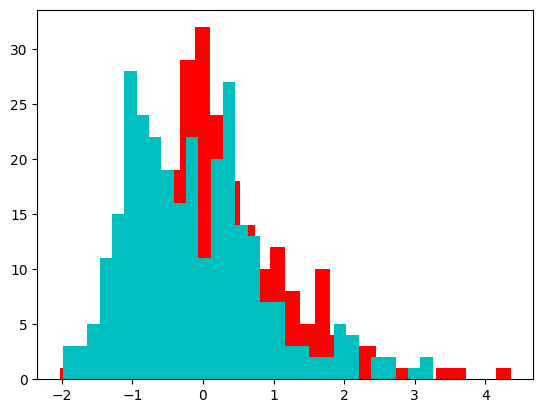

In [19]:
from matplotlib import pyplot as plt

features=char_csv[char_csv['region_index']==50]
phen_csv['subject_id']=phen_csv['SUB_ID']
#remover columna de handedness antes de merge
phen_csv = phen_csv.drop(columns='HANDEDNESS_CATEGORY')
print('before dropna:', len(phen_csv))
phen_csv=phen_csv.query('DSM_IV_TR>=0 & DSM_IV_TR<=4 & GENERO==1').dropna()
print('after dropna:', len(phen_csv))
phen_csv=phen_csv[phen_csv!=-9999]
print('after 999', len(phen_csv))

for sub in (discard_q_csv['ID'].values.tolist()+discarded_quality_b["SUBJECT_ID"].values.tolist()):
    phen_csv = phen_csv.query('subject_id!=@sub')
print('after QA: ', len(phen_csv))

features_merge=features.merge(phen_csv, on='subject_id')

#print(len(np.unique(features_merge['subject_id'])))

#print(f'{sample}: ', len(phen_csv.query('EDAD>=19')))
#print(f'{sample} ASD: ', len(phen_csv.query('EDAD>=19').query('DX_GROUP==1')))
#print(f'{sample} control: ', len(phen_csv.query('EDAD>=19').query('DX_GROUP==2')))

#print(np.shape(features_merge))

num_class={'ASD':(features_merge['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_merge['DX_GROUP']==1).value_counts()[0]}

print(num_class)

#features_balanced=balance_classes(features_merge, num_class)
features_balanced = features_merge
num_class_balanced={'ASD':(features_balanced['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_balanced['DX_GROUP']==1).value_counts()[0]}
print(num_class_balanced)

#features_balanced.iloc[:,:-4].to_csv('children_region_50.csv')

display(features_balanced)

pd.concat([features_balanced.iloc[:, 0:7], features_balanced.iloc[:, -5:]], axis=1).to_csv(f'{sample}_group.csv')

feature_matrix_p=features_balanced.iloc[:,7:250].values.astype(float)

feature_matrix_p=sklearn.preprocessing.scale(feature_matrix_p, axis=0, with_mean=True, with_std=True)



asd_index=np.where(features_balanced['DX_GROUP']==1)

control_index=np.where(features_balanced['DX_GROUP']==2)

subband=33

#0 alpha, 1 beta, 2 mu
feature=(subband-1)*3 + (1)

asd_row=feature_matrix_p[asd_index,feature].squeeze()

control_row=feature_matrix_p[control_index, feature].squeeze()

#w_value, p_value=scipy.stats.wilcoxon(asd_row, control_row)

print('datos de ASD: mean: '+str(np.mean(asd_row))+ '  '+'std: '+str(np.std(asd_row)))
print('datos de Control: mean: '+str(np.mean(control_row))+ '  '+'std: '+str(np.std(control_row)))

plt.hist(asd_row, bins=30, color='r')
plt.hist(control_row, bins=30, color='c')

#print(p_value)


In [20]:
#descartar el centro IP en todas sus presentaciones...
#discard_centers = ['IP_1']
#for center in discard_centers:
#    char_csv = char_csv[char_csv['site_id']!=center]

char_csv['site_id'].unique()

array(['EMC_1', 'GU_1', 'IP_1', 'KKI_1', 'NYU_1', 'NYU_2', 'OHSU_1',
       'SDSU_1', 'STANFORD', 'TCD_1', 'UCD_1', 'UCLA_1', 'U_MIA_1',
       'USM_1', 'KKI', 'Leuven', 'MaxMun', 'NYU', 'OHSU', 'Olin', 'Pitt',
       'SDSU', 'Stanford', 'Trinity', 'UCLA', 'UM', 'USM', 'Yale'],
      dtype=object)

phen_csv = phen_csv.dropna()

#char_DSM = char_csv.merge(phen_csv.dropna(), on='subject_id')

sub_ids = pd.unique(char_csv['subject_id'])

phen_csv_merged = phen_csv[phen_csv['subject_id'].isin(sub_ids)]

num_class={'ASD':(phen_csv_merged['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(phen_csv_merged['DX_GROUP']==1).value_counts()[0]}

phen_csv_balanced = balance_classes(phen_csv_merged, num_class)

char_DSM = char_csv.merge(phen_csv_balanced.dropna(), on='subject_id') 

char_DSM.iloc[:,0:250].to_csv('adults_curvelet_sample.csv', index=False)

print(np.unique(char_DSM['subject_id']).shape)

display(char_DSM.iloc[7600:7610, :250])
#display(phen_csv_balanced[['subject_id','DX_GROUP', 'DSM_IV_TR']].values)


In [21]:
def get_quartiles(features):
    return np.array([np.percentile(features, 25), np.percentile(features, 75)] )

In [22]:
def compare_quartiles(quartiles):
    return [np.where(quartiles[:,0]==np.min(quartiles[:,0]))[0].squeeze()+1, np.where(quartiles[:,1]==np.max(quartiles[:,1]))[0].squeeze()+1]
    

# Probando false discovery rate

In [23]:
def run_statistical_test(data_A, data_B):
    _, p_shap_c1 = normaltest(data_A)
    _, p_shap_c2 = normaltest(data_B)
    
    if (p_shap_c1>0.05 and p_shap_c2>0.05):
        t_value, p_value=scipy.stats.ttest_ind(data_A, data_B, equal_var=False)
        test='t-test'         
    else:
        w_value, p_value=scipy.stats.mannwhitneyu(data_A, data_B)
        test='wilcoxon'
    
    return p_value, test
    

idx = region_idx[-4]
region_name = region_list[-4]

features=char_csv[char_csv['region_index']==idx]
phen_csv['subject_id']=phen_csv['SUB_ID']
phen_csv=phen_csv.dropna()
phen_csv=phen_csv[phen_csv!=-9999]
features_merge=features.merge(phen_csv.dropna(), on='subject_id')
    
    
    #TODO hacer funcion que balancee las clases
num_class={'ASD':(features_merge['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_merge['DX_GROUP']==1).value_counts()[0]}
    
print(num_class)
    #np.random.seed(94)
    #ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
    #ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2].iloc[ctrl_index,:]
    #asd_dataframe=features_merge[features_merge['DX_GROUP']==1]
    
    #features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
features_balanced=balance_classes(features_merge, num_class)
num_class_balanced={'ASD':(features_balanced['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_balanced['DX_GROUP']==1).value_counts()[0]}

feature_matrix_p=features_balanced.iloc[:,7:250].values
    
feature_matrix_p=sklearn.preprocessing.scale(feature_matrix_p, axis=0, with_mean=True, with_std=True)
    
dx_group=features_balanced['DX_GROUP'].values
    
subject_idx = features_balanced['subject_id'].values
    
sub_bands_region=[]

asd_idx = np.where(dx_group==1)[0].tolist()
ctrl_index = np.where(dx_group==2)[0].tolist()
class_k = len(features_balanced)

print(ctrl_index)
num_samples = 100

p_vals = []

for k in tqdm.tqdm(range(len(feature_matrix_p.T))):
    feature_vector = feature_matrix_p[:,k]
    asd_features = feature_vector[asd_idx]
    ctrl_features = feature_vector[ctrl_index]
    
    for j in range(num_samples):
        asd_sample = np.random.choice(asd_features, size=class_k * 70 // 100, replace=True)
        ctrl_sample = np.random.choice(ctrl_features, size=class_k * 70 // 100, replace=True)
        p_value, _ = run_statistical_test(asd_sample, ctrl_sample)
        p_vals.append(p_value)

print(len(p_vals))

p_vals_sort = np.sort(p_vals)
rank = [i+1 for i in range(len(p_vals))]
num_tests = len(p_vals)

q_vals = [p_vals_sort[-1]]

for j, r in enumerate(rank[::-1]):
    
    if r == num_tests:
        continue
        
    i = r-1
    p_val = p_vals_sort[i]
    
    pr = p_val * (num_tests/r)
    
    if pr < q_vals[j-1]:
        q_vals.append(pr)
    else:
        q_vals.append(q_vals[j-1])
    

In [24]:
def generate_q_values(p_vals):
    p_vals_sort = np.sort(p_vals)
    rank = [i+1 for i in range(len(p_vals))]
    num_tests = len(p_vals)

    q_vals = [p_vals_sort[-1]]

    for j, r in enumerate(rank[::-1]):

        if r == num_tests:
            continue

        i = r-1
        p_val = p_vals_sort[i]

        pr = p_val * (num_tests/r)

        if pr < q_vals[j-1]:
            q_vals.append(pr)
        else:
            q_vals.append(q_vals[j-1])
    
    return q_vals

In [25]:
def false_discovery_rate(feature_matrix_p, dx_group, k_partition, num_samples):
    p_vals=[]
    asd_idx = np.where(dx_group==1)[0].tolist()
    ctrl_index = np.where(dx_group==2)[0].tolist()
    class_k = len(features_balanced)
    
    for k in tqdm.tqdm(range(len(feature_matrix_p.T))):
        feature_vector = feature_matrix_p[:,k]
        asd_features = feature_vector[asd_idx]
        ctrl_features = feature_vector[ctrl_index]

        for j in range(num_samples):
            asd_sample = np.random.choice(asd_features, size=class_k * k_partition // 100, replace=True)
            ctrl_sample = np.random.choice(ctrl_features, size=class_k * k_partition // 100, replace=True)
            p_value, _ = run_statistical_test(asd_sample, ctrl_sample)
            p_vals.append(p_value)
    
    q_vals = generate_q_values(p_vals)
    
    return q_vals, np.sort(p_vals)[::-1]
    

In [26]:
def map_p_q(p_vals_asc, q_vals, p_val):
    #p_vals asc, p_values en orden ascendente
    #q vals, q values en orden ascendente
    dif = np.abs(p_vals_asc - p_val)
    dif_idx = np.where(dif == dif.min())[0][0]
    return q_vals[dif_idx]

q_vals, p_vals_asc = false_discovery_rate(feature_matrix_p, dx_group, 70, 100)

map_p_q(p_vals_asc, q_vals, )

plt.plot(p_vals_asc, q_vals)

In [27]:

#phen_csv=phen_csv.drop(columns='HANDEDNESS_CATEGORY')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import normaltest
import sklearn
from matplotlib.colors import Normalize

regions_subbands=[]

for i, idx in enumerate(region_idx):
    region_name=region_list[i]
    print(region_name)
    features=char_csv[char_csv['region_index']==idx]
    phen_csv['subject_id']=phen_csv['SUB_ID']
    phen_csv=phen_csv.dropna()
    phen_csv=phen_csv[phen_csv!=-9999]
    features_merge=features.merge(phen_csv.dropna(), on='subject_id')
    
    
    #TODO hacer funcion que balancee las clases
    num_class={'ASD':(features_merge['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_merge['DX_GROUP']==1).value_counts()[0]}
    
    print(num_class)
    #np.random.seed(94)
    #ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
    #ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2].iloc[ctrl_index,:]
    #asd_dataframe=features_merge[features_merge['DX_GROUP']==1]
    
    #features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    
    #no vamos a balancear clases...
    features_balanced = features_merge
    #features_balanced=balance_classes(features_merge, num_class)
    
    num_class_balanced={'ASD':(features_balanced['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_balanced['DX_GROUP']==1).value_counts()[0]}
    
    print('balanced')
    print(num_class_balanced)

    feature_matrix_p=features_balanced.iloc[:,7:250].values
    
    feature_matrix_p=sklearn.preprocessing.scale(feature_matrix_p, axis=0, with_mean=True, with_std=True)
    
    dx_group=features_balanced['DX_GROUP'].values
    
    subject_idx = features_balanced['subject_id'].values
    
    sub_bands_region=[]
    
    q_vals, p_vals_asc = false_discovery_rate(feature_matrix_p, dx_group, 70, 100)
    
    for k, feature_group in enumerate(np.arange(243).reshape(81,3)):
        
        significative_features={}
        feature_labels=['alpha', 'beta', 'mu']
        sig_features_list=[]
        sig_features_labels=[]
        for j, feat in enumerate(feature_group):
                #dsm=features_balanced['DSM_IV_TR'].values
                feature_matrix=feature_matrix_p[:, feat].reshape(-1,1)
                feature_vector=feature_matrix.reshape(-1)
                # 1 probamos con shappiro...
                _, p_shap_c1 = normaltest(feature_vector[np.where(dx_group==1)])
                _, p_shap_c2 = normaltest(feature_vector[np.where(dx_group==2)])
                
                if (p_shap_c1>0.05 and p_shap_c2>0.05):
                    
                    t_value, p_value=scipy.stats.ttest_ind(feature_vector[np.where(dx_group==1)], 
                                                   feature_vector[np.where(dx_group==2)], equal_var=False)
                    test='t-test'
                    
                else:
                    w_value, p_value=scipy.stats.mannwhitneyu(feature_vector[np.where(dx_group==1)], 
                                                   feature_vector[np.where(dx_group==2)])
                    
                    test='wilcoxon'
                    
                
                print('caracteristica numero: ' + str(feat+1))
                print('sub-banda: ' + str(k+1))
                print(test+': '+str(p_value))
            
                q_value = map_p_q(p_vals_asc, q_vals, p_value)
                
                if q_value<0.05:
                    #significative_features[feature_labels[j]]=p_value
                    #sig_features_list.append(feat)
                    #sig_features_labels.append(feature_labels[j])
                    
                    fig, axs = plt.subplots(2,2,figsize=(10,10), dpi=200)
                    
                    sub_bands_region.append(k+1)
                    
                    #asd=(np.std(feature_vector[np.where(dx_group==1)])/np.shape(feature_vector[np.where(dx_group==1)])[0])**-1*feature_vector[np.where(dx_group==1)]
                    #control=(np.std(feature_vector[np.where(dx_group==2)])/np.shape(feature_vector[np.where(dx_group==2)])[0])**-1*feature_vector[np.where(dx_group==2)]
                    
                    asd=feature_vector[np.where(dx_group==1)]
                    
                    control=feature_vector[np.where(dx_group==2)]
                    
                    print('quartiles')
                    quartiles = np.array([get_quartiles(asd), get_quartiles(control)])
                    comparison = compare_quartiles(quartiles)
                    quartile_idx = np.array(comparison)-1
                    comp_values = [row[comp] for row,comp in zip(quartiles.T, quartile_idx)]
                    
                    print(comparison)
                    print(comp_values)
                    
                    val_idx=0
                    comp_dict = {}
                    for comp,val in zip(comparison, comp_values):
                        features = feature_vector[np.where(dx_group==comp)]
                        subs_idx_df = subject_idx[np.where(dx_group==comp)]
                        sub_idx = (np.where(np.abs(features)>=abs(val))[0]).squeeze()
                        subs = subs_idx_df[sub_idx]
                        comp_dict[comp]=subs
                    
                    feature_concat=[*asd.reshape(-1).tolist(), *control.reshape(-1).tolist()]
                    #print(concat)
                    
                    asd_dx=1*np.ones(np.shape(feature_vector[np.where(dx_group==1)]))
                    ctrl_dx=2*np.ones(np.shape(feature_vector[np.where(dx_group==2)]))
                    
                    concat_dx=[*asd_dx.tolist(), *ctrl_dx.tolist()]
                    #print(concat_dx)
                    
                    scatter_dataframe_dx_group=pd.DataFrame(data={feature_labels[j]:feature_concat,
                                                'dx_group':concat_dx})
                    
                    
                    sns.boxplot(x='dx_group', y=feature_labels[j], data=scatter_dataframe_dx_group, palette=colors[i], ax=axs[0][0])
                    sns.distplot(scatter_dataframe_dx_group[feature_labels[j]], ax=axs[0][1], color='0.23', kde=False)
                    sns.distplot(scatter_dataframe_dx_group[scatter_dataframe_dx_group['dx_group']==1][feature_labels[j]], color=colors[i][0], ax=axs[1][0], kde=False)
                    sns.distplot(scatter_dataframe_dx_group[scatter_dataframe_dx_group['dx_group']==2][feature_labels[j]], color=colors[i][1], ax=axs[1][1], kde=False)
                    axs[1][0].set_title('Distribution '+feature_labels[j]+' '+'ASD')
                    axs[0][1].set_title('Comparison '+feature_labels[j]+' '+'ASD vs Controls')
                    axs[1][1].set_title('Distribution '+feature_labels[j]+' '+'Controls')
                    axs[0][0].set_title('Differences distribution ASD vs Controls')
                
                    #axs[0][1].hist(feature_concat)
                    #axs[1][0].hist(asd)
                    #axs[1][1].hist(control)
                    
                    fig.suptitle('Region: '+region_name+' Sub-band: '+str(k+1)+'\n Feature: '+feature_labels[j]+', Test: '+test+' P-value: '+str(np.round(p_value, decimals=4))+' Q-value: '+str(np.round(q_value, decimals=4)), fontsize=16)
                    
                    if not os.path.exists(os.getcwd()+f'/results_{sample}/'+region_name+'/1-sig'):
                        os.makedirs(os.getcwd()+f'/results_{sample}/'+region_name+'/1-sig')
                    fig.savefig(os.getcwd()+f'/results_{sample}/'+region_name+'/1-sig/'+'feature'+str(feat+1)+'-subband'+str(k+1)+'.pdf')
                    plt.close(fig)
                    pd.DataFrame.from_dict(comp_dict, orient='index').transpose().to_csv(os.getcwd()+f'/results_{sample}/'+region_name+'/1-sig/'+'subjects-feature'+str(feat+1)+'-subband'+str(k+1)+'.csv',index=False)
        feature_matrix_list=np.array(sig_features_list)
    regions_subbands.append(np.unique(sub_bands_region))

    fig,axs=plt.subplots(1,1, figsize=(5,5), dpi=200, subplot_kw=dict(projection='polar'))

    curv_bands=np.zeros(81)
    
    if not os.path.exists(os.getcwd()+f'/results_{sample}/'+region_name):
        os.makedirs(os.getcwd()+f'/results_{sample}/'+region_name)
        
    if not np.unique(sub_bands_region).size == 0:
        curv_bands[[subband-1 for subband in np.unique(sub_bands_region)]]=1
    
    fig.suptitle('Discriminant Subbands \n Region: '+region_name, fontsize=14)
    
    bulls_eye(axs, curv_bands, cmap='RdBu', norm=Normalize(vmin=-1.6, vmax=1.6), raidal_subdivisions=(1,16,32,32),
    centered=(True, True, True, True), add_nomenclatures=False, cell_resolution=16,
              pfi_where_to_save=os.getcwd()+f'/results_{sample}/'+region_name+'/sub-bands-plot.pdf', colors_bound='0.20')
    
    plt.tight_layout()
    plt.close(fig)
    

Left Frontal Pole
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:35<00:00,  6.79it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.0010644153389267694
quartiles
[2, 1]
[-0.8883602074561724, 1.0086776640888622]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.001203734621009905
quartiles
[2, 1]
[-0.9882176482165568, 1.0811455886623371]
caracteristica numero: 3
sub-banda: 1
t-test: 0.2081216158224681
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.18750140178892966


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.14228579576450456
caracteristica numero: 6
sub-banda: 2
t-test: 0.9804993527344018
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.08041437721190181
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.015023288600103891
caracteristica numero: 9
sub-banda: 3
t-test: 0.8584093610477884
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.13563104857955366
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.01773117605463996
caracteristica numero: 12
sub-banda: 4
t-test: 0.8584093610477895
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.25908257373319094
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.0623718755795368
caracteristica numero: 15
sub-banda: 5
t-test: 0.5977689787412725
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.08168095591718055
caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.012782753366849428
caracteristica numero: 18
sub-banda: 6
wilcoxon: 0.28658328496339436
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 208
sub-banda: 70
t-test: 0.9262415788623353
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.22062439629988556
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.000841908759825866
quartiles
[1, 2]
[-0.2823644901201525, 0.32309313062369144]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.33879395635467296
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.17108479630354245
caracteristica numero: 213
sub-banda: 71
t-test: 0.49902194325988836
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.31165759617527466
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.2689071185261701
caracteristica numero: 216
sub-banda: 72
wilcoxon: 0.21984330622011833
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.42131939384653627
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.4279300865902587
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.1095704007778951
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.48958873001469244
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.49400517747425177
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.4424591924748067
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.15586983555587064
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.16251840560792202
caracteristi

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Frontal Pole
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:44<00:00,  5.50it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.00011608068263029231
quartiles
[2, 1]
[-1.1984511562852926, 0.8247272516368334]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 7.506673172825636e-05
quartiles
[2, 1]
[-1.284100546519946, 0.8283228201948701]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.01901337831564641
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.12221989048850651
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.01975919569322846
caracteristica numero: 6
sub-banda: 2
t-test: 0.1892148956374779
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.035321564326011565
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.003402466826442008
quartiles
[2, 1]
[-0.7809042130316252, 0.8048554519313155]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 9
sub-banda: 3
t-test: 0.688180247381079
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.022795209641769246
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.0010891145745908029
quartiles
[2, 1]
[-0.7432751800185656, 0.6857379617019308]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 12
sub-banda: 4
t-test: 0.6881802473810794
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.08934222581061346
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.026699847293691393
caracteristica numero: 15
sub-banda: 5
t-test: 0.3806784858421728
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.0340677027542081
caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.012713335717535908
quartiles
[2, 1]
[-0.6832505628834199, 0.7114868916798573]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 18
sub-banda: 6
wilcoxon: 0.40183104724782925
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.02624723816143593
caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.02592788806638929
caracteristica numero: 21
sub-banda: 7
wilcoxon: 0.3793691330306145
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.012922572896053674
quartiles
[2, 1]
[-0.6893915934880062, 0.8504123837014219]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.005963207446089192
quartiles
[2, 1]
[-0.6884046768952065, 0.9321249608032012]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 24
sub-banda: 8
wilcoxon: 0.3793691330306145
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.021084073593191293
caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.002088834083951171
quartiles
[2, 1]
[-0.7727800260662351, 0.8545124766303002]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 27
sub-banda: 9
wilcoxon: 0.3514220820277435
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.0790072767660942
caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.013045997912485877
quartiles
[2, 1]
[-0.7814476862517145, 0.9215203213364769]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 30
sub-banda: 10
t-test: 0.2743471686770456
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.02719200058316917
caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.0018735774631898617
quartiles
[2, 1]
[-0.7188438045664485, 0.7504963575713137]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 33
sub-banda: 11
wilcoxon: 0.44121051600151295
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.008585572677970162
quartiles
[2, 1]
[-0.6578477427683511, 0.6533219798318357]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.0003671921153832679
quartiles
[2, 1]
[-0.762202843447568, 0.8186844483867677]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 36
sub-banda: 12
wilcoxon: 0.44121051600151295
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.10770344591924857
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.033513561807125246
caracteristica numero: 39
sub-banda: 13
t-test: 0.9678565471544927
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.011889089798035478
quartiles
[2, 1]
[-0.733847123439713, 0.6939320204332169]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.0035511829171204295
quartiles
[2, 1]
[-0.7735783970353993, 0.7787290349178645]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 42
sub-banda: 14
t-test: 0.637000321692903
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.02124477329124248
caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.023255323809800138
caracteristica numero: 45
sub-banda: 15
wilcoxon: 0.1303066606285802
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.011630182224840215
quartiles
[2, 1]
[-0.6976319557936993, 0.8054555792773032]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.005813325245273234
quartiles
[2, 1]
[-0.7629605693223883, 0.8224894585940256]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 48
sub-banda: 16
wilcoxon: 0.1303066606285802
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.012887494598901027
quartiles
[2, 1]
[-0.6848660685160901, 0.8147460353099107]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.001191169343766642
quartiles
[2, 1]
[-0.7354425275756926, 0.9254613061078513]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 51
sub-banda: 17
wilcoxon: 0.1293038220802964
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.10299469042279719
caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.04132366864554939
caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.29817785397639246
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.061406615992689345
caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.025330076301587515
caracteristica numero: 57
sub-banda: 19
t-test: 0.14724742948020192
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.057905762807551504
caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.028029065260794423
caracteristica numero: 60
sub-banda: 20
wilcoxon: 0.21503611071087464
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.02039954250862404
caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.009579512449000238
quartiles
[2, 1]
[-0.7626290847978676, 0.5919966858810334]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 63
sub-banda: 21
t-test: 0.21621575759300798
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.04415144893154606
caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.01933357409033018
caracteristica numero: 66
sub-banda: 22
t-test: 0.21621575759300563
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.036234168021543105
caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.018625492400014373
caracteristica numero: 69
sub-banda: 23
wilcoxon: 0.27012641242040125
caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.1420486193149234
caracteristica numero: 71
sub-banda: 24
wilcoxon: 0.1288598374811733
caracteristica numero: 72
sub-banda: 24
t-test: 0.9675156120434134
caracteristica numero: 73
sub-banda: 25
wilcoxon: 0.07723655212984983
caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.047081350412725556
caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.1418117106271185
caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.06001205835174235
caracteristica numero: 77
s

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.09816314821062244
caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.08425914327309891
caracteristica numero: 81
sub-banda: 27
wilcoxon: 0.2669966849248354
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.0790849565363353
caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.07527135280476112
caracteristica numero: 84
sub-banda: 28
wilcoxon: 0.12534602097508069
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.08192010473000838
caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.08507722340795698
caracteristica numero: 87
sub-banda: 29
t-test: 0.7087188479281252
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.17554243536355124
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.18906655439558
caracteristica numero: 90
sub-banda: 30
t-test: 0.7087188479281286
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.04549654854441468
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.011219894273088456
quartiles
[2, 1]
[-0.696944086

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 93
sub-banda: 31
t-test: 0.8979306775258007
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.05870414397044982
caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.022568044285291147
caracteristica numero: 96
sub-banda: 32
t-test: 0.745216635891912
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.09332373027024254
caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.036909932272404126
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.05032890896445383
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.09852880472862074
caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.03967159064233026
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.3989783728650771
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.0403075683818921
caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.015043294841245298
quartiles
[2, 1]
[-0.7214592855999544, 0.7947441406742654]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 105
sub-banda: 35
t-test: 0.5354313873436487
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.025706282516139253
caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.011407667744961403
quartiles
[2, 1]
[-0.760549191941349, 0.7508948375136724]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 108
sub-banda: 36
wilcoxon: 0.453303697441025
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.005954296910184915
quartiles
[2, 1]
[-0.6122420540396087, 0.32427448197740033]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.002775344284029147
quartiles
[2, 1]
[-0.7789842863238181, 0.5776060605542924]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 111
sub-banda: 37
t-test: 0.48587404291705283
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.09944730673898272
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.04908405700734719
caracteristica numero: 114
sub-banda: 38
t-test: 0.4858740429170464
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.037855897307537766
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.019885882161008984
caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.20425894168876213
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.1391064929731361
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.11016476531869046
caracteristica numero: 120
sub-banda: 40
wilcoxon: 0.4281370071880728
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.06321796884495881
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.03908836920350587
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.35927665455328306
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.057905762807551504
caracteris

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.05754016959315603
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.05538459852978023
caracteristica numero: 216
sub-banda: 72
t-test: 0.24401602636399192
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.08573596216251178
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.08344698127142502
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.26803788938796946
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.11206216776843758
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.11623589312318766
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.144552333804509
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.09411782190241524
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.10356310322612816
caracteristica numero: 225
sub-banda: 75
wilcoxon: 0.2173545107908021
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.23495320571186257
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.2626804342815412
caracteristi

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Insular Cortex
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:47<00:00,  5.13it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.04474525958461268
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.4526770260906411
caracteristica numero: 3
sub-banda: 1
t-test: 1.1548508078539022e-05
quartiles
[2, 1]
[-0.8703820668583396, 0.8717023527173249]
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.0004032221949694015
quartiles
[2, 1]
[-0.8747469120311122, 0.7308126401123289]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.007784246736711663
quartiles
[2, 1]
[-0.8205421090175319, 0.8377821428652239]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 6
sub-banda: 2
t-test: 0.1844604146277725
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.0013478505080693256
quartiles
[2, 1]
[-0.7865934025309318, 0.4928512870677064]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.00824724467022863
quartiles
[2, 1]
[-0.7829050644406038, 0.6764934120045742]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.07670366519645043
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.00043834430438444003
quartiles
[2, 1]
[-0.7806141368768824, 0.6864561241020608]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.0015101605181898987
quartiles
[2, 1]
[-0.8280437667500717, 0.8008007434373232]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.07670366519645043
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.003032869919405202
quartiles
[2, 1]
[-0.8308847127887492, 0.6988726077978529]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.023342459805982492
quartiles
[2, 1]
[-0.8109797589996847, 0.842311618291906]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.3883299798113907
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.0021702204582067534
quartiles
[2, 1]
[-0.806237543150494, 0.6759698371058851]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.006254658463413068
quartiles
[2, 1]
[-0.7540631845229934, 0.7691364495143467]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 18
sub-banda: 6
wilcoxon: 0.007349634167184572
quartiles
[1, 2]
[-1.0707819110186691e-18, 1.005064441405003e-18]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.001066296886816981
quartiles
[2, 1]
[-0.7717853947637823, 0.7069441293796688]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.005683861940684045
quartiles
[2, 1]
[-0.7519383381108318, 0.7664475638795377]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 21
sub-banda: 7
t-test: 0.3523685615422093
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.003338185998487199
quartiles
[2, 1]
[-0.7855991642821699, 0.5589720136080176]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.02270979784583705
quartiles
[2, 1]
[-0.7985841504976646, 0.7274784423502887]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 24
sub-banda: 8
t-test: 0.3523685615422093
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.0005719727716224374
quartiles
[2, 1]
[-0.7963556565342172, 0.5875721447285548]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.005506914537239521
quartiles
[2, 1]
[-0.8391696187371956, 0.7582964521244424]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 27
sub-banda: 9
wilcoxon: 0.2279642461079921
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.0011084702860119494
quartiles
[2, 1]
[-0.8719373637449495, 0.6291304474853086]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.02066056144813409
quartiles
[2, 1]
[-0.844302500279996, 0.7581290454493206]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 30
sub-banda: 10
t-test: 0.5731373901349406
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.0028343662100079473
quartiles
[2, 1]
[-0.7155894802827627, 0.5500479776937727]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.011938187663332014
quartiles
[2, 1]
[-0.7840678662389134, 0.7149938003743624]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 33
sub-banda: 11
wilcoxon: 0.34266107442620186
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.0028851895850695204
quartiles
[2, 1]
[-0.7045523349416641, 0.4803142277305748]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.010554192069045381
quartiles
[2, 1]
[-0.723218104352151, 0.7491847868980184]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 36
sub-banda: 12
wilcoxon: 0.34266107442620186
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.0019538616133450747
quartiles
[2, 1]
[-0.7756694095744532, 0.6554221305661533]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.016052051124573485
quartiles
[2, 1]
[-0.729033766792652, 0.8179538779677996]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 39
sub-banda: 13
wilcoxon: 0.3999965625473415
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.004558413293437967
quartiles
[2, 1]
[-0.7894065469757289, 0.5936791377776253]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.015967584638865506
quartiles
[2, 1]
[-0.7953499608213118, 0.8131498760378166]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 42
sub-banda: 14
wilcoxon: 0.2171994991651004
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.006116505950686371
quartiles
[2, 1]
[-0.8388843286820011, 0.6838954171694972]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.027691699361375572
caracteristica numero: 45
sub-banda: 15
wilcoxon: 0.3876229736138771
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.0013385457202644262
quartiles
[2, 1]
[-0.7684109271062834, 0.5866588244288343]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.01311698299377832
quartiles
[2, 1]
[-0.770896816195739, 0.7573628727488679]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 48
sub-banda: 16
wilcoxon: 0.3876229736138771
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.003375549172515511
quartiles
[2, 1]
[-0.7484638258562123, 0.5239775547388597]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.022036165701381633
quartiles
[2, 1]
[-0.7868316764637687, 0.6678890388253018]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 51
sub-banda: 17
t-test: 0.07633549845611391
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.002761882334196127
quartiles
[2, 1]
[-0.7337948210612621, 0.5561845272563034]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.014032846662851128
quartiles
[2, 1]
[-0.7777744332082733, 0.7602601359348261]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.28838076508876076
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.4432919619334108
caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.3759626289701785
caracteristica numero: 57
sub-banda: 19
wilcoxon: 0.462298010854762
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.00025044200934337083
quartiles
[2, 1]
[-0.7718926952893341, 0.6738108160301832]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.004899254129558419
quartiles
[2, 1]
[-0.3800491785178198, 0.5560383429000658]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 60
sub-banda: 20
t-test: 0.39531387446537647
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.00042525686601718667
quartiles
[2, 1]
[-0.8055399144911751, 0.7099038285773946]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.01388270473327829
quartiles
[2, 1]
[-0.7368657341324905, 0.6990423768286973]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 63
sub-banda: 21
t-test: 0.5700774561197383
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.00031229974961881064
quartiles
[2, 1]
[-0.8348332056201835, 0.7646713746331386]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.010120277815675052
quartiles
[2, 1]
[-0.7521512341911322, 0.7925356214804793]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 66
sub-banda: 22
t-test: 0.5700774561197359
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.4374680401787783
caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.3153962162127014
caracteristica numero: 69
sub-banda: 23
t-test: 0.1676747160926278
caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.23804260251250364
caracteristica numero: 71
sub-banda: 24
wilcoxon: 0.37916848804801756
caracteristica numero: 72
sub-banda: 24
wilcoxon: 0.13244139917081066
caracteristica numero: 73
sub-banda: 25
wilcoxon: 0.029982148743189597
caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.13482874548816548
caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.003951907261405467
quartiles
[1, 2]
[0.018807048215981774, 0.036677960089218316]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.0058922530365603885
quartiles
[2, 1]
[-0.7271718675668333, 0.6671203840330371]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.05312188903997015
caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.35122651428577045
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.001562754444805519
quartiles
[2, 1]
[-0.8247460573320966, 0.720825440524807]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.014864060344485388
quartiles
[2, 1]
[-0.8267324909730317, 0.738110803690435]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 81
sub-banda: 27
t-test: 0.6386781670351749
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.009867469824330474
quartiles
[2, 1]
[-0.8407508256757359, 0.7760016644819084]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.0437591165285646
caracteristica numero: 84
sub-banda: 28
wilcoxon: 0.46261214006320606
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.0032334740941884314
quartiles
[2, 1]
[-0.8494266359759761, 0.7426792151739107]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.017230356653873277
quartiles
[2, 1]
[-0.8552999203478842, 0.7925726570776491]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 87
sub-banda: 29
wilcoxon: 0.40285113701788944
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.009881368651844722
quartiles
[2, 1]
[-0.8200477590282034, 0.7507654472443517]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.05392555960168518
caracteristica numero: 90
sub-banda: 30
wilcoxon: 0.40285113701788944
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.012558337655632168
quartiles
[2, 1]
[-0.792350841080511, 0.6636897474671045]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.060074904633042374
caracteristica numero: 93
sub-banda: 31
t-test: 0.5397920848113555
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.011470862735309891
quartiles
[2, 1]
[-0.7960213216296558, 0.5457031452033658]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.041886596791589494
caracteristica numero: 96
sub-banda: 32
wilcoxon: 0.35122651428577045
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.003854138138036392
quartiles
[2, 1]
[-0.7548125975016323, 0.49613916393623614]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.026765034780233815
quartiles
[2, 1]
[-0.7845828619490773, 0.7760052492431896]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.4322794950111446
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.0038120500103173073
quartiles
[2, 1]
[-0.7157342720792718, 0.542593617151031]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.019111416269637003
quartiles
[2, 1]
[-0.7470809940147142, 0.7656709771024948]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.33072849547506955
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.023371566129278827
quartiles
[2, 2]
[-0.6756863533673267, 0.06771552922931806]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.04791646262862806
caracteristica numero: 105
sub-banda: 35
wilcoxon: 0.3096095676663183
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.0005279865070923813
quartiles
[2, 1]
[-0.7021534637873085, 0.7327935622288009]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.007943626670330172
quartiles
[2, 1]
[-0.3450183501796888, 0.5525439115727905]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 108
sub-banda: 36
wilcoxon: 0.09045440124615145
caracteristica numero: 109
sub-banda: 37
wilcoxon: 8.9827504190236e-05
quartiles
[2, 1]
[-0.8655984091921843, 0.7664280861037138]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.0036535428603618287
quartiles
[2, 1]
[-0.8300816501385995, 0.7343278132004468]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 111
sub-banda: 37
t-test: 0.9565716952889727
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.006835291072509799
quartiles
[2, 1]
[-0.7623379820207548, 0.6815285194862508]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.06420530549747852
caracteristica numero: 114
sub-banda: 38
t-test: 0.9565716952889707
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.1441928512980431
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.375762544132684
caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.3248251662745716
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.10838858705245952
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.21029051770946633
caracteristica numero: 120
sub-banda: 40
wilcoxon: 0.1962817926305267
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.02066056144813409
quartiles
[2, 1]
[-0.7988701026025254, 0.5493043643007909]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.09616979560508038
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.11852039073544973
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.011486708916865727
quartiles
[2, 1]
[-0.754969883700319, 0.5508544359491432]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.09209833200758288
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.3955216653370647
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.002989308694563252
quartiles
[2, 1]
[-0.7731992883845157, 0.7038275388409898]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.030270162329379468
caracteristica numero: 129
sub-banda: 43
wilcoxon: 0.036234168021543105
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.0163292169422959
quartiles
[2, 1]
[-0.8230911664592561, 0.6162778485607339]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.06717070034149648
caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.421731933251336
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.005342961210284927
quartiles
[2, 1]
[-0.8136507613734119, 0.661048592988201]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.03140795501198794
caracteristica numero: 135
sub-banda: 45
wilcoxon: 0.029342420993012694
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.007164025776195357
quartiles
[2, 1]
[-0.82839809136828, 0.6922309487505238]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.050767752588205574
caracteristica numero: 138
sub-banda: 46
wilcoxon: 0.029342420993012694
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.00818807711432256
quartiles
[2, 1]
[-0.8014101623706881, 0.559763219526354]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.04151062604493889
caracteristica numero: 141
sub-banda: 47
wilcoxon: 0.31408551303270926
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.006977436625075663
quartiles
[2, 1]
[-0.7633312917759709, 0.522393199798075]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.027524289539060394
caracteristica numero: 144
sub-banda: 48
t-test: 0.02025473990929038
quartiles
[2, 1]
[-0.7598970806339042, 0.8128695246965411]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.004358821636817843
quartiles
[2, 1]
[-0.780867189675054, 0.5935058601887423]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.031259185005575674
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.4161700797705011
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.001191169343766642
quartiles
[2, 1]
[-0.778919976030098, 0.697533848859468]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.022938164125542802
quartiles
[2, 1]
[-0.789000711513903, 0.748389225718563]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.07784900454646006
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.0019375591113918805
quartiles
[2, 1]
[-0.8269599331867977, 0.7773230977963119]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.034107570865880746
caracteristica numero: 153
sub-banda: 51
wilcoxon: 0.04127703609359074
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.05645427631584593
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.1151054362396034
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.13053024239571115
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.06723930612229452
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.10384816181131462
caracteristica numero: 159
sub-banda: 53
t-test: 0.5134907280445974
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.3159586554933244
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.32558445876917735
caracteristica numero: 162
sub-banda: 54
t-test: 0.5134907280445962
caracteristica numero: 163
sub-banda: 55
wilcoxon: 8.213322552329287e-06
quartiles
[2, 1]
[-0.18558738269227865, -0.1543688320806433]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 164
sub-banda: 55
wilcoxon: 4.9048916078665665e-05
quartiles
[2, 1]
[-0.1339594158719202, -0.13392971977811174]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.10214632576943283
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.000719801854055397
quartiles
[2, 1]
[-0.8155421428631519, 0.815691303412547]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.012887494598901027
quartiles
[2, 1]
[-0.7508334971952344, 0.8785343330470607]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 168
sub-banda: 56
t-test: 0.05799044928839693
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.002099290308011404
quartiles
[2, 1]
[-0.8154924489785788, 0.783047713688687]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.0287833291050175
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.44474990918524665
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.0006035246450996666
quartiles
[2, 1]
[-0.8182137706487785, 0.786568403358924]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.012627022558443295
quartiles
[2, 1]
[-0.5114758674652822, 0.7324783092401969]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.4646021680204437
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.00042930723977500955
quartiles
[2, 1]
[-0.7607512097381202, 0.8474817042271234]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.0037703743496676594
quartiles
[2, 1]
[-0.3614019277590215, 0.5588152985320336]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 177
sub-banda: 59
t-test: 0.328533162051016
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.007269576841733008
quartiles
[2, 1]
[-0.6490480218409751, 0.7353132937039517]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.039043796649832214
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.0005946637981160686
quartiles
[1, 2]
[-1.517665314458053e-19, 1.6187990005380722e-19]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.02955439228609422
caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.08369000967807194
caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.21013846502222544
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.011391916339592986
quartiles
[2, 1]
[-0.538135890204275, 0.7381266871352581]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.02892226503518447
caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.21013846502222544
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.05473882611893712
caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.2678642134571152
caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.21426651325400303
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.014784991861472564
quartiles
[2, 1]
[-0.7274551082390044, 0.7692243195767728]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.18949480680778258
caracteristica numero: 192
sub-banda: 64
wilcoxon: 0.1391064929731361
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.0005460040379444052
quartiles
[2, 1]
[-0.794512937408382, 0.8192006820082054]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.010234438977641164
quartiles
[2, 1]
[-0.5558910971985411, 0.6537461828203172]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.036613028109447436
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.0012706094644709344
quartiles
[2, 1]
[-0.8089925998982306, 0.7288829814836097]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.027758900475339267
caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.0889171856518674
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.0005270018455625572
quartiles
[2, 1]
[-0.8159102947278362, 0.7179021721434716]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.00790923428325121
quartiles
[2, 1]
[-0.8275829462290596, 0.8061161020037743]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 201
sub-banda: 67
t-test: 0.8808437248049319
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.006675976274206609
quartiles
[2, 1]
[-0.2487385467723627, -0.22789761433256608]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.01340427138834828
quartiles
[2, 1]
[-0.19223708286801633, -0.1922121960421984]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.4669075128426914
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.061534638957893205
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.20440846434177734
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.464811696901623
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.4020350119443062
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.34888275748221464
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.46198390057607014
caracteristica numero: 211
sub-banda: 71
wilcoxon: 9.466333068518297e-05
quartiles
[2, 1]
[-0.2077467030894022, -0.18130917139048547]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.00028893712167515727
quartiles
[2, 1]
[-0.1271317496602057, -0.12711403834828022]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.014298963925257134
quartiles
[1, 2]
[-3.627776716136685e-19, 3.7264203949900224e-19]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.00012974748038081205
quartiles
[2, 1]
[-0.8365972848691605, 0.7931007890844861]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.0018485270381200303
quartiles
[2, 1]
[-0.8153846737794842, 0.8828567757964497]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 216
sub-banda: 72
wilcoxon: 0.2582297113847543
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.0031367444913367295
quartiles
[2, 1]
[-0.8321345217957242, 0.783585512350121]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.036528558123306354
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.11459418477113692
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.00030689486792715695
quartiles
[2, 1]
[-0.8248348565938433, 0.7539625076344747]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.006519952480944563
quartiles
[2, 1]
[-0.6061810991574524, 0.7441570211400013]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.08231985806322961
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.0012639922641373448
quartiles
[2, 1]
[-0.7684121105320724, 0.7754528437493023]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.009193945181344513
quartiles
[2, 1]
[-0.37078041388861643, 0.573233652450347]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 225
sub-banda: 75
wilcoxon: 0.469423698526732
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.0015951069479162062
quartiles
[2, 1]
[-0.6880891844342382, 0.7392688766063858]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.013549941978587521
quartiles
[2, 1]
[-0.22668985414026052, 0.563501227444581]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.36500886747831474
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.004959479471025921
quartiles
[2, 1]
[-0.6297952184767834, 0.737637996497626]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.01963319497075527
quartiles
[2, 1]
[-0.12298363685032966, 0.5319375333676902]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.4879065501424235
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.030197944825598764
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.07572144217666181
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.46711704335570325
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.030451332490027277
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.1987725098066076
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.3753624747123335
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.0015205483154661606
quartiles
[2, 1]
[-0.7252592232055173, 0.7480187927550093]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.03092658264000377
caracteristica numero: 240
sub-banda: 80
t-test: 0.6570760061168888
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.00045954291996716426
quartiles
[2, 1]
[-0.8027350033885917, 0.7780296973306484]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.007649881902239303
quartiles
[2, 1]
[-0.5941487999897531, 0.6449484263601473]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.4690042467004763


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Insular Cortex
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.30it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.11206216776843758
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.020529700521621886
caracteristica numero: 3
sub-banda: 1
wilcoxon: 5.727132474904988e-06
quartiles
[2, 1]
[-0.9584847842305702, 0.8523530910566924]
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.16200051945564742
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.4824412335752381
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.1179462686262659
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.006705595382932813
quartiles
[2, 1]
[-0.7716666388494189, 0.9099822936488875]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.018362745797443177
caracteristica numero: 9
sub-banda: 3
t-test: 0.37674166197717607
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.01039324367017567
quartiles
[2, 1]
[-0.8509493116586752, 0.8134064910112095]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.03644424765620424
caracteristica numero: 12
sub-banda: 4
t-test: 0.37674166197717585
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.0048768381980092285
quartiles
[2, 1]
[-0.8049950384554727, 0.7644621980474049]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.06676020173722368
caracteristica numero: 15
sub-banda: 5
t-test: 0.49190140716989994
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.09917110138083307
caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.39106048862958975
caracteristica numero: 18
sub-banda: 6
t-test: 0.15927936366471449
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.059013504531592174
caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.29072541904672033
caracteristica numero: 21
sub-banda: 7
wilcoxon: 0.1732369590347722
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.07519653660680786
caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.33609701861669494
caracteristica numero: 24
sub-banda: 8
wilcoxon: 0.1732369590347722
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.03615041423597562
caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.06089660372400648
caracteristica numero: 27
sub-banda: 9
wilcoxon: 0.30988845275917665
caracteristica numero: 28
sub-banda: 10

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.022175097439234258
caracteristica numero: 33
sub-banda: 11
t-test: 0.5547519607614545
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.002609123979158557
quartiles
[2, 1]
[-0.8254644905350116, 0.7663971000106651]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.015043294841245298
caracteristica numero: 36
sub-banda: 12
t-test: 0.5547519607614539
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.01628631110664723
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.15336112471415697
caracteristica numero: 39
sub-banda: 13
wilcoxon: 0.1330071347908388
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.05132058595821882
caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.23560175808255823
caracteristica numero: 42
sub-banda: 14
t-test: 0.02903624708946954
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.06772106445401112
caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.4104199242230253
caracteristica numero: 45
sub-banda: 15
wilcoxon: 0.11967446311355684
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.10858491644922463
caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.40428037289668417
caracteristica numero: 48
sub-banda: 16
wilcoxon: 0.11967446311355684
caracteristica numero: 49


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.010524768219690355
quartiles
[2, 1]
[-0.04254327938894211, -0.04225911283746097]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.11327249996923339
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.002199195762133814
quartiles
[2, 1]
[-0.09706215234414539, -0.023733159373033497]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.013623288279856021
caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.2578889743777818
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.0008381324194893044
quartiles
[2, 1]
[-0.13560462792594644, -0.09556934423328636]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.006245363059617112
quartiles
[2, 1]
[-0.08313686650439381, -0.08306278624003344]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.2578889743777818
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.0022544712722191705
quartiles
[2, 1]
[-0.7666189532899735, 0.8097704193032741]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 164
sub-banda: 55
t-test: 0.005264825806900077
quartiles
[2, 1]
[-0.7226078636142768, 0.865014597790289]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.07677962026782922
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.03949138898327413
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.1713528775505449
caracteristica numero: 168
sub-banda: 56
t-test: 0.2486501137577059
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.08336608978486293
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.2821129684816691
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.26925520604883457
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.43435356370559774
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.2687331595336262
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.010320795373570222
quartiles
[1, 2]
[0.08873921363489712, 0.10984923440736802]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.3955216653370647
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.3906556273246311
caracteristica numero: 177
sub-banda: 59
t-test: 0.9850405038150541
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.4128819957332546
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.4242089584432955
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.017823556053704847
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.202469755060813
caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.1242617998125235
caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.09192425208999938
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.12232676861039837
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.21519022258438475
caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.09192425208999938
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.1587881145797171
caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.2694293345188534
caracteristica nu

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.10518596120881207
caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.1952617270641735
caracteristica numero: 192
sub-banda: 64
t-test: 0.37202824922325795
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.23236888697275487
caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.42937894382456704
caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.2369018204052708
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.0871484477846996
caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.34888275748221464
caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.30849494242825
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.1279750434076133
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.4242089584432955
caracteristica numero: 201
sub-banda: 67
wilcoxon: 0.20157868667590095
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.003478865413017387
quartiles
[2, 1]
[-0.12241803404155928, -0.002783846782184289]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.02050361277805172
caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.19671995076451948
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.0005500843970031711
quartiles
[2, 1]
[-0.13281674327293727, -0.08949926396815133]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.003248990112234653
quartiles
[2, 1]
[-0.08419240021694287, -0.08415239940133751]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.1484242399961861
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.0002365214573173263
quartiles
[2, 1]
[-0.2156808154733188, -0.18991372584052885]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.0037232456218033554
quartiles
[2, 1]
[-0.15185887296918574, -0.1518004335036287]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.10195844552743938
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.0015788551623040702
quartiles
[2, 1]
[-0.7812803241590767, 0.8142510867770498]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 212
sub-banda: 71
t-test: 0.003442449537158834
quartiles
[2, 1]
[-0.7554499519079899, 0.8426177929973971]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.26630368522309517
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.018386500664650283
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.07512177712036729
caracteristica numero: 216
sub-banda: 72
wilcoxon: 0.08434068463560762
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.022568044285291147
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.10848671979906793
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.170015155638427
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.4666978889873661
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.24677688555395072
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.02854152656274315
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.08673121875326584
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.26908113404124967
caracteristica numero: 225
sub-banda: 75
t-test: 0.6968924934043601
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.18132122431429953
caracteris

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Superior Frontal Gyrus
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.30it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.012069975979450582
quartiles
[2, 1]
[-0.7271540120463297, 0.7372609779915135]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.00944499077790972
quartiles
[2, 1]
[-0.340489671552404, 0.6525386327863327]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.08985426692358345
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.0623718755795368
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.03174482861145905
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.4828615399414428
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.009812045091408999
quartiles
[2, 1]
[-0.7080280295211734, 0.3812507852474559]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.0063766182803373156
quartiles
[2, 1]
[-0.7961920474935281, 0.5767821938212762]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 9
sub-banda: 3
t-test: 0.8369067682927894
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.0623718755795368
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.039897782372202595
caracteristica numero: 12
sub-banda: 4
t-test: 0.8369067682927858
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.016243501867780903
quartiles
[2, 1]
[-0.8268500188349684, 0.5998430097865826]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.008796874204677362
quartiles
[2, 1]
[-0.7982142907343065, 0.746388358942203]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.4390267408762053
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.015325795369382776
quartiles
[2, 1]
[-0.8199306071525944, 0.6831951703774981]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.010837311789557293
quartiles
[2, 1]
[-0.8580857560763478, 0.7305889436005122]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 18
sub-banda: 6
t-test: 0.24367126398925332
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.008487686664095589
quartiles
[2, 1]
[-0.8279360784938634, 0.7201530230709401]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.0048693865592735345
quartiles
[2, 1]
[-0.8532533161881072, 0.7855397579552936]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 21
sub-banda: 7
wilcoxon: 0.21984330622011833
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.0468744061727258
caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.03163220724849875
caracteristica numero: 24
sub-banda: 8
wilcoxon: 0.21984330622011833
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.020115654971838842
caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.00914184400964502
quartiles
[2, 1]
[-0.7651954416568847, 0.690926598887776]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 27
sub-banda: 9
t-test: 0.5496959789690441
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.048285533565751104
caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.02416905781240169
caracteristica numero: 30
sub-banda: 10
t-test: 0.40214213806931576
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.04749743614813024
caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.033435007925531744
caracteristica numero: 33
sub-banda: 11
t-test: 0.9487685442687737
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.2703008227500795
caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.25078775189692126
caracteristica numero: 36
sub-banda: 12
t-test: 0.9487685442687749
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.019111416269637003
quartiles
[2, 1]
[-0.8239050255192698, 0.7536973585256002]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.010554192069045381
quartiles
[2, 1]
[-0.8476761802854857, 0.7838780704069406]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 39
sub-banda: 13
wilcoxon: 0.08284172393568373
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.014943492152514967
quartiles
[2, 1]
[-0.8004882358588189, 0.7019680057824383]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.010524768219690355
quartiles
[2, 1]
[-0.8248376800331602, 0.7864994518757985]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 42
sub-banda: 14
t-test: 0.5922920347392692
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.009702010842272499
quartiles
[2, 1]
[-0.8105694760705661, 0.6750610558973413]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.004160601315349764
quartiles
[2, 1]
[-0.8456618895082768, 0.7955411227775775]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 45
sub-banda: 15
t-test: 0.8495520697246176
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.0403075683818921
caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.029201809368771082
caracteristica numero: 48
sub-banda: 16
t-test: 0.8495520697246132
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.03615041423597562
caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.018291637998720574
quartiles
[2, 1]
[-0.7839386854092322, 0.6960790218483784]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 51
sub-banda: 17
wilcoxon: 0.16447005773735168
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.07482330584512943
caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.06932277094552745
caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.43809140708593586
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.00582204843345512
quartiles
[2, 1]
[-0.6873028502960647, 0.3752852089464184]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.0038905446210424324
quartiles
[2, 1]
[-0.796770663861536, 0.5568446805835184]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 57
sub-banda: 19
t-test: 0.004669669537941099
quartiles
[1, 2]
[-0.7449982678648834, 0.7880799559298234]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.43456107096981383
caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.33455967991945434
caracteristica numero: 60
sub-banda: 20
wilcoxon: 0.06070620519639679
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.015820684991315632
quartiles
[2, 1]
[-0.6782328588872895, 0.6656441264065901]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.0015127513811330647
quartiles
[2, 1]
[-0.3960582989989282, 0.5913708508474571]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 63
sub-banda: 21
wilcoxon: 0.1688169453122479
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.06614809697562397
caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.06911221278179448
caracteristica numero: 66
sub-banda: 22
wilcoxon: 0.1688169453122479
caracteristica numero: 67
sub-banda: 23
t-test: 0.6076635178332096
caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.04283859463233156
caracteristica numero: 69
sub-banda: 23
wilcoxon: 0.3578976925286894
caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.3711699126726845
caracteristica numero: 71
sub-banda: 24
wilcoxon: 0.2968993423699624
caracteristica numero: 72
sub-banda: 24
t-test: 0.14259049157951534
caracteristica numero: 73
sub-banda: 25
wilcoxon: 0.037165985643832125
caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.0268958085098604
caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.26838541123606025
caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.052102585901298785
caracteristica numero: 77
sub

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 81
sub-banda: 27
t-test: 0.41636862456885315
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.013641678299038966
quartiles
[2, 1]
[-0.8240215391642725, 0.7177731117928152]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.008759257726596904
quartiles
[2, 1]
[-0.8426844309271706, 0.7849206843639994]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 84
sub-banda: 28
wilcoxon: 0.08041437721190181
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.02113752550273369
caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.014667067502659496
quartiles
[2, 1]
[-0.8395890414798601, 0.8179980361961288]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 87
sub-banda: 29
wilcoxon: 0.14575496669930577
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.04346671695366314
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.038424114864502174
caracteristica numero: 90
sub-banda: 30
wilcoxon: 0.14575496669930577
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.05427292330863558
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.051043573596564626
caracteristica numero: 93
sub-banda: 31
wilcoxon: 0.06507065601139296
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.09011110396936234
caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.09288471264349157
caracteristica numero: 96
sub-banda: 32
t-test: 0.30874475694450226
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.03219863178690012
caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.032351084329546344
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.08499514850090817
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.05473882611893712
caracteristica num

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 111
sub-banda: 37
wilcoxon: 0.13817383533229222
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.40632435198127287
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.38218155187557623
caracteristica numero: 114
sub-banda: 38
wilcoxon: 0.13817383533229222
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.047601916554625354
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.011282184683841841
quartiles
[2, 1]
[-0.0878783605367316, 0.6924119667582145]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.22550249860842558
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.3208508715926217
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.2514595694059538
caracteristica numero: 120
sub-banda: 40
t-test: 0.5721110201438906
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.032773402440388864
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.025737843054024524
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.3582914934303778
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.04141706185473726
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.029201809368771082
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.22884141110856882
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.04924502050560584
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.04026186847496106
caracteristica numero: 129
sub-banda: 43
t-test: 0.11222451155640008
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.01238803878852921
quartiles
[

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.007705617096888629
quartiles
[2, 1]
[-0.8326883379944637, 0.8377394606021665]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.2678642134571152
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.01901337831564641
quartiles
[2, 1]
[-0.8210907764808494, 0.6405129656242994]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.014511094442185062
quartiles
[2, 1]
[-0.8680585837203512, 0.7986403901773873]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 135
sub-banda: 45
t-test: 0.7570635036840305
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.040170594913680295
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.03565121454398597
caracteristica numero: 138
sub-banda: 46
t-test: 0.7570635036840336
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.056694179424066175
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.055207885076707444
caracteristica numero: 141
sub-banda: 47
wilcoxon: 0.24594562846475937
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.07670366519645043
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.0755711851555681
caracteristica numero: 144
sub-banda: 48
wilcoxon: 0.4910607640919803
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.039043796649832214
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.03615041423597562
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.040813052950772366
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.3892395487296909
caracteris

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.005573737578452164
quartiles
[2, 1]
[-0.1106729568718032, 0.5452613771268631]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 153
sub-banda: 51
t-test: 0.8546816278125998
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.010539471198069991
quartiles
[2, 1]
[-0.8180827472891804, 0.6741182492083388]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.0024199733852115356
quartiles
[2, 1]
[-0.6366736079522012, 0.6036434440355679]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.2504521998608157
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.00776170940041453
quartiles
[2, 1]
[-0.0690922830352555, -0.02376072444347352]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.0017045132198699059
quartiles
[2, 1]
[-0.04255485923910223, -0.04230417897851353]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.4393386003475908
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.010248787798388654
quartiles
[2, 1]
[-0.2465606335225693, -0.2363031292473875]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.005865838802623762
quartiles
[2, 1]
[-0.17374173298856957, -0.1737231974250546]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.4393386003475908
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.0040645479498797295
quartiles
[2, 1]
[-0.15544953930831779, -0.12831185997717406]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.0022882377358915598
quartiles
[2, 1]
[-0.08468706788915861, -0.08463792398015241]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.15063260653638344
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.0010274179814171265
quartiles
[2, 1]
[-0.7269095865785218, 0.703161046338729]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.0004621496252627173
quartiles
[2, 1]
[-0.4621850157046176, 0.5442620114969566]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 168
sub-banda: 56
wilcoxon: 0.4353912797577664
caracteristica numero: 169
sub-banda: 57
t-test: 0.2544105178440939
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.02558036412518256
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.4967395715112653
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.11935893298631978
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.07460004676938847
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.24927964398895242
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.3953185824382593
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.31483420436100157
caracteristica numero: 177
sub-banda: 59
t-test: 0.7944423029537815
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.49947411873535
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.44871090811195713
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.13448590005407235
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.09288471264349157
caracteristica num

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.0030426275060600936
quartiles
[2, 1]
[-0.09993438309126938, 0.5719817171895722]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 201
sub-banda: 67
t-test: 0.7572082081145
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.00914184400964502
quartiles
[2, 1]
[-0.8310097216657583, 0.6488852929769482]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.002202842223036408
quartiles
[2, 1]
[-0.7465389113372853, 0.6192407047042231]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 204
sub-banda: 68
t-test: 0.43344766220276276
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.0011241812781904847
quartiles
[2, 1]
[-0.10743417381548177, -0.08561862060927955]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.0001506316912397492
quartiles
[2, 1]
[-0.09147111653921833, -0.09132983083015218]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.06925253005525343
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.015023288600103891
quartiles
[2, 1]
[-0.36280234084643614, -0.3524066903979154]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.00776170940041453
quartiles
[2, 1]
[-0.19971261052072078, -0.1997056461887854]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.1059559946927292
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.007561443665989793
quartiles
[2, 1]
[-0.16131852363092442, -0.1352639161113289]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.004530406929241155
quartiles
[2, 1]
[-0.07318577577982596, -0.073150387177571]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 213
sub-banda: 71
t-test: 0.7668172182324824
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.0009350071621282752
quartiles
[2, 1]
[-0.7354232817282897, 0.7600878502446493]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.00040553133938774235
quartiles
[2, 1]
[-0.42873372770413526, 0.6007425504355808]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 216
sub-banda: 72
t-test: 0.3359900352785745
caracteristica numero: 217
sub-banda: 73
t-test: 0.36622829044902894
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.038512146878336165
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.436014123493774
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.11706297696812362
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.07385952112551296
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.4244155138309229
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.3604600835260923
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.2782070710295266
caracteristica numero: 225
sub-banda: 75
wilcoxon: 0.10858491644922463
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.336866719278991
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.2885608123094384
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.17162122717191558
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.17041576751549153
caracteristica num

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Superior Frontal Gyrus
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.32it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.026505079973166104
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.018625492400014373
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.07095350167816108
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.03037875691592459
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.025174690682731406
caracteristica numero: 6
sub-banda: 2
t-test: 0.6019978157641879
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.23820581682382813
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.21380552488580762
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.2901835559368964
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.0157164676157946
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.012992977248700539
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.2901835559368964
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.03339578787006808
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.020373595002468502
caracteristica numero: 15
sub-banda: 5
t-tes

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 18
sub-banda: 6
t-test: 0.8638596509928602
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.18821183967828403
caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.17256256385526086
caracteristica numero: 21
sub-banda: 7
t-test: 0.3198786985390843
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.036025080839389385
caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.03012587019506801
caracteristica numero: 24
sub-banda: 8
t-test: 0.3198786985390842
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.02732451234970325
caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.020192744571925464
caracteristica numero: 27
sub-banda: 9
t-test: 0.8880586091085452
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.022175097439234258
caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.01973394078010226
caracteristica numero: 30
sub-banda: 10
t-test: 0.18172335692228808
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.3785667485834527
caracteristica numero: 32
sub-banda: 11
wi

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.0016170131575883632
quartiles
[2, 1]
[-0.7477907886689209, 0.5858703557451456]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 36
sub-banda: 12
wilcoxon: 0.31109846131524577
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.018032913176051178
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.009674671321555766
quartiles
[2, 1]
[-0.7884059290178288, 0.7295213134890809]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 39
sub-banda: 13
wilcoxon: 0.2732743844706289
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.013045997912485877
caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.006835291072509799
quartiles
[2, 1]
[-0.8190381917140624, 0.7081577466706974]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 42
sub-banda: 14
t-test: 0.27021060622934234
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.12296941498326319
caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.10299469042279719
caracteristica numero: 45
sub-banda: 15
wilcoxon: 0.04474525958461268
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.11196172567716545
caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.0966201965029006
caracteristica numero: 48
sub-banda: 16
wilcoxon: 0.04474525958461268
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.01968351315225591
caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.01322408642492681
caracteristica numero: 51
sub-banda: 17
t-test: 0.6566492834695208
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.12512865011867047
caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.11479849109072732
caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.3717679280869172
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.043369601645055926
caracteristica numero: 56


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 63
sub-banda: 21
wilcoxon: 0.1517448862078677
caracteristica numero: 64
sub-banda: 22
t-test: 0.08498951455549833
caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.04781142958744057
caracteristica numero: 66
sub-banda: 22
wilcoxon: 0.1517448862078677
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.2750310756265283
caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.3787672957739642
caracteristica numero: 69
sub-banda: 23
t-test: 0.5142049862763334
caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.19569850299872532
caracteristica numero: 71
sub-banda: 24
wilcoxon: 0.16868414657666192
caracteristica numero: 72
sub-banda: 24
wilcoxon: 0.42937894382456704
caracteristica numero: 73
sub-banda: 25
wilcoxon: 0.1870759356242906
caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.17786726269741704
caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.3827850283607531
caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.1293038220802964
caracteristica numero: 77
sub-ba

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.0008128297020386068
quartiles
[2, 1]
[-0.5389864206275182, 0.7447992558525707]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 111
sub-banda: 37
t-test: 0.42589481588652167
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.08377113719747459
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.06057953172713628
caracteristica numero: 114
sub-banda: 38
t-test: 0.42589481588651934
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.02393041532620474
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.05283717607660667
caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.18467625706345014
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.12382995342707986
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.09917110138083307
caracteristica numero: 120
sub-banda: 40
wilcoxon: 0.12632745134939194
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.17162122717191558
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.15423611353802075
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.3031325783978972
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.12168648327768145
caracterist

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.4967395715112653
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.012455916803636134
quartiles
[2, 1]
[-0.790323673959826, 0.657720772484083]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.006906040914829431
quartiles
[2, 1]
[-0.6626979655995778, 0.7127432388046331]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 153
sub-banda: 51
t-test: 0.9962581042276881
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.07016994789242045
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.038600343196638846
caracteristica numero: 156
sub-banda: 52
t-test: 0.8382011708551178
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.04509460848974095
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.02259633516482474
caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.0447950327275134
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.23918638905647543
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.20009880419834075
caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.0447950327275134
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.064670145278861
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.03137070773830058
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.30166067455755224
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.047601916554625354
caracteristica

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 192
sub-banda: 64
t-test: 0.9722701099145927
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.011297804171721127
quartiles
[2, 1]
[-0.6678663861383419, 0.6684815056813165]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.006245363059617112
quartiles
[2, 1]
[-0.25783512859786206, 0.5423871047442446]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.299825328964989
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.01898893576223961
caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.007039150730888228
quartiles
[2, 1]
[-0.37197620548728105, 0.6140233910721984]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.024866315270263024
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.01252411665758853
quartiles
[2, 1]
[-0.8004090311731744, 0.7002610304340366]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.0043655719437750975
quartiles
[2, 1]
[-0.7333174059611646, 0.7193289655961955]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 201
sub-banda: 67
t-test: 0.8142270783799471
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.06758314793255757
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.03619227129268277
caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.4761392274871461
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.04610485506783079
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.021352480946224276
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.38047322373976294
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.14016084378616955
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.09175041597400618
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.49305871363136555
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.07662776727784197
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.035568566496660736
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.16974841669220114
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.03908836920350587
caracter

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 240
sub-banda: 80
t-test: 0.37017445008136896
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.018056303978725877
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.009620194178620646
quartiles
[2, 1]
[-0.2208364895253517, 0.5572437983555191]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.07124009069801407


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Middle Frontal Gyrus
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.30it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.004679172250709038
quartiles
[2, 1]
[-0.6368477502324578, 0.6533321259875805]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.002587935897363084
quartiles
[2, 1]
[-0.20337238285128517, 0.5443229237659488]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.05876591403296042
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.170015155638427
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.08264071700612735
caracteristica numero: 6
sub-banda: 2
t-test: 0.645680452390879
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.15789617554439767
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.1299717849821459
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.30166067455755224
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.3522047582374708
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.1859442818886421
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.30166067455755224
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.2404972426852388
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.06289149681849954
caracteristica numero: 15
sub-banda: 5
t-test: 0.0648343461001023
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.039807180210222545
caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.00

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 18
sub-banda: 6
t-test: 0.6526875190768879
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.06974536930462052
caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.04007948951525466
caracteristica numero: 21
sub-banda: 7
wilcoxon: 0.28658328496339436
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.043515340395831936
caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.005830783232811946
quartiles
[2, 1]
[-0.8306852782122952, 0.6393925550641866]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 24
sub-banda: 8
wilcoxon: 0.28658328496339436
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.09420636110046687
caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.019135992805639622
caracteristica numero: 27
sub-banda: 9
wilcoxon: 0.2565283372613569
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.21334511462213424
caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.1065361873373038
caracteristica numero: 30
sub-banda: 10
t-test: 0.9782276556276899
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.05687463322832146
caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.07138371806462628
caracteristica numero: 33
sub-banda: 11
wilcoxon: 0.36977575476524815
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.04924502050560584
caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.019457940603520678
caracteristica numero: 36
sub-banda: 12
wilcoxon: 0.36977575476524815
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.21781991678677137
caracteristica numero: 38
s

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 42
sub-banda: 14
t-test: 0.5462395400109146
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.05988652025406822
caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.02536124964858118
caracteristica numero: 45
sub-banda: 15
wilcoxon: 0.3477130310533144
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.1075082656209767
caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.026569870087854344
caracteristica numero: 48
sub-banda: 16
wilcoxon: 0.3477130310533144
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.13863962987135725
caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.02722507815964811
caracteristica numero: 51
sub-banda: 17
t-test: 0.9627007417547346
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.1554918139033521
caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.25857068160591035
caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.010277538081801218
quartiles
[1, 2]
[-0.13375954686265312, -0.10824703897464341]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.051043573596564626
caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.061406615992689345
caracteristica numero: 57
sub-banda: 19
t-test: 0.5140728185756978
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.11531039026501816
caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.09554183009203865
caracteristica numero: 60
sub-banda: 20
wilcoxon: 0.3199076070972733
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.020608132543613017
caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.02151490793982909
caracteristica numero: 63
sub-banda: 21
t-test: 0.9771690978028508
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.34363045553155325
caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.4273094439239409
caracteristica numero: 66
sub-banda: 22
t-test: 0.9771690978028552
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.4287578873297451
caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.47991981614600054
caracteristica numero: 69
sub

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.1288598374811733
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.08304311320354235
caracteristica numero: 144
sub-banda: 48
wilcoxon: 0.14016084378616955
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.15776902477127025
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.15348592138586414
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.3265345927764819
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.29072541904672033
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.31483420436100157
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.24978181024730595
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.0031720744585894676
quartiles
[2, 1]
[-0.9285354515176504, 0.8931195211902927]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.0034350225265928945
quartiles
[2, 1]
[-1.062904119360205, 0.9999825410231628]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 153
sub-banda: 51
wilcoxon: 0.16948194628754193
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.024319222071753015
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.02378227177735522
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.47865940234741444
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.05802803214909863
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.04646270663898288
caracteristica numero: 159
sub-banda: 53
t-test: 0.97825599233888
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.11613279993433384
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.08765109890595574
caracteristica numero: 162
sub-banda: 54
t-test: 0.9782559923388686
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.018197192645934578
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.010539471198069991
quartiles
[2, 1]
[0.009847164957835396, 0.5700354373116184]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.35534168834761914
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.15929927402392552
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.15789617554439767
caracteristica numero: 168
sub-banda: 56
t-test: 0.2222809343476385
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.49589819721963546
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.47466955965392243
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.46376415122781595
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.09671046231983349
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.10566675612909482
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.20143040402660062
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.1075082656209767
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.11206216776843758
caracteristica numero: 177
sub-banda: 59
t-test: 0.8856728737946998
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.08248017007390468
caracteristic

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.0020068703243662158
quartiles
[2, 1]
[-0.004064019426106292, 0.579100393470019]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.10065069510605434
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.3789678756123056
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.3681845258577561
caracteristica numero: 216
sub-banda: 72
t-test: 0.1388774604148498
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.47257063691106965
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.4807602043476829
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.4512152539293601
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.19540725318380187
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.20816766416837268
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.30276430135209204
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.06348009533360253
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.06730796606531482
caracteristica numero: 225
sub-banda: 75
t-test: 0.5733931112428363
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.07640041621936593
caracteristica n

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.18383390141389566
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.2113566941114992
caracteristica numero: 240
sub-banda: 80
t-test: 0.052026847251402754
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.09752564313536477
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.12480308766632098
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.055443602167512714


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Middle Frontal Gyrus
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:44<00:00,  5.44it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.097162720546553
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.0652716319445085
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.28407576846480753
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.3565205823176767
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.15026305627290737
caracteristica numero: 6
sub-banda: 2
t-test: 0.42752475059734274
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.2849701045747307
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.10528199332806548
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.05562091089505317
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.4067334562296754
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.2599368902258665
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.05562091089505317
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.09698163135818705
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.06108746883143445
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.4

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 73
sub-banda: 25
wilcoxon: 0.3747626219684942
caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.3391799127282654
caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.41411432426176265
caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.45017153467175713
caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.3741630720873632
caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.09491688749126326
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.4252419424349056
caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.4387149276497619
caracteristica numero: 81
sub-banda: 27
t-test: 0.07575655007347865
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.40305523459188825
caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.3701739118818187
caracteristica numero: 84
sub-banda: 28
wilcoxon: 0.08385232377619267
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.3447950711532337
caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.4104199242230253
caracteristica numero: 87
sub-

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.0006308442129878696
quartiles
[2, 1]
[-0.19084986775392115, 0.5917882268120136]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.30998149955925713
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.006025912921297533
quartiles
[2, 1]
[-0.6599079305400347, 0.7211178103904272]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.005457265361597111
quartiles
[2, 1]
[-0.17995921476950755, 0.6473251998713702]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.3765630833911396
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.3475182171489411
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.3442125786629795
caracteristica numero: 177
sub-banda: 59
t-test: 0.06834204847341346
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.434976139529864
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.488747630064731
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.42834394754769567
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.4858041988399058
caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.45853033456308423
caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.12083643826717966
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.4616698205857055
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.47341011789448184
caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.12083643826717966
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.3661986681624613
caracteristica num

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 216
sub-banda: 72
t-test: 0.14742717170823919
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.0007853833274328057
quartiles
[2, 1]
[-0.6140081231957695, 0.6959891878088991]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.0005162821350482722
quartiles
[2, 1]
[-0.17688158849363134, 0.606752416142611]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.3729648862970462
caracteristica numero: 220
sub-banda: 74
t-test: 0.06660294337333075
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.01613690026649332
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.059199733863514216
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.2916295742412578
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.27626406039105844
caracteristica numero: 225
sub-banda: 75
wilcoxon: 0.02381183864861886
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.38883522397716774
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.43996242365562416
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.12415373958792397
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.4248286868329479
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.3819804565522391
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.20299047592984715
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.09166358929524399
caracterist

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Inferior Frontal Gyrus (pars triangularis)
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:44<00:00,  5.46it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.10878150151733768
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.12731422386846686
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.06635164699908627
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.09843729724800937
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.06440420354622435
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.007354716321923011
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.28407576846480753
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.438507070482825
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.26630368522309517
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.20665911272468834
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.4986327109927093
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.26630368522309517
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.30294841482826795
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.4876963259351498
caracteristica numero: 15
sub-banda: 5
t-test:

quartiles
[2, 1]
[-0.11863335809136295, 0.27693774729020787]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.35612746466202605
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.3807745549752625
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.02211931291493
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.40530203959285066
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.4320721897692805
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.045673295239409085
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.2883807717045937
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.293804877859543
caracteristica numero: 216
sub-banda: 72
t-test: 0.9558030169871541
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.18201702357600213
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.23108268098998408
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.3395660379270944
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.1385230810734736
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.16200051945564742
caracteristica num

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Inferior Frontal Gyrus, pars triangularis
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.36it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.293804877859543
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.4242089584432955
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.01757049399912716
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.15448671557345417
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.135401486117245
caracteristica numero: 6
sub-banda: 2
t-test: 0.21752590718921677
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.048074358429615584
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.41103511524589603
caracteristica numero: 9
sub-banda: 3
t-test: 0.022743313608001886
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.013715452745434807
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.04400399325492148
caracteristica numero: 12
sub-banda: 4
t-test: 0.022743313608001706
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.0445466122029697
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.04459620732199522
caracteristica numero: 15
sub-banda: 5
t-test: 0.46

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.29344180636131023
caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.45727525300067035
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.43622176573530447
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.04973044118227529
caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.06020075178428963
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.3379261470857023
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.2446187582673427
caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.2916295742412578
caracteristica numero: 105
sub-banda: 35
wilcoxon: 0.4685848292744831
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.41247140963169543
caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.44912815993925975
caracteristica numero: 108
sub-banda: 36
t-test: 0.38770407281359875
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.3197190935943309
caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.28532821461357094
caracteristica n

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Inferior Frontal Gyrus, pars opercularis
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:44<00:00,  5.51it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.33744444366938703
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.3957247766095226
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.07784900454646006
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.4167872566312122
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.2330134803238484
caracteristica numero: 6
sub-banda: 2
t-test: 0.38343547276207457
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.4952671782698343
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.34440670184692146
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.16775643607244306
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.39775743832083593
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.17567865448223896
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.16775643607244306
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.13863962987135725
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.05562091089505317
caracteristica numero: 15
sub-banda: 5
t-test: 0.

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 48
sub-banda: 16
wilcoxon: 0.010134486931149652
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.13655196383475815
caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.13794133865583708
caracteristica numero: 51
sub-banda: 17
wilcoxon: 0.038270254206435185
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.023900724729821046
caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.04989309379238875
caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.24379138986642523
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.12632745134939194
caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.19006673768813492
caracteristica numero: 57
sub-banda: 19
t-test: 0.32021351383581975
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.14915803345453255
caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.2243956858597594
caracteristica numero: 60
sub-banda: 20
wilcoxon: 0.3873200644761318
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.025643258617546266
caracteristica numer

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.4190519825305469
caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.339759163724824
caracteristica numero: 84
sub-banda: 28
wilcoxon: 0.42803352587969057
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.4610417259298118
caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.4069380465591396
caracteristica numero: 87
sub-banda: 29
t-test: 0.9659913014026473
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.4520504725936827
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.4184340606175624
caracteristica numero: 90
sub-banda: 30
t-test: 0.9659913014026502
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.3355201935524921
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.22203435722018483
caracteristica numero: 93
sub-banda: 31
wilcoxon: 0.3273905563118181
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.22313454094067164
caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.26960351942119376
caracteristica numero: 96
sub-banda

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.09807188960978452
caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.16775643607244306
caracteristica numero: 105
sub-banda: 35
t-test: 0.7819289479208866
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.27134846556811887
caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.41431979493660986
caracteristica numero: 108
sub-banda: 36
t-test: 0.8341697683925672
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.03781247379250786
caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.055149079661345086
caracteristica numero: 111
sub-banda: 37
wilcoxon: 0.05882773509542784
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.029342420993012694
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.05065775704374945
caracteristica numero: 114
sub-banda: 38
wilcoxon: 0.05882773509542784
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.015758083681804265
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.025050958063018856
caracter

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.2916295742412578
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.34207994221597743
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.3481027794746957
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.002634756485623542
quartiles
[2, 1]
[-0.7655081355593223, 1.1115616238485602]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.0034404756039219725
quartiles
[2, 1]
[-0.8507488025937371, 1.2502999288637822]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 159
sub-banda: 53
t-test: 0.7050670720565375
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.015904485079500857
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.021004110187054455
caracteristica numero: 162
sub-banda: 54
t-test: 0.7050670720565392
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.011566225347534957
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.016222133419017407
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.339759163724824
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.18453569804545056
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.28407576846480753
caracteristica numero: 168
sub-banda: 56
t-test: 0.04767980803404037
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.18411442034491876
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.3088662887900257
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.3920731576343478
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.20575709765013533
caracteristica

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.0003335275592975277
quartiles
[2, 1]
[-0.9111493004562198, 1.2502083297534856]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.24008714686986998
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.05444726782630301
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.07124009069801407
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.39958919644832924
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.13402970451780194
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.1728321207802787
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.3288195009860409
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.16381782870873163
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.243791423870789
caracteristica numero: 216
sub-banda: 72
t-test: 0.47706905110342945
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.20291617100237797
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.36283094573479274
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.27767649874805433
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.23804260251250364
caracteristi

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.40919020465458544
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.423589417397913
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.25364952045438105
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.3150214940860494
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.44766802770115377
caracteristica numero: 240
sub-banda: 80
wilcoxon: 0.2558494620596178
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.16828615334243124
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.2521323367937107
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.36520707771618904


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Inferior Frontal Gyrus, pars opercularis
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.40it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.10186467038725439
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.1782795331981255
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.00031840897163548995
quartiles
[2, 1]
[-0.8011343509538209, 0.7116115127019953]
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.08112498933330126
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.008647253101445807
quartiles
[2, 1]
[-0.7956846199896488, 0.7018711924517804]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.4493367291251353
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.006500678053374042
quartiles
[2, 1]
[-0.8104560941890797, 0.6364828240114978]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.003146802447461279
quartiles
[2, 1]
[-0.7800607662731874, 0.5833362032905373]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.42152565278203125
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.029307215482349394
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.06995741075644606
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.42152565278203125
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.0860667599555871
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.22566086657700085
caracteristica numero: 15
sub-banda: 5
t-test: 0.08446508734016285
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.03037875691592459
caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.0321606114496506
caracteristica numero: 18
sub-banda: 6
t-test: 0.06545910111432368
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.03495370046246502
caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.011004226345575834
quartiles
[2, 1]
[-0.7262644405679622, 0.5876981088830449]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 21
sub-banda: 7
wilcoxon: 0.29036412439133047
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.015695694961927967
quartiles
[2, 1]
[-0.715878528907741, 0.595454501807746]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.011823898519933833
quartiles
[2, 1]
[-0.7135213052726074, 0.5499171738676227]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 24
sub-banda: 8
wilcoxon: 0.29036412439133047
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.004399463804248953
quartiles
[2, 1]
[-0.7740965337376801, 0.4801563343270785]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.009839723376669126
quartiles
[2, 1]
[-0.8071398848137394, 0.5403241748539215]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 27
sub-banda: 9
t-test: 0.8494405533272448
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.21875245113642444
caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.03503517505784585
caracteristica numero: 30
sub-banda: 10
t-test: 0.8100868645568389
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.0020611814089955285
quartiles
[2, 1]
[-0.8256396009480447, 0.6815864178024496]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.0028945179950767806
quartiles
[2, 1]
[-0.8110755231598575, 0.6320679625816144]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 33
sub-banda: 11
t-test: 0.08782416341289973
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.0020508975928036086
quartiles
[2, 1]
[-0.8127971737807269, 0.604793184831395]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.007517563152833442
quartiles
[2, 1]
[-0.8252695925378166, 0.6181484223600869]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 36
sub-banda: 12
t-test: 0.08782416341289973
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.15866049289995865
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.34790788517719295
caracteristica numero: 39
sub-banda: 13
wilcoxon: 0.15242717109957937
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.040125021207154256
caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.052666930196211596
caracteristica numero: 42
sub-banda: 14
t-test: 0.8199368038879339
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.0031670054920031688
quartiles
[2, 1]
[-0.7793341777252828, 0.6235200928795108]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.0009070239050838102
quartiles
[2, 1]
[-0.7675398064585562, 0.5694449296162619]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 45
sub-banda: 15
wilcoxon: 0.005432590272273908
quartiles
[1, 2]
[-0.7229945837486135, 0.754481094126277]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.014903730750779469
quartiles
[2, 1]
[-0.7570846117590633, 0.3956405364246619]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.014108441042914997
quartiles
[2, 1]
[-0.730765925239205, 0.4327724643721549]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 48
sub-banda: 16
wilcoxon: 0.005432590272273908
quartiles
[1, 2]
[-0.7229945837486135, 0.754481094126277]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.01584159943464146
quartiles
[2, 1]
[-0.7151464102670398, 0.5621380128654602]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.028575965981981744
caracteristica numero: 51
sub-banda: 17
wilcoxon: 0.1164420106726628
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.0246523425467507
caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.049137664746271084
caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.017433755816233666
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.11883435486088229
caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.22281988642079947
caracteristica numero: 57
sub-banda: 19
t-test: 0.4110869153499296
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.09385257267830904
caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.19020988600226935
caracteristica numero: 60
sub-banda: 20
wilcoxon: 0.3587839495202625
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.035157679117068116
caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.05283717607660667
caracteristica numero: 63
sub-banda: 21
t-test: 0.11912563205962018
caracteristica numero: 6

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.06217788298994733
caracteristica numero: 90
sub-banda: 30
t-test: 0.8751615891910123
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.00873425848584399
quartiles
[2, 1]
[-0.7217030043970515, 0.5193911174907562]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.039943146266453664
caracteristica numero: 93
sub-banda: 31
wilcoxon: 0.06992200516353902
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.02162377178770782
caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.07564628524385605
caracteristica numero: 96
sub-banda: 32
t-test: 0.4553125419353674
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.006143918163005984
quartiles
[2, 1]
[-0.8138366770180075, 0.6283180410140239]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.006500678053374042
quartiles
[2, 1]
[-0.7956764037983731, 0.6561760128185858]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.08739949987371992
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.03940153815498646
caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.0852415513930766
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.4346648268702289
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.1644700619356469
caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.31184407108664436
caracteristica numero: 105
sub-banda: 35
t-test: 0.9581534658319166
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.11006554428551857
caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.1999511759981099
caracteristica numero: 108
sub-banda: 36
wilcoxon: 0.2306815463050264
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.08144233380702565
caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.10083677054571732
caracteristica numero: 111
sub-banda: 37
t-test: 0.711562529298682
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.1876433566277963
caracteristica numer

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.03462935581870094
caracteristica numero: 141
sub-banda: 47
wilcoxon: 0.41874296730306987
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.02973200453424989
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.0780026920135005
caracteristica numero: 144
sub-banda: 48
t-test: 0.12175861168348788
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.006052965133592901
quartiles
[2, 1]
[-0.7962236494060974, 0.6488760580341385]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.009538981178722806
quartiles
[2, 1]
[-0.7658498597934976, 0.7546604972012565]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.45602059209532536
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.07869713550175067
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.13198998969621722
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.3658019243270455
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.02567475437881531
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.040720766029217974
caracteristica numero: 153
sub-banda: 51
wilcoxon: 0.4441249819410371
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.02715895654207372
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.02813093997599923
caracteristica numero: 156
sub-banda: 52
t-test: 0.6606668333611194
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.008271016641772906
quartiles
[2, 1]
[-0.8118760494470743, 0.75579219496845]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.014089509624208409
quartiles
[2, 1]
[-0.6215673135232612, 0.726353114794568]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 159
sub-banda: 53
t-test: 0.46381376137898456
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.0007029300281363444
quartiles
[2, 1]
[-1.062301738385687, 0.7044479708295227]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.001004006329443131
quartiles
[2, 1]
[-0.9597001325654748, 0.756835711682664]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 162
sub-banda: 54
t-test: 0.46381376137898567
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.36322660402615325
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.47655919308734684
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.09752564313536477
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.06744544853263292
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.09149011860328288
caracteristica numero: 168
sub-banda: 56
wilcoxon: 0.4570661138197066
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.15624846258084468
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.23967750110810754
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.04630906962075851
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.12480308766632098
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.22423782184078034
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.48937845054033174
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.1316521297130665
caracteris

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.015244619768350896
quartiles
[2, 1]
[-0.8476352455530234, 1.0975056666101195]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 201
sub-banda: 67
wilcoxon: 0.4813905518242376
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.0020646197320446855
quartiles
[2, 1]
[-1.048390595220993, 0.7608003415787347]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.0019021277273283965
quartiles
[2, 1]
[-0.9978778750657891, 0.7662127354506607]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.18132121598234546
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.0014947001571690894
quartiles
[2, 1]
[-0.7320502042113786, 0.7179451489649222]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.0024439207045174097
quartiles
[2, 1]
[-0.3382107725030182, 0.7073163461059307]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.475929244579899
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.0012378374809010472
quartiles
[2, 1]
[-0.8931898811921672, 0.704994443966102]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.00175134146924747
quartiles
[2, 1]
[-0.7182753027642038, 0.7326179751908137]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.3208508282122222
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.21319177307557519
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.30000863586539783
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.18285418315767893
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.055090323738274945
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.07437729649371905
caracteristica numero: 216
sub-banda: 72
wilcoxon: 0.2501168859097101
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.14004342633551753
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.2215637995803179
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.15662769499882367
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.08866288518175852
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.16828615334243124
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.4424591924748067
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.14805845107779103
caracteri

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Precentral Gyrus
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:44<00:00,  5.49it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.00021081911483922616
quartiles
[2, 1]
[-1.5477319131371585, 0.7350377085526367]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.00021292763167262755
quartiles
[2, 1]
[-1.5122112211265655, 0.6288300266208267]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.03864450303508897
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.202469755060813
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.15726109439288605
caracteristica numero: 6
sub-banda: 2
t-test: 0.8689493792636902
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.12523730261824462
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.11327249996923339
caracteristica numero: 9
sub-banda: 3
t-test: 0.7644527952570628
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.3393729542467467
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.28928150379105066
caracteristica numero: 12
sub-banda: 4
t-test: 0.7644527952570611
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.10092990227358845
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.0329668622941249
caracteristica numero: 15
sub-banda: 5
t-test: 0.8880668667758036
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.07408108654977169
caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.044151

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.005936511248214561
quartiles
[2, 1]
[-0.8198970265694997, 0.7314721652702775]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 24
sub-banda: 8
t-test: 0.3549498313759092
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.13678285926340084
caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.08264071700612735
caracteristica numero: 27
sub-banda: 9
wilcoxon: 0.35142208448438617
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.22964046082179923
caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.16460071029078482
caracteristica numero: 30
sub-banda: 10
t-test: 0.1490390623771185
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.410624963487278
caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.42937894382456704
caracteristica numero: 33
sub-banda: 11
t-test: 0.160897054673315
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.37496253929825274
caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.42462208997925743
caracteristica numero: 36
sub-banda: 12
t-test: 0.16089705467331444
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.14122061010724618
caracteristica numero: 38
sub-banda: 1

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.059013504531592174
caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.030342522909156483
caracteristica numero: 42
sub-banda: 14
wilcoxon: 0.22980045810125976
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.17081698346033847
caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.18048846692442916
caracteristica numero: 45
sub-banda: 15
t-test: 0.14621910321573747
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.009770655168943881
quartiles
[2, 1]
[-0.81660048479481, 0.6597673138899268]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.0036248472485954516
quartiles
[2, 1]
[-0.8009978298916184, 0.7787222651916764]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 48
sub-banda: 16
t-test: 0.1462191032157376
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.1678887646270577
caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.10280572402618238
caracteristica numero: 51
sub-banda: 17
wilcoxon: 0.1631672681419284
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.2983607030126352
caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.32520472180241716
caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.19671995076451948
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.268559257093607
caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.23124323912774525
caracteristica numero: 57
sub-banda: 19
t-test: 0.45497537634788965
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.07542115542400855
caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.07916269413112664
caracteristica numero: 60
sub-banda: 20
wilcoxon: 0.407142662287159
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.06191995875164795
caracteristica numero: 62
sub-ba

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


quartiles
[2, 1]
[-0.18177208740641895, 0.5643040573558125]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 153
sub-banda: 51
t-test: 0.5068337157005397
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.007387264547624863
quartiles
[2, 1]
[-0.0857821007083853, -0.041375832681321584]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.0039334080707983145
quartiles
[2, 1]
[-0.04533486476878249, -0.04531306043097544]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.1758149405554139
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.002460004463711108
quartiles
[2, 1]
[-0.16068781444818692, -0.14804895332526274]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.0016447812893048712
quartiles
[2, 1]
[-0.12714959686136026, -0.1270891238705249]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.3727653077237236
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.0015468035508187396
quartiles
[2, 1]
[-0.19138762158111833, -0.18178786816629777]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.0008502885706392313
quartiles
[2, 1]
[-0.1524968710195023, -0.1524533554958124]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.3727653077237236
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.0014392395990860721
quartiles
[2, 1]
[-0.07038764363050186, -0.01814295072231438]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.0006216133314111227
quartiles
[2, 1]
[-0.0424169743173782, -0.042402228877663546]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.24230603592756567
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.01039324367017567
quartiles
[2, 1]
[-0.6452279860925998, 0.6775865116369]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.007705617096888629
quartiles
[2, 1]
[-0.21947490052675786, 0.5403998948000032]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 168
sub-banda: 56
t-test: 0.5287405770103528
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.018126631640260196
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.0166322768149502
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.0676520790412928
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.004951915407660332
quartiles
[2, 1]
[-1.3449530468288802, 0.7997373735672032]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.004722469624148926
quartiles
[2, 1]
[-1.3802150920990046, 0.7439150083029895]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.2704752893608996
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.002752940469404105
quartiles
[2, 1]
[-1.2096188788618911, 0.9001175427971129]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.0037941387101709722
quartiles
[2, 1]
[-1.3014257148664072, 0.8162158649558646]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 177
sub-banda: 59
wilcoxon: 0.44474990918524665
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.03223668921791358
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.03733749293335995
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.048444401375569865
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.13064213270482122
caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.17910587906518327
caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.02854152656274315
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.026569870087854344
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.03631808059949432
caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.02854152656274315
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.003764454151435791
quartiles
[2, 1]
[-1.0597379029581928, 0.860717208620733]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.005848287717155702
quartiles
[2, 1]
[-1.19458374461153, 0.8798046054463247]
caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.4813905518242376
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.0082591231439617
quartiles
[2, 1]
[-1.1029826254797754, 0.8586423175998947]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.01351339681636702
quartiles
[2, 1]
[-1.1772596745761756, 0.8550234156716745]
caracteristica numero: 192
sub-banda: 64
wilcoxon: 0.15815067890670875
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.02437950674171133
caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.02830141616154112
caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.4366371259536761
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.012678749382209342
quartiles
[2, 1]
[-0.5714762214295643, 0.742145438969958]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.021870418227822052
caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.25908257373319094
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.003613425750840664
quartiles
[2, 1]
[-0.6456556185237677, 0.6508867013531563]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.0054820400034497575
quartiles
[2, 1]
[-0.20586795336970562, 0.5668238487400932]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 201
sub-banda: 67
t-test: 0.21652240947935777
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.008809444459912575
quartiles
[2, 1]
[-0.08615407571043701, -0.04178496133719623]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.004579519386887512
quartiles
[2, 1]
[-0.04724495415497179, -0.04721211898752072]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 204
sub-banda: 68
t-test: 0.26030285328098324
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.0036535428603618287
quartiles
[2, 1]
[-0.1905851430271705, -0.17761339452306651]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.002989308694563252
quartiles
[2, 1]
[-0.07812503264369972, -0.07811289604141511]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.26847214685106136
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.0011932551826670244
quartiles
[2, 1]
[-0.20353987438067023, -0.1921276909870146]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.0007171821213088897
quartiles
[2, 1]
[-0.11560262840880761, -0.11558938369986345]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.4958981931608879
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.0019868409260999165
quartiles
[2, 1]
[-0.07220734231291799, -0.017053159130934588]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.0006580926181882862
quartiles
[2, 1]
[-0.042528323052761524, -0.042295801928166885]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.10205237775987769
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.04702954580531092
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.03610859682548196
caracteristica numero: 216
sub-banda: 72
t-test: 0.1918643175269189
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.003243810680708396
quartiles
[2, 1]
[-0.45421008975606214, 0.7358406487449338]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.003091840874354197
quartiles
[2, 1]
[0.10624067967512411, 0.6288889798509465]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.19906678295393115
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.015103451004577838
quartiles
[2, 1]
[-1.3626211878820063, 0.7891518396668167]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.015612839718307825
quartiles
[2, 1]
[-1.3327924861523928, 0.7208110821202152]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.1494031238482672
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.03197106527421032
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.034750694186627296
caracteristica numero: 225
sub-banda: 75
t-test: 0.799660913245815
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.056694179424066175
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.060453065133685445
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.1886388986066178
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.08369000967807194
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.12491154265245918
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.16161273126510872
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.005795913650394127
quartiles
[2, 1]
[-0.8603920218683467, 0.9138330024746366]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.009538981178722806
quartiles
[2, 1]
[-1.0127820928254752, 1.0466157744159599]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.2806006739625988
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.0047734345997080315
quartiles
[2, 1]
[-1.075222295635667, 0.8841979397483466]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.007473907098204876
quartiles
[2, 1]
[-1.2116063825557395, 0.8972273042331145]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.32672475494247477
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.0016958608837090502
quartiles
[2, 1]
[-1.1283764402344725, 0.8980607048425939]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.003057316909886158
quartiles
[2, 1]
[-1.2277932468346509, 0.8612148973641003]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 240
sub-banda: 80
t-test: 0.4195737741466139
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.04569859619448055
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.04802168029617144
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.35947379934594687


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Precentral Gyrus
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.32it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.05159879288529835
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.05994926356700187
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.27117371800779877
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.4065288913524866
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.26250852975219185
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.0977984868040952
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.018173646346742695
quartiles
[2, 1]
[-0.7100368807128827, 0.3667239757900018]
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.014032846662851128
quartiles
[2, 1]
[-0.8150923508731284, 0.625185770379663]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 9
sub-banda: 3
t-test: 0.8474963019647359
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.021406507689392788
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.01968351315225591
caracteristica numero: 12
sub-banda: 4
t-test: 0.8474963019647368
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.007594501927869705
quartiles
[2, 1]
[-0.7688869012188095, 0.5052628714466887]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.00390886315960798
quartiles
[2, 1]
[-0.8271484525437178, 0.6521742419588488]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 15
sub-banda: 5
t-test: 0.3654347568730989
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.14395353141200723
caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.19352055470770663
caracteristica numero: 18
sub-banda: 6
wilcoxon: 0.21319177307557519
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.07769554699826074
caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.1364366161354441
caracteristica numero: 21
sub-banda: 7
t-test: 0.4720120232612085
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.23333614900517163
caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.385000200786037
caracteristica numero: 24
sub-banda: 8
t-test: 0.47201202326120983
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.362237732888134
caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.3022122618595695
caracteristica numero: 27
sub-banda: 9
wilcoxon: 0.2757353029059727
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.43456107096981383
caracteristica numero: 29
sub-banda: 10
wilcoxon

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.009498599912363175
quartiles
[2, 1]
[-0.8412314786663887, 0.6152531797116214]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 33
sub-banda: 11
t-test: 0.9300764489455571
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.013458738614221385
quartiles
[2, 1]
[-0.7102871137363725, 0.2616987679717954]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.01269603235845413
quartiles
[2, 1]
[-0.7775879109497281, 0.4031741820081181]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 36
sub-banda: 12
t-test: 0.9300764489455552
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.002102786253070781
quartiles
[2, 1]
[-0.761421370728731, 0.47216212164384674]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.0010274179814171265
quartiles
[2, 1]
[-0.7903030154170727, 0.6980517148433533]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 39
sub-banda: 13
t-test: 0.7258880654842086
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.058889607182758125
caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.08748330874714272
caracteristica numero: 42
sub-banda: 14
wilcoxon: 0.16749198050515218
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.19789126527329243
caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.2989095560988123
caracteristica numero: 45
sub-banda: 15
wilcoxon: 0.4196701041867993
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.35927665455328306
caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.47026270352519806
caracteristica numero: 48
sub-banda: 16
wilcoxon: 0.4196701041867993
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.4782393112128739
caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.16696387561109027
caracteristica numero: 51
sub-banda: 17
t-test: 0.0343803693709189
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.05340781705695026
caracteristica numero: 53
sub

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.0004991751306548741
quartiles
[2, 1]
[-0.7006611300306129, 0.7804695718488429]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 60
sub-banda: 20
t-test: 0.4415694034166673
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.005666794988630469
quartiles
[2, 1]
[-0.7475528471861372, 0.6540430849003711]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.0007953943077153025
quartiles
[2, 1]
[-0.6593295418293703, 0.6510335586842513]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 63
sub-banda: 21
t-test: 0.35612247423140564
caracteristica numero: 64
sub-banda: 22
wilcoxon: 9.666532678315724e-05
quartiles
[2, 1]
[-0.8165191827407026, 0.7402940103686678]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 65
sub-banda: 22
wilcoxon: 1.8525354946690434e-05
quartiles
[2, 1]
[-0.6952776712492074, 0.6813168680506247]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 66
sub-banda: 22
t-test: 0.3561224742314114
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.002130944488546914
quartiles
[2, 1]
[-0.7269900156205523, 0.6844104066727126]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.000699088669929382
quartiles
[2, 1]
[-0.3905010712772734, 0.6336835787967854]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 69
sub-banda: 23
wilcoxon: 0.19236505180912455
caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.3301553318250495
caracteristica numero: 71
sub-banda: 24
wilcoxon: 0.3667940520841929
caracteristica numero: 72
sub-banda: 24
t-test: 0.502800113282817
caracteristica numero: 73
sub-banda: 25
wilcoxon: 0.13934032535095636
caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.1242617998125235
caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.05335053409611582
caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.15448671557345417
caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.13505764196938363
caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.20877289967165497
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.0723227190213036
caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.052666930196211596
caracteristica numero: 81
sub-banda: 27
t-test: 0.15527713584380515
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.028438415405549557
caracteristica numero: 83
su

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 84
sub-banda: 28
t-test: 0.34353579857736316
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.09698163135818705
caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.06890214778929349
caracteristica numero: 87
sub-banda: 29
t-test: 0.6161715461601751
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.033710611374244116
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.024591491989965377
caracteristica numero: 90
sub-banda: 30
t-test: 0.6161715461601771
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.06083308573877604
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.055090323738274945
caracteristica numero: 93
sub-banda: 31
t-test: 0.46252420429728525
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.2785610603098467
caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.2526375346979363
caracteristica numero: 96
sub-banda: 32
t-test: 0.5633723614063127
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.3163338519394031
caracteristica numero: 98
sub-ban

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 108
sub-banda: 36
t-test: 0.507210547235655
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.020064400689392838
caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.0038360496386795535
quartiles
[2, 1]
[-0.6049691150593773, 0.6724316334401369]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 111
sub-banda: 37
t-test: 0.33831548679057033
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.00024459161401789475
quartiles
[2, 1]
[-0.772943732167324, 0.7480768901466603]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 113
sub-banda: 38
wilcoxon: 3.8209968433627236e-05
quartiles
[2, 1]
[-0.6927351471713854, 0.6863356064954634]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 114
sub-banda: 38
t-test: 0.338315486790571
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.009538981178722806
quartiles
[2, 1]
[-0.646961394981941, 0.6781518250664641]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.003951907261405467
quartiles
[2, 1]
[-0.4172977800147443, 0.6133773634667796]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.1296375055415636
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.12404574512216221
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.1631672765404089
caracteristica numero: 120
sub-banda: 40
t-test: 0.6264678617671045
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.12731422386846686
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.11337378031127116
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.26113536966860207
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.16122570804049474
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.13620612073449445
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.35103098347596084
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.0335528956847154
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.024259062622008932
caracteristica numero: 129
sub-banda: 43
t-test: 0.26882998236390815
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.004338626647552855
quartiles
[2

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.0017932732901655677
quartiles
[2, 1]
[-0.7974036628507837, 0.7084707327121313]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.32103966360062075
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.0852415513930766
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.06211332349201275
caracteristica numero: 135
sub-banda: 45
wilcoxon: 0.0005730348886477136
quartiles
[2, 1]
[-0.8293136818497027, 0.7339728340286027]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.02962533121935024
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.018891432615217692
quartiles
[2, 1]
[-0.8141261593531247, 0.6552089711527327]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 138
sub-banda: 46
wilcoxon: 0.0005730348886477136
quartiles
[2, 1]
[-0.8293136818497023, 0.733972834028603]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.19121377782502302
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.16908274425199787
caracteristica numero: 141
sub-banda: 47
wilcoxon: 0.41031741223790963
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.24528171291278944
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.21968727888718398
caracteristica numero: 144
sub-banda: 48
t-test: 0.9482507850143351
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.31840080506708446
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.2669966849248354
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.1023344105149675
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.010364211324913221
quartiles
[2, 1]
[-0.8449766915360847, 0.6410950277479015]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 149
sub-banda: 50
t-test: 0.021459920633365128
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.32368759167371697
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.011518458329350527
quartiles
[2, 1]
[-0.8496917291839174, 0.6843023751883409]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.004788085825117276
quartiles
[2, 1]
[-0.8539163940589863, 0.7151580115386624]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 153
sub-banda: 51
wilcoxon: 0.371568555152504
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.37997126275446375
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.47110184055909554
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.33571242558777514
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.13323392324581562
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.04956821189574494
caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.2346292998309587
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.10000140351702796
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.05054795139560668
caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.2346292998309587
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.21089937417636623
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.09218546343825418
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.07460004676938847
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.0017454245935693163
quartile

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.0005593685170117405
quartiles
[2, 1]
[-0.09491705225319665, -0.09451619671660132]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 168
sub-banda: 56
t-test: 0.47785701047660456
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.0005105204236756192
quartiles
[2, 1]
[-0.8604779726028, 0.7697186694091863]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 170
sub-banda: 57
t-test: 0.0009290289778697676
quartiles
[2, 1]
[-0.7820733854515428, 0.8430743332179977]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.3936949469931745
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.0005762321876127635
quartiles
[2, 1]
[-0.9028664825870004, 0.7412517713602385]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 173
sub-banda: 58
t-test: 0.0012833287923769234
quartiles
[2, 1]
[-0.7634118045119352, 0.8213017557280311]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.2512915259131975
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.003989139591425149
quartiles
[2, 1]
[-0.8096407985562247, 0.6403220091537628]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.002468082192523843
quartiles
[2, 1]
[-0.7145098140239019, 0.7780763745799631]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 177
sub-banda: 59
t-test: 0.8121297663913789
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.010988960425308059
quartiles
[2, 1]
[-0.8031979223000205, 0.6770872778222543]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.004291829862372346
quartiles
[2, 1]
[-0.6138328088521993, 0.6375200831083823]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.4281370071880728
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.014375791235447733
quartiles
[2, 1]
[-0.6918432626072937, 0.6755019405255562]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.010822247587576692
quartiles
[2, 1]
[-0.11504705653915223, 0.49340690231917145]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 183
sub-banda: 61
t-test: 0.5880119348056867
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.010248787798388654
quartiles
[2, 1]
[-0.7536026727774497, 0.6506863304657595]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.009351811301216362
quartiles
[2, 1]
[-0.21096374785505653, 0.4548827813116226]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 186
sub-banda: 62
t-test: 0.5880119348057082
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.03197106527421032
caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.03487238144766502
caracteristica numero: 189
sub-banda: 63
t-test: 0.3957438227805372
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.01613690026649332
quartiles
[2, 1]
[-0.7910813765451288, 0.6642818982126735]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.021057390553271462
caracteristica numero: 192
sub-banda: 64
t-test: 0.5399519533806927
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.005506914537239521
quartiles
[2, 1]
[-0.8548057898599775, 0.6937511887109972]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.004001619992194795
quartiles
[2, 1]
[-0.8910258590001298, 0.772645119198866]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.34440670184692146
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.008948759784311651
quartiles
[2, 1]
[-0.8224583411642301, 0.6425601710161202]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 197
sub-banda: 66
t-test: 0.016841337776495453
quartiles
[2, 1]
[-0.8323971298258142, 0.7766716273898461]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.3297734439414513
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.0053026571898701766
quartiles
[2, 1]
[-0.8714268804892571, 0.6357246125330278]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.0018641476172209458
quartiles
[2, 1]
[-0.8751661551449919, 0.7497129090599437]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 201
sub-banda: 67
t-test: 0.827727846457703
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.41514191160232317
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.3813773618096575
caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.4081661200239156
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.3334084917199297
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.43103594520384486
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.1616773786926083
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.32539456762690505
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.31165759617527466
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.14045467575421133
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.41144536428384304
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.21534439854760323
caracteristica numero: 213
sub-banda: 71
t-test: 0.17696752654179065
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.0005299609385184547
quartiles
[2, 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.00014580146254474253
quartiles
[2, 1]
[-0.09647802477219043, -0.09614462034942783]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 216
sub-banda: 72
t-test: 0.5567557195805177
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.0008306162287387331
quartiles
[2, 1]
[-0.8704725160517414, 0.7334855881701123]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 218
sub-banda: 73
t-test: 0.0015793079914994434
quartiles
[2, 1]
[-0.7945069296294246, 0.8395500193407378]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.09898727640328175
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.000699088669929382
quartiles
[2, 1]
[-0.8926578248450691, 0.7304885683068469]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 221
sub-banda: 74
t-test: 0.0015776364619118073
quartiles
[2, 1]
[-0.7860955045508287, 0.8011932876029618]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.48223108723475283
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.0019149431723278645
quartiles
[2, 1]
[-0.8603755556146776, 0.6811329182763893]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.0009300120187670371
quartiles
[2, 1]
[-0.7641198814681999, 0.7871642946414137]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 225
sub-banda: 75
t-test: 0.43932307218223354
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.00923319144769514
quartiles
[2, 1]
[-0.822091222901036, 0.6138249525282038]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.0027395766582389855
quartiles
[2, 1]
[-0.6074625571991145, 0.6583700745985918]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.484753152472363
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.007852204606898153
quartiles
[2, 1]
[-0.7472389909383403, 0.7132763699345953]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.0038966422360067086
quartiles
[2, 1]
[-0.24149554442810894, 0.5048601843482815]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.3717679066084817
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.027092968966752045
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.02722507815964811
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.31840078751580025
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.04677120798270418
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.05404115139639794
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.24994931827971534
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.012421937642436251
quartiles
[2, 1]
[-0.7982208215671925, 0.6402618603033751]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.016588690028405417
quartiles
[2, 1]
[-0.591627605150677, 0.6960846514779896]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 240
sub-banda: 80
t-test: 0.3258263330522071
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.004891771971367357
quartiles
[2, 1]
[-0.8342917676435404, 0.6614106287363695]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.0036420402460937283
quartiles
[2, 1]
[-0.8846526649569778, 0.7466914058133551]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.1554918139033521


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Temporal Pole
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:44<00:00,  5.42it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.07181593379366233
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.11582390979772877
caracteristica numero: 3
sub-banda: 1
t-test: 0.007719852793678192
quartiles
[2, 1]
[-0.7464748756777514, 0.6684281333926181]
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.033513561807125246
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.13992607573779464
caracteristica numero: 6
sub-banda: 2
t-test: 0.9172080025412646
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.03163220724849875
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.049460293873699136
caracteristica numero: 9
sub-banda: 3
t-test: 0.5082999796092412
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.03528053439650991
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.028991941757644486
caracteristica numero: 12
sub-banda: 4
t-test: 0.508299979609246
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.2599368902258665
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.28748136399

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.013604919658009376
caracteristica numero: 24
sub-banda: 8
wilcoxon: 0.15981150982159975
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.011759017624901325
quartiles
[2, 1]
[-0.816668065261446, 0.7121814223660101]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.04155747232316504
caracteristica numero: 27
sub-banda: 9
t-test: 0.9086178348458859
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.02715895654207372
caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.12339915870046808
caracteristica numero: 30
sub-banda: 10
wilcoxon: 0.45038023319362286
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.010598462214368594
quartiles
[2, 1]
[-0.77141624327416, 0.7879838538678169]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.014647492323083862
caracteristica numero: 33
sub-banda: 11
t-test: 0.7040178368981468
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.10470675133973495
caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.09807188960978452
caracteristica numero: 36
sub-banda: 12
t-test: 0.7040178368981493
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.20953090043619316
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.36600027833437176
caracteristica numero: 39
sub-banda: 13
t-test: 0.9830111494795304
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.4200822955273718
caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.1726973087905388
caracteristica numero: 42
sub-banda: 14
wilcoxon: 0.38238267700372564
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.015346147174209688
caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.04198101901864056
caracteristica numero: 45
sub-banda: 15
t-test: 0.2913446506878843
caracteristica numero: 46
sub-ba

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.01190543625470982
quartiles
[2, 1]
[-0.7908326524741114, 0.746942303917687]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 48
sub-banda: 16
t-test: 0.2913446506878828
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.003585013183340242
quartiles
[2, 1]
[-0.8764822880007966, 0.7761234415090126]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.013733950048622654
caracteristica numero: 51
sub-banda: 17
wilcoxon: 0.43902672722317143
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.056036371753791024
caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.09079866864113784
caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.062307159009269884
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.009259437010624327
quartiles
[2, 1]
[-0.8396557566600319, 0.5789910182771396]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.016158172500664734
caracteristica numero: 57
sub-banda: 19
wilcoxon: 0.18878138423007884
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.0028527532459731147
quartiles
[2, 1]
[-0.8078422538080655, 0.6068071213331805]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.0027086218717568807
quartiles
[2, 1]
[-0.8711177809727915, 0.7066913259464725]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 60
sub-banda: 20
wilcoxon: 0.25440991386408274
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.07066779904975785
caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.10721597333073446
caracteristica numero: 63
sub-banda: 21
t-test: 0.04060944661322589
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.33705925139740145
caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.38883522397716774
caracteristica numero: 66
sub-banda: 22
t-test: 0.04060944661322522
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.1959900161764112
caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.30905203529820907
caracteristica numero: 69
sub-banda: 23
wilcoxon: 0.48307170163460333
caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.1012096736848932
caracteristica numero: 71
sub-banda: 24
wilcoxon: 0.3109121797841844
caracteristica numero: 72
sub-banda: 24
t-test: 0.9844048113716592
caracteristica numero: 73
sub-banda: 25
wilcoxon: 0.24811001334813626
caracteristica numero: 74
sub-

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.1958442266726032
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.021678378028208267
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.0038120500103173073
quartiles
[1, 2]
[-0.24975776767599417, 0.6439227733025188]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.1958442266726032
caracteristica numero: 163
sub-banda: 55
t-test: 0.06920441149302865
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.00777297088088265
quartiles
[1, 2]
[-0.3482398988726049, 0.667303578656644]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.026505079973166104
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.20983455346710456
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.19468028141915006
caracteristica numero: 168
sub-banda: 56
t-test: 0.44883837412163097
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.055207885076707444
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.07579665597610098
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.15261375666628302
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.0268958085098604
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.045597482394027895
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.3547527592188652
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.00959305628531849
quartiles
[2, 1]
[-0.5501716528806054, 0.17808954072760105]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.022455179219199813
caracteristica numero: 177
sub-banda: 59
t-test: 0.06259084091287144
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.04307930644704001
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.07482330584512943
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.01010608608520132
quartiles
[1, 2]
[-1.594253630660735e-19, 1.3032331965152e-19]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.038512146878336165
caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.06289149681849954
caracteristica numero: 183
sub-banda: 61
t-test: 0.3358725897322774
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.03491302152042044
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.05802803214909863
caracteristica numero: 186
sub-banda: 62
t-test: 0.3358725897322673
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.040905509496308515
caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.06328342132194055
caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.22645364966522025
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.025143709611348354
caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.04127703609359074
caracteristica numero: 192
sub-banda: 64
t-test: 0.20714120736882727
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.07254074975005105
caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.0997240739680284
caracteristi

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.13563093625821565
caracteristica numero: 208
sub-banda: 70
t-test: 0.08377709940075846
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.007528512200768812
quartiles
[1, 2]
[-0.2111202567541351, 0.6205899233546714]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.14383385483273808
caracteristica numero: 211
sub-banda: 71
t-test: 0.03931309023566195
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.005144131933408673
quartiles
[1, 2]
[-0.3986171065516056, 0.6969049859442492]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.04049078946030735
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.22884141110856882
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.1917888858905138
caracteristica numero: 216
sub-banda: 72
wilcoxon: 0.09105750655295058
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.028507121676972016
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.04293474859115912
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.27591150242514584
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.046257948019731654
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.07534622573643143
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.3250149213376667
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.021298569542309808
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.04666819213563014
caracteristica numero: 225
sub-banda: 75
wilcoxon: 0.30738207936531625
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.06263126616779213
carac

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Temporal Pole
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:46<00:00,  5.22it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.03304450930167833
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.06594503099186053
caracteristica numero: 3
sub-banda: 1
t-test: 0.01558516756501251
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.23398222953721204
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.3168970011927344
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.12280846224922304
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.2878409678791978
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.22566086657700085
caracteristica numero: 9
sub-banda: 3
t-test: 0.8940679957160503
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.07095350167816108
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.033631677442161584
caracteristica numero: 12
sub-banda: 4
t-test: 0.8940679957160489
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.31016753848316064
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.44162667719316334
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.2

caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.268559257093607
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.3741630720873632
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.2225053110156726
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.22836273134753443
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.34498931718490045
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.1079476406264901
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.1910701661700705
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.30627098681223974
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.285328211269435
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.23446743954190713
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.3813773618096575
caracteristica numero: 240
sub-banda: 80
wilcoxon: 0.03499441829965404
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.3246354566550144
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.434976139529864
caracteristica num

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Superior Temporal Gyrus, anterior division
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:46<00:00,  5.27it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.00036648895967905936
quartiles
[2, 1]
[-0.7925053073811116, 0.7727149550926735]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.016501809658101253
quartiles
[2, 1]
[-0.7474466413126335, 0.6203962564572512]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 3
sub-banda: 1
t-test: 1.367564265058811e-06
quartiles
[2, 1]
[-0.9390400463788721, 0.8726136163210287]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.01002129981770744
quartiles
[2, 1]
[-0.7645276785208038, 0.6142002237903347]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.40796137810965283
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.42968930944144834
caracteristica numero: 7
sub-banda: 3
wilcoxon: 7.411618138160123e-05
quartiles
[2, 1]
[-0.7408743793275582, 0.8157062665999828]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.002123873052215312
quartiles
[2, 1]
[-0.6729905828766595, 0.5900285947831712]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.3161462300505825
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.0012508523359534124
quartiles
[2, 1]
[-0.7625349046969188, 0.6919229333178852]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.08483117675716861
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.3161462300505825
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.0002957691869088726
quartiles
[2, 1]
[-0.8638611649745144, 0.8564412783739441]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.014627939626270374
quartiles
[2, 1]
[-0.8231056085803109, 0.5892859388703309]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.15020107024758483
caracteristica numero: 16
sub-banda: 6
wilcoxon: 1.31903636774144e-05
quartiles
[2, 1]
[-0.8489386137253923, 0.8948290085518733]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.0001512458983464434
quartiles
[2, 1]
[-0.8116389281093446, 0.829593066770769]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 18
sub-banda: 6
wilcoxon: 0.08272054630119263
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.0006308442129878696
quartiles
[2, 1]
[-0.8406014768827201, 0.7194255410435372]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.023517556256499858
quartiles
[2, 1]
[-0.787112650540844, 0.5917502589488469]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 21
sub-banda: 7
wilcoxon: 0.20711099701673252
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.031037123144077403
caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.47341011789448184
caracteristica numero: 24
sub-banda: 8
wilcoxon: 0.20711099701673252
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.0018084688798885244
quartiles
[2, 1]
[-0.8093797248178788, 0.741660034355014]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.06628374316935137
caracteristica numero: 27
sub-banda: 9
wilcoxon: 0.024789308835285146
quartiles
[2, 1]
[-1.4410966380945008e-18, 1.6308162661274816e-18]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.012219743808051343
quartiles
[2, 1]
[-0.8381146692697057, 0.6478297133136965]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.4059153499714644
caracteristica numero: 30
sub-banda: 10
wilcoxon: 0.2038099424373011
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.0017190231283340182
quartiles
[2, 1]
[-0.7865553023166988, 0.47472229066799665]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.12415373958792397
caracteristica numero: 33
sub-banda: 11
wilcoxon: 0.43622177341939844
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.00042204211515902394
quartiles
[2, 1]
[-0.8398430140501782, 0.6519029547577302]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.03339578787006808
caracteristica numero: 36
sub-banda: 12
wilcoxon: 0.43622177341939844
caracteristica numero: 37
sub-banda: 13
wilcoxon: 8.800166239153859e-06
quartiles
[2, 1]
[-0.8858619101860061, 0.9716068913020998]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.0008750887532087197
quartiles
[2, 1]
[-0.8295591171918465, 0.6656059754245258]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 39
sub-banda: 13
wilcoxon: 0.479499626122399
caracteristica numero: 40
sub-banda: 14
wilcoxon: 4.369122364430628e-05
quartiles
[2, 1]
[-0.9000209642213058, 0.796955534538343]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.001898936067235466
quartiles
[2, 1]
[-0.8113283202046577, 0.6912231434029797]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 42
sub-banda: 14
wilcoxon: 0.24453546276804883
caracteristica numero: 43
sub-banda: 15
wilcoxon: 7.027620624638685e-05
quartiles
[2, 1]
[-0.8608951423340371, 0.862239499977239]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.0021062874782976286
quartiles
[2, 1]
[-0.7160645013819089, 0.6467889808856727]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 45
sub-banda: 15
wilcoxon: 0.18721769127881416
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.0037526387544594745
quartiles
[2, 1]
[-0.8138084147987026, 0.6762761432973505]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.09770747681097564
caracteristica numero: 48
sub-banda: 16
wilcoxon: 0.18721769127881416
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.0008142984144240324
quartiles
[2, 1]
[-0.819139635452154, 0.6590041584317881]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.05065775704374945
caracteristica numero: 51
sub-banda: 17
wilcoxon: 0.026070866568586492
quartiles
[2, 1]
[-1.393599928963587e-18, 1.6035256339923029e-18]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 52
sub-banda: 18
wilcoxon: 5.4824200591891054e-06
quartiles
[2, 1]
[-0.9037874773189642, 0.7665621200037868]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.0024883815724634794
quartiles
[2, 1]
[-0.8821481846280607, 0.6807021387915073]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.25204817417449565
caracteristica numero: 55
sub-banda: 19
wilcoxon: 2.581102396235332e-05
quartiles
[2, 1]
[-0.8984828882845698, 0.771759823070266]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.0008877366771451402
quartiles
[2, 1]
[-0.8218542873568757, 0.7560295227683227]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 57
sub-banda: 19
wilcoxon: 0.11106064270708588
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.00011160213382757618
quartiles
[2, 1]
[-0.8494576801540881, 0.7294581186325764]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.0029368332551427123
quartiles
[2, 1]
[-0.8334225768688927, 0.7454656042097285]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 60
sub-banda: 20
wilcoxon: 0.3902508102685682
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.00011608068263029231
quartiles
[2, 1]
[-0.8770273190045998, 0.8256126149277326]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.006098291398345257
quartiles
[2, 1]
[-0.8177622567180011, 0.6371102125479148]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 63
sub-banda: 21
t-test: 0.9793475209007323
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.002269422463216578
quartiles
[2, 1]
[-0.7956396717615206, 0.7405913217016517]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.04892351404338391
caracteristica numero: 66
sub-banda: 22
t-test: 0.9793475209007336
caracteristica numero: 67
sub-banda: 23
wilcoxon: 6.963296660019407e-06
quartiles
[2, 1]
[-0.8576363009768382, 0.7621801680735643]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.00014699522897259785
quartiles
[2, 1]
[-0.8037293169084482, 0.7131006440852093]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 69
sub-banda: 23
wilcoxon: 0.010502726086504634
quartiles
[2, 1]
[-2.0839075636155965e-18, 2.345215441737321e-18]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.0006136387938277763
quartiles
[2, 1]
[-0.7954283388379878, 0.7691956909354886]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 71
sub-banda: 24
wilcoxon: 0.034427898628965385
caracteristica numero: 72
sub-banda: 24
t-test: 0.5416257764389272
caracteristica numero: 73
sub-banda: 25
wilcoxon: 1.1985868565944653e-05
quartiles
[2, 1]
[-0.8798143636751171, 0.7649867264099136]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.000627367901583709
quartiles
[2, 1]
[-0.8527578603861242, 0.6767198485754645]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.4269991561107712
caracteristica numero: 76
sub-banda: 26
wilcoxon: 1.705580925561619e-05
quartiles
[2, 1]
[-0.876193804277146, 0.7887526432893435]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.0030182863861810292
quartiles
[2, 1]
[-0.8485053955918485, 0.7129484454773908]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.1130195049783958
caracteristica numero: 79
sub-banda: 27
wilcoxon: 5.807291549322647e-05
quartiles
[2, 1]
[-0.8750895765017561, 0.809185680505526]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.001288410528789961
quartiles
[2, 1]
[-0.8020326914330848, 0.6899299022544494]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 81
sub-banda: 27
wilcoxon: 0.47089204412529967
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.0011321130493328084
quartiles
[2, 1]
[-0.8355651158564401, 0.7095069653756572]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.051431725201413196
caracteristica numero: 84
sub-banda: 28
wilcoxon: 0.2141894854014027
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.001429360037324575
quartiles
[2, 1]
[-0.8168284029554694, 0.7674749524990776]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.08573596216251178
caracteristica numero: 87
sub-banda: 29
wilcoxon: 0.35612746466202605
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.0008040685060772141
quartiles
[2, 1]
[-0.8493758647743032, 0.6779624939861281]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.02319738538477449
quartiles
[2, 1]
[-0.7415094838017424, 0.7452565487099412]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 90
sub-banda: 30
wilcoxon: 0.35612746466202605
caracteristica numero: 91
sub-banda: 31
wilcoxon: 3.0949790787688564e-05
quartiles
[2, 1]
[-0.8513956824594205, 0.8037017461719794]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.005857057428222445
quartiles
[2, 1]
[-0.8326009066178369, 0.7514903631886831]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 93
sub-banda: 31
t-test: 0.7275632702173779
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.0019213802695216774
quartiles
[2, 1]
[-0.8627734832332721, 0.7072153098790164]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.21442030443701743
caracteristica numero: 96
sub-banda: 32
t-test: 0.7950751469488747
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.0012928962838800343
quartiles
[2, 1]
[-0.844512857564852, 0.6876476768776497]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.20680967590948923
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.4805500967725213
caracteristica numero: 100
sub-banda: 34
wilcoxon: 9.173327530932195e-05
quartiles
[2, 1]
[-0.8609787866012636, 0.753574620759337]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.02251155210919643
quartiles
[2, 1]
[-0.8201332056097295, 0.6667540163384162]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.2491123373067875
caracteristica numero: 103
sub-banda: 35
wilcoxon: 7.71657725148062e-05
quartiles
[2, 1]
[-0.8698187582093048, 0.8191830194516755]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.0056924125166986726
quartiles
[2, 1]
[-0.8053904982828958, 0.6957165147452612]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 105
sub-banda: 35
wilcoxon: 0.31708481200511734
caracteristica numero: 106
sub-banda: 36
wilcoxon: 1.9907656508679824e-06
quartiles
[2, 1]
[-0.8827426715154625, 0.8093671943235157]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.00010573596898271484
quartiles
[2, 1]
[-0.8721663828726072, 0.7748798743717884]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 108
sub-banda: 36
t-test: 0.6563375973330442
caracteristica numero: 109
sub-banda: 37
wilcoxon: 1.7134458201349637e-05
quartiles
[2, 1]
[-0.8100166616108624, 0.7931499586135999]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.0008231620988659367
quartiles
[2, 1]
[-0.7403599668563928, 0.7997586316464647]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 111
sub-banda: 37
t-test: 0.4705543933443621
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.00018217288779179944
quartiles
[2, 1]
[-0.7819575098966421, 0.7407033275247491]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.003619132456242749
quartiles
[2, 1]
[-0.7720574533885441, 0.7832233051634062]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 114
sub-banda: 38
t-test: 0.47055439334436244
caracteristica numero: 115
sub-banda: 39
wilcoxon: 2.2822270450234015e-06
quartiles
[2, 1]
[-0.8702746926429603, 0.8100672443511351]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 116
sub-banda: 39
wilcoxon: 5.9978860394334745e-05
quartiles
[2, 1]
[-0.816471879229154, 0.7702266052661265]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.25095556516670087
caracteristica numero: 118
sub-banda: 40
wilcoxon: 9.001639272138139e-05
quartiles
[2, 1]
[-0.8821129082187155, 0.7424706955646272]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.005334878682434692
quartiles
[2, 1]
[-0.8255661630967466, 0.6227857760015412]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 120
sub-banda: 40
wilcoxon: 0.12404574512216221
caracteristica numero: 121
sub-banda: 41
wilcoxon: 1.1463876532447211e-05
quartiles
[2, 1]
[-0.8418860414000656, 0.776286058890892]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.00031534059770174037
quartiles
[2, 1]
[-0.856386943257862, 0.7704833869434825]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.35878394482728326
caracteristica numero: 124
sub-banda: 42
wilcoxon: 5.3150578834499054e-05
quartiles
[2, 1]
[-0.8395841728050236, 0.9146255413059786]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.007978150500043205
quartiles
[2, 1]
[-0.7460535352768689, 0.7849876859791206]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.17986542169782255
caracteristica numero: 127
sub-banda: 43
wilcoxon: 3.9403815561088946e-06
quartiles
[2, 1]
[-0.9266213563503014, 0.8808645121169104]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 128
sub-banda: 43
wilcoxon: 9.077568777558618e-05
quartiles
[2, 1]
[-0.8192576359035706, 0.7986863868603415]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 129
sub-banda: 43
t-test: 0.28313832455281107
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.0016252984107670504
quartiles
[2, 1]
[-0.8537534068764837, 0.6733415597095695]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.04160436142493907
caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.26139244743863466
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.004780755207820161
quartiles
[2, 1]
[-0.8406928117235226, 0.6878086007115496]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.2023210803343709
caracteristica numero: 135
sub-banda: 45
wilcoxon: 0.42586197974324846
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.0009828311464901698
quartiles
[2, 1]
[-0.8397844473556547, 0.8035945147739618]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.04410225284177066
caracteristica numero: 138
sub-banda: 46
wilcoxon: 0.42586197974324846
caracteristica numero: 139
sub-banda: 47
wilcoxon: 3.745855204362416e-05
quartiles
[2, 1]
[-0.8666106135596319, 0.8499026943866612]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.009702010842272499
quartiles
[2, 1]
[-0.8226132902879525, 0.6874825669708755]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 141
sub-banda: 47
t-test: 0.6047538052637396
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.00032525740959185617
quartiles
[2, 1]
[-0.847670112371144, 0.7912957853453709]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.07254074975005105
caracteristica numero: 144
sub-banda: 48
t-test: 0.11555945581398845
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.001038391385074805
quartiles
[2, 1]
[-0.9081671378121213, 0.7351482680279144]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.22093727693034754
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.49221744736613393
caracteristica numero: 148
sub-banda: 50
wilcoxon: 1.7817022581062765e-05
quartiles
[2, 1]
[-0.829522415257555, 0.5988404173470644]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.00010355784911344706
quartiles
[2, 1]
[-0.8728598043257526, 0.7708778832944885]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.2901835559368964
caracteristica numero: 151
sub-banda: 51
wilcoxon: 5.646744066216185e-05
quartiles
[2, 1]
[-0.7821144135887149, 0.7192240193059962]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.00021420217642307616
quartiles
[2, 1]
[-0.9312408846776249, 0.7891038636138488]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 153
sub-banda: 51
t-test: 0.9844280747561527
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.0437591165285646
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.1156183074421307
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.29380487461728333
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.059075529842868804
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.11439013735748293
caracteristica numero: 159
sub-banda: 53
t-test: 0.9302391336193757
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.4248286868329479
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.41514191160232317
caracteristica numero: 162
sub-banda: 54
t-test: 0.930239133619376
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.00033417175536763717
quartiles
[2, 1]
[-0.5928023713529773, 0.31083094596643285]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.0008291204526903303
quartiles
[2, 1]
[-0.8506999059201656, 0.7087932377108378]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.31184407108664436
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.0004560885036589627
quartiles
[2, 1]
[-0.7261440306010821, 0.5331631453366531]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.002148716589774654
quartiles
[2, 1]
[-0.8631354343173352, 0.7489291247317442]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 168
sub-banda: 56
wilcoxon: 0.2947134646463546
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.00010464158659843372
quartiles
[2, 1]
[-0.8363634380576783, 0.6320087017367276]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.0011241812781904847
quartiles
[2, 1]
[-0.9148948341633989, 0.7325209367493393]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.09002543108934191
caracteristica numero: 172
sub-banda: 58
wilcoxon: 1.975062678080139e-05
quartiles
[2, 1]
[-0.8557725448551367, 0.8097626636738857]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.0002883744666778749
quartiles
[2, 1]
[-0.8664270969618438, 0.8001748942401101]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.27767649874805433
caracteristica numero: 175
sub-banda: 59
wilcoxon: 8.558456875474838e-05
quartiles
[2, 1]
[-0.8351612359600832, 0.7305086926337809]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.0009184518790630139
quartiles
[2, 1]
[-0.8862307898226919, 0.7007970497335894]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 177
sub-banda: 59
wilcoxon: 0.2243956858597594
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.0004917417633783166
quartiles
[2, 1]
[-0.8218552341759993, 0.6685464621679077]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.0076387775500528525
quartiles
[2, 1]
[-0.8440649958669357, 0.7558981005693594]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.1450926762496591
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.00029119797885430966
quartiles
[2, 1]
[-0.8262408670816734, 0.7164300639802528]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.005473770707173467
quartiles
[2, 1]
[-0.8874263967205663, 0.7494533816812945]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.24263569769912136
caracteristica numero: 184
sub-banda: 62
wilcoxon: 3.672112483643391e-05
quartiles
[2, 1]
[-0.8131813473942301, 0.6470972914711978]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.001007575962614604
quartiles
[2, 1]
[-0.8597677814449031, 0.773267680084947]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.24263569769912136
caracteristica numero: 187
sub-banda: 63
wilcoxon: 3.871880683196911e-05
quartiles
[2, 1]
[-0.8187014088545109, 0.6866095274939199]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.0009119055119816721
quartiles
[2, 1]
[-0.8721603559984185, 0.790117215838936]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.1946802731873381
caracteristica numero: 190
sub-banda: 64
wilcoxon: 5.3381263433694735e-05
quartiles
[2, 1]
[-0.8635363705581407, 0.7710330393583457]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.0008941234585953909
quartiles
[2, 1]
[-0.859744552010963, 0.7760332335704994]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 192
sub-banda: 64
wilcoxon: 0.3393729542467467
caracteristica numero: 193
sub-banda: 65
wilcoxon: 3.993112393245974e-05
quartiles
[2, 1]
[-0.8482508196356617, 0.5969496523880823]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.0005480407055968128
quartiles
[2, 1]
[-0.901828219860888, 0.7712025828261724]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.0901968374061124
caracteristica numero: 196
sub-banda: 66
wilcoxon: 1.1410206198148e-05
quartiles
[2, 1]
[-0.829400462804201, 0.596582786885209]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 197
sub-banda: 66
wilcoxon: 7.395886235911153e-05
quartiles
[2, 1]
[-0.9244848699332137, 0.7134871152718167]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.1449724884036926
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.0003202633030351145
quartiles
[2, 1]
[-0.7343235558938321, 0.5292684395933656]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.0014097864248130319
quartiles
[2, 1]
[-0.8501911536157852, 0.7525797853207248]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 201
sub-banda: 67
t-test: 0.5356602905045902
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.17924383727233706
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.3590795472197812
caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.06256633982583688
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.23543952746771085
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.35534168834761914
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.049649097589034887
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.24777637165788718
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.3983677812292617
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.04454634857749775
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.0010129522540960707
quartiles
[2, 1]
[-0.5957275196804518, 0.3262843152684816]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.002439914656790103
quartiles
[2, 1]
[-0.8352121830636997, 0.6665648668631752]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 213
sub-banda: 71
t-test: 0.3364868446731065
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.00011608068263029231
quartiles
[2, 1]
[-0.7507318592498042, 0.5220270070034949]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.0005389306978390773
quartiles
[2, 1]
[-0.8926038789601113, 0.7895029225453103]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 216
sub-banda: 72
wilcoxon: 0.28175679850313223
caracteristica numero: 217
sub-banda: 73
wilcoxon: 6.128209226896352e-05
quartiles
[2, 1]
[-0.8402181989188168, 0.7152821138361762]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.000539935958988424
quartiles
[2, 1]
[-0.9038116797224122, 0.761414007187737]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.37516249022951653
caracteristica numero: 220
sub-banda: 74
wilcoxon: 2.1100525421054573e-05
quartiles
[2, 1]
[-0.8618062252989213, 0.765812634374588]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.0003039298952555737
quartiles
[2, 1]
[-0.8516587063396848, 0.7830434285019868]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.0389547756827993
caracteristica numero: 223
sub-banda: 75
wilcoxon: 7.635199428993621e-05
quartiles
[2, 1]
[-0.8232865107456057, 0.7330694284973852]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.0009102756335665824
quartiles
[2, 1]
[-0.8072254134806367, 0.7862586145534614]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 225
sub-banda: 75
wilcoxon: 0.09761652892710476
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.0003098867378482961
quartiles
[2, 1]
[-0.81470891697482, 0.7103700485195285]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.004193067471942228
quartiles
[2, 1]
[-0.8374398329022592, 0.7928473917086959]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.4064266136922638
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.00018887719412833483
quartiles
[2, 1]
[-0.8097518839234003, 0.7258778066720932]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.004219203354114133
quartiles
[2, 1]
[-0.8752193540625076, 0.7541338518976302]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.36590103865515555
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.00011488603934739456
quartiles
[2, 1]
[-0.8079482371684813, 0.6501612016195629]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.0023416745155997267
quartiles
[2, 1]
[-0.8240498217840247, 0.7678802334239557]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.4005058901837636
caracteristica numero: 235
sub-banda: 79
wilcoxon: 3.17888865460207e-05
quartiles
[2, 1]
[-0.8239607857996163, 0.7663052975551438]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.0007119690038243944
quartiles
[2, 1]
[-0.851637413764546, 0.8350653506429456]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 237
sub-banda: 79
t-test: 0.2991097127008171
caracteristica numero: 238
sub-banda: 80
wilcoxon: 2.8238340262274272e-05
quartiles
[2, 1]
[-0.8446653000442728, 0.7709054215173425]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.00042364666249878875
quartiles
[2, 1]
[-0.8914076610722858, 0.7742231046206032]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 240
sub-banda: 80
wilcoxon: 0.20515705435090215
caracteristica numero: 241
sub-banda: 81
wilcoxon: 3.655912725269233e-05
quartiles
[2, 1]
[-0.8398088231705746, 0.715123407652666]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.00038444845594788824
quartiles
[2, 1]
[-0.8984083450354514, 0.7889637843344993]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.12556365529920294


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Superior Temporal Gyrus, anterior division
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.39it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.17459077666999745
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.4008116258571208
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.000144912104082504
quartiles
[2, 1]
[-0.8702057367084169, 0.7963775433912967]
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.2390228073247701
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.2736252776226239
caracteristica numero: 6
sub-banda: 2
t-test: 0.1544904282043019
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.39126296359257073
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.14793661099695038
caracteristica numero: 9
sub-banda: 3
t-test: 0.2551159318310132
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.28068959097103857
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.1296375055415636
caracteristica numero: 12
sub-banda: 4
t-test: 0.2551159318310127
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.006471860911147082
quartiles
[2, 1]
[-0.7126248075052497, 0.7057663747889337]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.25095561713300785
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.2754703311779488
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.017616275831552883
caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.352792174855657
caracteristica numero: 18
sub-banda: 6
wilcoxon: 0.4949516647238856
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.019037847620616423
caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.009993176024272483
caracteristica numero: 21
sub-banda: 7
t-test: 0.28335655745458493
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.1643394808148852
caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.44850230344061415
caracteristica numero: 24
sub-banda: 8
t-test: 0.2833565574545842
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.13380200592572639
caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.4211131564999412
caracteristica numero: 27
sub-banda: 9
wilcoxon: 0.368283557298487
caracteristica numero: 28
sub-banda: 10
wilc

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.027691699361375572
caracteristica numero: 36
sub-banda: 12
wilcoxon: 0.3202847736222624
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.012800158928677488
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.32786667194470287
caracteristica numero: 39
sub-banda: 13
t-test: 0.2639903470502966
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.025330076301587515
caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.4841225750272449
caracteristica numero: 42
sub-banda: 14
wilcoxon: 0.3738632165337479
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.058889607182758125
caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.06911221278179448
caracteristica numero: 45
sub-banda: 15
t-test: 0.08619113413651021
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.1254548051988525
caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.4562296765731627
caracteristica numero: 48
sub-banda: 16
t-test: 0.08619113413651007
caracteristica numero: 49
su

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.16564831735457175
caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.46502123130064854
caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.0035963540577909985
quartiles
[2, 1]
[-0.8441963827537031, 0.6646919938422919]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.0895126644367184
caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.30184446469182835
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.002188289181822813
quartiles
[2, 1]
[-0.7791976497306002, 0.7665727420819302]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.1594272320657022
caracteristica numero: 81
sub-banda: 27
wilcoxon: 0.18750140178892966
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.013789571135753614
caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.17108479630354245
caracteristica numero: 84
sub-banda: 28
wilcoxon: 0.2416472931173666
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.0676520790412928
caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.44141858851273164
caracteristica numero: 87
sub-banda: 29
t-test: 0.0007143628239961272
quartiles
[2, 1]
[-0.6602358363552004, 0.8060291020382103]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.0927970926500758
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.21968727888718398
caracteristica numero: 90
sub-banda: 30
t-test: 0.0007143628239961187
quartiles
[2, 1]
[-0.6602358363552007, 0.8060291020382105]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.09385257267830904
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.3202847736222624
caracteristica numero: 93
sub-banda: 31
wilcoxon: 0.1494642706494586
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.05895153031984943
caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.39430359538534165
caracteristica numero: 96
sub-banda: 32
wilcoxon: 0.40919020465458544
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.11633905123742244
caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.2570381536089605
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.4482937040809185
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.27732305869440443
caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.21380552488580762
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.21311510232049297
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.03300566698179101
caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.1424044844120379
caracteristica numer

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.03755278564209717
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.412779320886347
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.008987088291332955
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.2065086144709335
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.4225572534352757
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.035983382211924014
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.42896488664081966
caracteristica numero: 129
sub-banda: 43
wilcoxon: 0.45853033456308423
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.007441311783569155
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.08474927988015696
caracteristica numero: 132
sub-banda: 44
t-test: 0.5953958133130104
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.03507597076290199
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.2746792928159951
caracteristica numero: 135
sub-banda: 45
wilcoxon: 0.34053208719871875
caracterist

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Superior Temporal Gyrus, posterior division
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.37it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.30793829010283236
caracteristica numero: 2
sub-banda: 1
t-test: 0.5176949778856585
caracteristica numero: 3
sub-banda: 1
t-test: 0.03394998177534616
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.26250852975219185
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.14299893206690467
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.46879451635830194
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.4757192883903295
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.32615440368264137
caracteristica numero: 9
sub-banda: 3
t-test: 0.26138646686858336
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.3146469622481203
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.12919272666019604
caracteristica numero: 12
sub-banda: 4
t-test: 0.2613864668685849
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.464811696901623
caracteristica numero: 14
sub-banda: 5
t-test: 0.3921401051803539
caracteristica numero: 15
sub-banda: 5
t-test: 0.95064100086

caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.11459418477113692
caracteristica numero: 218
sub-banda: 73
t-test: 0.1306500540727324
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.28086732303415785
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.22693007342388805
caracteristica numero: 221
sub-banda: 74
t-test: 0.2584906679901798
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.30849494242825
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.1782795331981255
caracteristica numero: 224
sub-banda: 75
t-test: 0.22911040098133084
caracteristica numero: 225
sub-banda: 75
t-test: 0.09237476702224585
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.19049638127940927
caracteristica numero: 227
sub-banda: 76
t-test: 0.22095015604894058
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.4324868177379519
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.1532363952823831
caracteristica numero: 230
sub-banda: 77
t-test: 0.16374809096109882
caracteristica numero: 231

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Superior Temporal Gyrus, posterior division
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:44<00:00,  5.41it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.24961436183783925
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.05839605778499246
caracteristica numero: 3
sub-banda: 1
wilcoxon: 2.178310140580928e-05
quartiles
[2, 1]
[-0.8756093952040565, 0.8513083449911327]
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.21242603010735345
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.42070074679372227
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.08802936190448335
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.14276095210274808
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.40020029660879247
caracteristica numero: 9
sub-banda: 3
t-test: 0.4004024428398806
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.27292371435642504
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.3922757794319822
caracteristica numero: 12
sub-banda: 4
t-test: 0.4004024428398827
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.13689840700556405
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.4692139

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.47299036240732745
caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.17028216309991506
caracteristica numero: 30
sub-banda: 10
t-test: 0.407555289546245
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.02270979784583705
caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.08507722340795698
caracteristica numero: 33
sub-banda: 11
t-test: 0.40362839625930713
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.024561114008103502
caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.1296375055415636
caracteristica numero: 36
sub-banda: 12
t-test: 0.4036283962593089
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.08352793173549822
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.4260686996657432
caracteristica numero: 39
sub-banda: 13
wilcoxon: 0.4233828983159304
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.01768513946016455
caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.14299893206690467
caracteristica numero: 42
sub-b

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.14708561007588677
caracteristica numero: 90
sub-banda: 30
wilcoxon: 0.07963033521357205
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.03742348871459194
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.4547663802239115
caracteristica numero: 93
sub-banda: 31
t-test: 0.49711058427690247
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.02789371040294804
caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.19540725318380187
caracteristica numero: 96
sub-banda: 32
wilcoxon: 0.32615440368264137
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.04610485506783079
caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.48622464541080246
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.3962326750602382
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.14781483805268503
caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.36362240831546744
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.039626477662065694
caracteristica numer

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.08256041416447524
caracteristica numero: 129
sub-banda: 43
wilcoxon: 0.43041442579203776
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.0400339998118951
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.44850230344061415
caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.04970332660926555
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.010613254832607253
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.32729551141025026
caracteristica numero: 135
sub-banda: 45
wilcoxon: 0.4130873245588743
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.013458738614221385
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.3071967740966855
caracteristica numero: 138
sub-banda: 46
wilcoxon: 0.4130873245588743
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.031333496996331776
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.3753624747123335
caracteristica numero: 141
sub-banda: 47
wilcoxon: 0.4782393032875311
caracteri

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.01872182686172258
caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.3817793930662444
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.001597830353900148
quartiles
[2, 1]
[-1.2130009419888295, 0.8389300164210471]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.012835031566645828
caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.3817793930662444
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.0780026920135005
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.17595129357807693
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.020090013967442658
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.05485579446217296
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.09545236764259751
caracteristica numero: 168
sub-banda: 56
t-test: 0.8280782137697023
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.14977126323309348
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.28300434059387336
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.3689798596133153
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.2746792928159951
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.47194110591587995
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.21242603010735345
caracterist

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.03908836920350587
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.2598512301478949
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.0008426721160710878
quartiles
[2, 1]
[-0.7464552441818272, 0.7943002649787763]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.011630182224840215
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.1384645064802993
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.12753423280854775
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.241647441214913
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.41411432426176265
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.08723207315491155
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.13689840700556405
caracteristica numero: 216
sub-banda: 72
t-test: 0.3062410801310263
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.25230067686562374
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.4155531095520455
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.09367604665693074
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.28658328496339436
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.4706822557697113
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.3314933312787684
caracteristica

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Middle Temporal Gyrus, anterior division
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.33it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.1152078808513507
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.2482769240170003
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.05839605778499246
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.05317897733696151
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.08017855461938378
caracteristica numero: 6
sub-banda: 2
t-test: 0.44426298019271093
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.46355467200155887
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.21781991678677137
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.3109121797841844
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.1299717849821459
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.3737635410887014
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.3109121797841844
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.040766888300044844
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.05005617042266539
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.013678522608651638
quartiles
[2, 1]
[-0.7096442212083097, 0.5029377714693474]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 21
sub-banda: 7
wilcoxon: 0.49842235986117484
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.08664795237300077
caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.08184032990177331
caracteristica numero: 24
sub-banda: 8
wilcoxon: 0.49842235986117484
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.035321564326011565
caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.1023344105149675
caracteristica numero: 27
sub-banda: 9
wilcoxon: 0.4413141547647854
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.13689840700556405
caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.2439567698302198
caracteristica numero: 30
sub-banda: 10
wilcoxon: 0.039736885328590266
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.21890809659788457
caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.18285418315767893
caracteristica numero: 33
sub-banda: 11
wilcoxon: 0.3005588605564775
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.03300566698179101
caracteristica numero: 35
sub

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.09953950002968365
caracteristica numero: 42
sub-banda: 14
wilcoxon: 0.4996844707445132
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.024409696094722773
caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.031110998283235203
caracteristica numero: 45
sub-banda: 15
t-test: 0.5482534967813719
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.03511680544068689
caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.027826237422688655
caracteristica numero: 48
sub-banda: 16
t-test: 0.5482534967813726
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.051431725201413196
caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.16083921040016408
caracteristica numero: 51
sub-banda: 17
wilcoxon: 0.03187582816662154
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.14866865863863032
caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.17054943904973652
caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.25466360556024176
caracteristica numero: 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.07073914168824372
caracteristica numero: 60
sub-banda: 20
t-test: 0.5232810164272418
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.009909217599907757
quartiles
[2, 1]
[-0.8345442575777045, 0.7169526230691986]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.022147252109803037
caracteristica numero: 63
sub-banda: 21
t-test: 0.31527199615619234
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.054505481007451125
caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.14599629804636255
caracteristica numero: 66
sub-banda: 22
t-test: 0.31527199615619306
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.013242010258273066
quartiles
[2, 1]
[-0.7990387558560412, 0.74173759195871]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.011004226345575834
quartiles
[2, 1]
[-0.7987987201688228, 0.7895353894483564]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 69
sub-banda: 23
t-test: 0.20801721093633602
caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.07073914168824372
caracteristica numero: 71
sub-banda: 24
wilcoxon: 0.3001919934554379
caracteristica numero: 72
sub-banda: 24
wilcoxon: 0.01741105652747457
quartiles
[2, 1]
[-0.6988073393280212, 0.726560555379635]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 73
sub-banda: 25
wilcoxon: 0.02270979784583705
caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.4784493537873084
caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.4860144194539349
caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.01322408642492681
quartiles
[2, 1]
[-0.7323062604306665, 0.6998730584713924]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.15650121692579616
caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.391971841245951
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.005151956876779087
quartiles
[2, 1]
[-0.8173810922349318, 0.7514017337188508]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.025706282516139253
caracteristica numero: 81
sub-banda: 27
t-test: 0.6481979644748217
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.031482559256520916
caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.21797517975738506
caracteristica numero: 84
sub-banda: 28
wilcoxon: 0.2621646991064875
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.0010910361095588285
quartiles
[2, 1]
[-0.8072693243636458, 0.7379664174897487]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.0018237814870844258
quartiles
[2, 1]
[-0.7789465436128875, 0.7210247789981201]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 87
sub-banda: 29
wilcoxon: 0.27591150242514584
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.006597556588313966
quartiles
[2, 1]
[-0.7954962515182854, 0.664517653476234]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.004600712666318364
quartiles
[2, 1]
[-0.7781380938722099, 0.6688556922707584]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 90
sub-banda: 30
wilcoxon: 0.27591150242514584
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.01327792089647035
quartiles
[2, 1]
[-0.8403378547017909, 0.6876069583456897]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.010717307624820394
quartiles
[2, 1]
[-0.79888825902709, 0.7758136481013442]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 93
sub-banda: 31
t-test: 0.5136684950050747
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.0015761612522650615
quartiles
[2, 1]
[-0.7747070563995577, 0.7144483027933672]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.009259437010624327
quartiles
[2, 1]
[-0.7242945405154162, 0.5552861135939551]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 96
sub-banda: 32
wilcoxon: 0.38459716052379006
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.052780379009449645
caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.2544944789707808
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.3480053197857618
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.10927408349716661
caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.17215873141690857
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.13204626242521655
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.05982382838818045
caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.12491154265245918
caracteristica numero: 105
sub-banda: 35
wilcoxon: 0.4424591924748067
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.023664312763694375
caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.07095350167816108
caracteristica numero: 108
sub-banda: 36
wilcoxon: 0.0010987459505040007
quartiles
[2, 1]
[-1.3009299018155926e-18, 1.5083047076629498e-18]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.023024298756373178
caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.046257948019731654
caracteristica numero: 111
sub-banda: 37
t-test: 0.02108473309805741
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.2687331595336262
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.3789678756123056
caracteristica numero: 114
sub-banda: 38
t-test: 0.02108473309805749
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.019111416269637003
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.019259278896153618
caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.3128704994670862
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.03367112537350031
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.2764404222288128
caracteristica numero: 120
sub-banda: 40
t-test: 0.6652563763495474
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.024289126706440713
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.38863310671508394
caracteristi

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.13460011530303584
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.2339822179490672
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.003830037069432061
quartiles
[2, 1]
[-0.8554156489201902, 0.7879956655868183]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.02523674880469301
caracteristica numero: 129
sub-banda: 43
wilcoxon: 0.19613587149933698
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.04099813587458858
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.18048846692442916
caracteristica numero: 132
sub-banda: 44
t-test: 0.8851686843043061
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.003269782308866959
quartiles
[2, 1]
[-0.8072364664448292, 0.6658497763178863]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.009458368195432382
quartiles
[2, 1]
[-0.7740190377695167, 0.628146518777069]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 135
sub-banda: 45
t-test: 0.08722738798221598
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.020581960381363416
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.020844953127612885
caracteristica numero: 138
sub-banda: 46
t-test: 0.08722738798221583
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.011662275647116749
quartiles
[2, 1]
[-0.8362521299268545, 0.6763516386209403]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.008684447610303845
quartiles
[2, 1]
[-0.8114668713466663, 0.6376194231117137]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 141
sub-banda: 47
t-test: 0.6440043846223589
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.00289919239034774
quartiles
[2, 1]
[-0.8218501416140834, 0.6635005413238173]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.03446811284508956
caracteristica numero: 144
sub-banda: 48
t-test: 0.4126054119924587
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.07059651171859367
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.2849701045747307
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.054505434912289895
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.020686818236538677
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.06147060144353563
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.05204641066514816
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.06020075178428963
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.05839605778499246
caracteristica numero: 153
sub-banda: 51
t-test: 0.6057954021080176
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.049947405521405974
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.05444726782630301
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.07145559769579886
caracteris

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.023342459805982492
caracteristica numero: 180
sub-banda: 60
t-test: 0.0714016279463834
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.009498599912363175
quartiles
[2, 1]
[-0.767410926334354, 0.46499349742262663]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.035239543569104644
caracteristica numero: 183
sub-banda: 61
t-test: 0.8618720084430933
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.01881858504686191
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.05988652025406822
caracteristica numero: 186
sub-banda: 62
t-test: 0.8618720084430855
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.020477553127978426
caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.08360894119756057
caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.2099864607972411
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.020581960381363416
caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.0652716319445085
caracteristica numero: 192
sub-banda: 64
t-test: 0.9762085630548062
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.003585013183340242
quartiles
[2, 1]
[-0.8223276051971091, 0.5854177681342279]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.015204170648399693
quartiles
[2, 1]
[-0.766922784143972, 0.5975704993494542]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.029236909695425396
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.019809787831616448
caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.0684834947941155
caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.42772318456896125
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.05369496331715013
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.0708105396571107
caracteristica numero: 201
sub-banda: 67
t-test: 0.4721198030191721
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.02666730330840701
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.02941293737476818
caracteristica numero: 204
sub-banda: 68
t-test: 0.15735987044378533
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.023576166726018748
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.025832719316220866
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.3504446229011362
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.28300434059387336
caracteris

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.035527301410949695
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.13747712541601848
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.013476936769079574
quartiles
[2, 1]
[-0.8198113410353827, 0.49950031185089216]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.044200689253646994
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.35671561484557057
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.01928401695410824
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.05283717607660667
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.2967147865936011
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.012003924985329262
quartiles
[2, 1]
[-0.8001412964792769, 0.5416048094985282]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.04973044118227529
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.13232840571977772
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.003682442130261841
quartiles
[2, 1]
[-0.7909137877504395, 0.7121541428078011]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.014883884183470756
quartiles
[2, 1]
[-0.7336510097558946, 0.6835740003975855]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 240
sub-banda: 80
t-test: 0.2422873726158554
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.003269782308866959
quartiles
[2, 1]
[-0.8159569999166336, 0.692340499704054]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.011856455286578315
quartiles
[2, 1]
[-0.7649038046325979, 0.6592059627456897]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.07275928010715206


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Middle Temporal Gyrus, anterior division
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:46<00:00,  5.19it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.44829371300685167
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.26250852975219185
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.3604600835260923
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.32444579252084255
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.19236505180912455
caracteristica numero: 6
sub-banda: 2
t-test: 0.49132887010318615
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.3248251662745716
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.31240378514392586
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.421731933251336
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.4155531095520455
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.31109846131524577
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.421731933251336
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.469423698526732
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.44079441971305094
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.321

caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.21534439854760323
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.162648045287845
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.40560866420864067
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.3699748159028289
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.22376460832797102
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.043661474186775434
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.47991981614600054
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.39025088452736234
caracteristica numero: 225
sub-banda: 75
t-test: 0.8968709323123463
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.24346091349874477
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.17993463036027096
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.4510064803198326
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.05951113989721582
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.057844704124982625
caracterist

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Middle Temporal Gyrus, posterior division
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.38it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.48559398144283905
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.47320023643108344
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.09599006807425708
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.21937541504426572
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.10585951833543056
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.16051750328493963
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.09036848602558611
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.10614913799055292
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.27292371435642504
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.16006803134808395
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.16828615334243124
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.27292371435642504
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.302580238006917
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.4988430625043754
caracteristica numero: 15
sub-banda: 5
t-test:

caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.4965292264325047
caracteristica numero: 135
sub-banda: 45
t-test: 0.4618618144741543
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.4658594865157525
caracteristica numero: 137
sub-banda: 46
t-test: 0.6167407890771558
caracteristica numero: 138
sub-banda: 46
t-test: 0.4618618144741554
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.4240024238717095
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.3747626219684942
caracteristica numero: 141
sub-banda: 47
wilcoxon: 0.4181251624164903
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.3219843169227904
caracteristica numero: 143
sub-banda: 48
t-test: 0.5939747808511091
caracteristica numero: 144
sub-banda: 48
wilcoxon: 0.15675424033971552
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.23543952746771085
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.1909266206786457
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.4507977253402976
caracteristica numero: 148

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 168
sub-banda: 56
t-test: 0.5969413860677923
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.09953950002968365
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.08706488229536491
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.4650212355404314
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.1733720392006654
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.16122570804049474
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.4393386003475908
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.2253441935673821
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.20816766416837268
caracteristica numero: 177
sub-banda: 59
t-test: 0.5112359881592738
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.3600654580017437
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.34966337458897845
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.3007423699934141
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.4713116450130802
caracteristica nume

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Middle Temporal Gyrus, posterior division
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.30it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.05132058595821882
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.044695530986761635
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.48223108723475283
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.35298805848995396
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.3070115180474491
caracteristica numero: 6
sub-banda: 2
t-test: 0.07443133804904836
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.32047342656236033
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.34907785195851015
caracteristica numero: 9
sub-banda: 3
t-test: 0.23986385821248857
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.40530203959285066
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.41802222437552444
caracteristica numero: 12
sub-banda: 4
t-test: 0.2398638582124889
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.3494681605580109
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.34654475252326294
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.

caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.3567171983548729
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.27397639356380066
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.4545572524140159
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.2214070737887729
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.1532363952823831
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.3589805787498733
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.3430487029803937
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.37136921666460676
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.09114390736002964
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.3783662340912041
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.3687809734207591
caracteristica numero: 216
sub-banda: 72
wilcoxon: 0.1279750434076133
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.4975809603059673
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.4841225750272449
caracteristica nu

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Middle Temporal Gyrus, temporoccipital part
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:46<00:00,  5.25it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.4499628319347992
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.41781633992894773
caracteristica numero: 3
sub-banda: 1
t-test: 0.8143610034106458
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.46984318428957017
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.09834585201276591
caracteristica numero: 6
sub-banda: 2
t-test: 0.5640379270476101
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.2059072710421766
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.15311173308897247
caracteristica numero: 9
sub-banda: 3
t-test: 0.2142501938593165
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.397147345565041
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.49442583836352183
caracteristica numero: 12
sub-banda: 4
t-test: 0.21425019385931593
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.3001919934554379
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.3936949469931745
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.359867919

caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.05038359852847837
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.15199279879749683
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.21565294267820656
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.15637480612001986
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.17188984513759809
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.21534439854760323
caracteristica numero: 225
sub-banda: 75
t-test: 0.8320936079941649
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.14928054506692523
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.170015155638427
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.47110183905668895
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.2239222830562576
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.24296560216398516
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.26285229577103697
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.25061994613100125
caracteristi

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Middle Temporal Gyrus, temporoccipital part
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.34it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.03066992152390639
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.022175097439234258
caracteristica numero: 3
sub-banda: 1
t-test: 0.6800517850796688
caracteristica numero: 4
sub-banda: 2
t-test: 0.3667381434795627
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.1388729278285895
caracteristica numero: 6
sub-banda: 2
t-test: 0.7313405240266508
caracteristica numero: 7
sub-banda: 3
t-test: 0.3041287577932335
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.015427786634969846
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.03708047371957313
caracteristica numero: 10
sub-banda: 4
t-test: 0.635871591993085
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.02745756227215068
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.03708047371957313
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.4320721897692805
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.21549863858430096
caracteristica numero: 15
sub-banda: 5
t-test: 0.7599412795

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.07572144217666181
caracteristica numero: 161
sub-banda: 54
t-test: 0.09709463947012556
caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.0004458691088578416
quartiles
[1, 2]
[-0.7651156699124093, 0.7367337232279214]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.14027832809517288
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.12819584521019556
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.42297006518989666
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.18187773033015903
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.14431261177232874
caracteristica numero: 168
sub-banda: 56
wilcoxon: 0.2262949673453276
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.23028082425114926
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.2652658952967384
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.15199279879749683
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.11086110932775917
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.1075082656209767
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.009312124058913756
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.18132122431429953
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.13064213270482122
caracter

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.09088488721226184
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.07716025368239436
caracteristica numero: 201
sub-banda: 67
t-test: 0.5156785402891682
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.15411091339579114
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.13620612073449445
caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.3090520322489356
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.1438339719917231
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.12447811757812571
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.1716209423171382
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.11246458028107892
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.10576310548589185
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.21875217665707936
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.126546272224217
caracteristica numero: 212
sub-banda: 71
t-test: 0.20526250913578767
caracteristica n

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Inferior Temporal Gyrus, anterior division
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.31it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.008390781402076978
quartiles
[1, 2]
[-0.7939518660078582, 0.47254478346877865]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.00432520982095395
quartiles
[1, 2]
[-0.07462272743726776, -0.036740313712647764]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.3815783614684424
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.015799794232078404
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.026375895732581204
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.4984223455369755
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.4153474989878819
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.37306468624642
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.07002820136150116
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.26838541123606025
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.07727309438726505
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.07002820136150116
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.22693007342388805
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.45560247569781415
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.15548962570541797
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.44871090811195713
caracteristica numero: 17
sub-banda: 6
wilcox

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.025896132610099314
caracteristica numero: 60
sub-banda: 20
wilcoxon: 0.049811350034177714
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.0840148741931816
caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.10403851677754378
caracteristica numero: 63
sub-banda: 21
t-test: 0.2603459805114032
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.09088488721226184
caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.09079866864113784
caracteristica numero: 66
sub-banda: 22
t-test: 0.2603459805114033
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.04630906962075851
caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.05098831418946558
caracteristica numero: 69
sub-banda: 23
wilcoxon: 0.2677771382198104
caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.11226324516862429
caracteristica numero: 71
sub-banda: 24
wilcoxon: 0.10711867001749181
caracteristica numero: 72
sub-banda: 24
wilcoxon: 0.11820701329241567
caracteristica numero: 73


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 81
sub-banda: 27
wilcoxon: 0.4650212355404314
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.08080857887528597
caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.05585801837583798
caracteristica numero: 84
sub-banda: 28
wilcoxon: 0.36858174666309407
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.14347569576987007
caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.13075408930852744
caracteristica numero: 87
sub-banda: 29
wilcoxon: 0.2849701045747307
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.33513585865935736
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.30923783063954524
caracteristica numero: 90
sub-banda: 30
wilcoxon: 0.2849701045747307
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.31915383261465047
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.4752993762621999
caracteristica numero: 93
sub-banda: 31
wilcoxon: 0.23641229839044087
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.37696355242764135
caracteristica numero: 9

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.004614890107451703
quartiles
[1, 2]
[-0.7483291824651677, 0.6894249341225155]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 111
sub-banda: 37
wilcoxon: 0.21704455939192835
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.0032541769815722927
quartiles
[1, 2]
[-0.7895978022145721, 0.6477038174878189]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.007039150730888228
quartiles
[1, 2]
[-0.7518944739504948, 0.5356317940224347]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 114
sub-banda: 38
wilcoxon: 0.21704455939192835
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.008271016641772906
quartiles
[1, 2]
[-0.8303003966830306, 0.6508919548852894]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.005813325245273234
quartiles
[1, 2]
[-0.7692438104281208, 0.600784874879232]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 117
sub-banda: 39
t-test: 0.9198361821542078
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.17731850489829615
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.0926220360488435
caracteristica numero: 120
sub-banda: 40
t-test: 0.8647872374201943
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.06547308911969935
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.017479234955086968
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.18257474262031437
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.04193378638894855
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.07145561504245926
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.1580232465664912
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.038600343196638846
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.030089886393935977
caracteristica numero: 129
sub-banda: 43
wilcoxon: 0.29598765843317876
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.08483117675716861
caracterist

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 135
sub-banda: 45
t-test: 0.06378755211581973
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.46732678803314975
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.07124009069801407
caracteristica numero: 138
sub-banda: 46
t-test: 0.06378755211581948
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.23918638905647543
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.46062305004646453
caracteristica numero: 141
sub-banda: 47
wilcoxon: 0.06956740964155562
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.3868154140806992
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.3626331714589843
caracteristica numero: 144
sub-banda: 48
wilcoxon: 0.3324503647378262
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.4424591924748067
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.46439264895468957
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.27873796273691875
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.08377113719747459
caracteristica

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.004551397250691424
quartiles
[1, 2]
[-0.7616771602154614, 0.6457302849241633]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.006217550204643388
quartiles
[1, 2]
[-0.7703322364435693, 0.807618910559817]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.034750694186627296
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.0019835203957563638
quartiles
[1, 2]
[-0.7884125505187577, 0.4899493495870739]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.004154135135918465
quartiles
[1, 2]
[-0.7744032400006251, 0.7114569921350237]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.034750694186627296
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.02692858516092629
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.037037778096594046
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.2561039289368009
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.11428821070869077
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.15815067890670875
caracteristica numero: 168
sub-banda: 56
t-test: 0.1300128647457837
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.04198101901864056
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.04962224133164603
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.34072541768851006
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.11841586641627821
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.11799842077694206
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.1554918139033521
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.11613279993433384
caracteri

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.01153436159707128
quartiles
[1, 2]
[-0.81907485778093, 0.7418868331488117]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.061693674422775256
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.037037778096594046
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.07066779904975785
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.0514033103139142
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.008390781402076978
quartiles
[1, 2]
[-0.7758069411287201, 0.6489405128599401]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.010882613957044047
quartiles
[1, 2]
[-0.8194059495843102, 0.8696360535139037]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.04839137878096989
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.07145561504245926
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.07181593379366233
caracteristica numero: 216
sub-banda: 72
t-test: 0.4508951307492681
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.03390861332043677
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.04293474859115912
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.21580731081300603
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.06108746883143445
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.04395492970570728
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.13805755361628574
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.4341460745267523
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.3330251100505687
caracteristica numero: 225
sub-banda: 75
t-test: 0.1255119921234018
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.484963353505588
caracteristica n

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Inferior Temporal Gyrus, anterior division
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:44<00:00,  5.42it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.3608548577404309
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.23365906546599696
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.17188984513759809
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.32786667194470287
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.3451836040750511
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.3236856200367117
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.3703730426529535
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.03292809521299818
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.43269416137611993
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.040951801443307685
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.15929927402392552
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.43269416137611993
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.42751630490258197
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.13053024239571115
caracteristica numero: 15
sub-banda: 5
wilcoxo

caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.3199076070972733
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.2536495278262488
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.09702680300614641
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.197012385027647
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.17540628320431056
caracteristica numero: 240
sub-banda: 80
t-test: 0.4769274456602912
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.3565205823176767
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.37956981050958427
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.28479112997260103


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Inferior Temporal Gyrus, posterior division
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.33it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.3930865582078557
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.436014123493774
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.2105948168291431
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.2666500712556319
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.08017855461938378
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.24321303832861363
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.43580649120414755
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.41083002717960426
caracteristica numero: 9
sub-banda: 3
t-test: 0.663687126454511
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.20381076466515718
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.2056069892714389
caracteristica numero: 12
sub-banda: 4
t-test: 0.663687126454511
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.3424673222283079
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.09852880472862074
caracteristica numero: 15
sub-banda: 5
t-test: 0.743018995

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Inferior Temporal Gyrus, posterior division
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:44<00:00,  5.45it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.005058753162168554
quartiles
[2, 1]
[-0.6656768983791043, 0.3588306006780236]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.00395809095310766
quartiles
[2, 1]
[-0.7790486600151892, 0.5954314937259855]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.2669966849248354
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.06601266591066993
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.0017781939284885482
quartiles
[2, 1]
[-0.8757226090893157, 0.6629343452327873]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 6
sub-banda: 2
t-test: 0.29823231460227645
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.006745268157239975
quartiles
[2, 1]
[-0.8190092670476348, 0.6986725689819937]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.0005319421988972695
quartiles
[2, 1]
[-0.7897937714257035, 0.753598756704205]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 9
sub-banda: 3
t-test: 0.2518854322743831
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.008306787436651482
quartiles
[2, 1]
[-0.8834466900029255, 0.6468218095306408]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.002525301284683933
quartiles
[2, 1]
[-0.8463980901587657, 0.6743304390883367]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 12
sub-banda: 4
t-test: 0.25188543227438337
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.2439567698302198
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.023576166726018748
quartiles
[2, 1]
[-0.721767844921325, 0.6288080011815471]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.032255590415061985
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.12709447907145338
caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.016895860757193525
quartiles
[2, 1]
[-0.7404306133884839, 0.6670022595130615]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 18
sub-banda: 6
t-test: 0.23397287759899826
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.4374680401787783
caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.21813050651909593
caracteristica numero: 21
sub-banda: 7
t-test: 0.03000727544718125
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.4134980534881656
caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.17296699982035035
caracteristica numero: 24
sub-banda: 8
t-test: 0.030007275447181344
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.18076578576657482
caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.024713319389308454
quartiles
[2, 1]
[-0.7681085129689733, 0.45521552165074874]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 27
sub-banda: 9
wilcoxon: 0.4336273454543643
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.06493693909276653
caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.002609123979158557
quartiles
[2, 1]
[-0.8524203692492304, 0.6081202564241751]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 30
sub-banda: 10
t-test: 0.8209960603403308
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.007517563152833442
quartiles
[2, 1]
[-0.8151006291030609, 0.6832192085371493]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.00032400213757055775
quartiles
[2, 1]
[-0.7641654809405466, 0.6953423305784633]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 33
sub-banda: 11
wilcoxon: 0.2161162391398193
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.011954592652666919
quartiles
[2, 1]
[-0.8399708233525978, 0.6985695679331662]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.0048768381980092285
quartiles
[2, 1]
[-0.8709395355464531, 0.7484915995499154]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 36
sub-banda: 12
wilcoxon: 0.2161162391398193
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.26543871759572296
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.03189550556491432
caracteristica numero: 39
sub-banda: 13
t-test: 0.9897310545479081
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.09054037709912954
caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.008784319674835377
quartiles
[2, 1]
[-0.7680750187998637, 0.5546043675761375]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 42
sub-banda: 14
wilcoxon: 0.3189654414136509
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.3343677068075219
caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.13064213270482122
caracteristica numero: 45
sub-banda: 15
wilcoxon: 0.4167872566312122
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.3522047582374708
caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.15063260653638344
caracteristica numero: 48
sub-banda: 16
wilcoxon: 0.4167872566312122
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.1622593280161313
caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.020739416601037237
quartiles
[2, 1]
[-0.7740454251159988, 0.498127626645692]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 51
sub-banda: 17
wilcoxon: 0.3180243553672254
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.06911221278179448
caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.009552474912575765
quartiles
[2, 1]
[-0.7548960465101079, 0.7777149589962563]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.07460004323929409
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.035734019931878684
caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.006775158703031708
quartiles
[2, 1]
[-0.7673039494726928, 0.665103994238621]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 57
sub-banda: 19
t-test: 0.8819431885507706
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.04641144890438996
caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.008923287076192114
quartiles
[2, 1]
[-0.7850098118052963, 0.6459940667128974]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 60
sub-banda: 20
t-test: 0.8015160523426668
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.01798620906505623
quartiles
[2, 1]
[-0.7686295115048252, 0.6594443437294394]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.003921118410287352
quartiles
[2, 1]
[-0.7659646837327889, 0.7147660326782029]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 63
sub-banda: 21
t-test: 0.02599811621478949
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.05633462515041497
caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.022370843131538462
quartiles
[2, 1]
[-0.786529916854854, 0.7146422304834505]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 66
sub-banda: 22
t-test: 0.025998116214789542
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.02732451234970325
caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.005151956876779087
quartiles
[2, 1]
[-0.8076765607272063, 0.7389217364669671]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 69
sub-banda: 23
wilcoxon: 0.3239718172114854
caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.17800461933545475
caracteristica numero: 71
sub-banda: 24
wilcoxon: 0.02958984410855612
caracteristica numero: 72
sub-banda: 24
t-test: 0.7443131653815858
caracteristica numero: 73
sub-banda: 25
wilcoxon: 0.05187819758714366
caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.0013019106627578081
quartiles
[2, 1]
[-0.7893554082673648, 0.6784513554430246]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.4801299049751298
caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.033710611374244116
caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.0004789794957675646
quartiles
[2, 1]
[-0.8136545846583157, 0.7163334185453052]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.22948052596119062
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.05306484934513401
caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.00865963571773193
quartiles
[2, 1]
[-0.7720264174583826, 0.5124848333116003]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 81
sub-banda: 27
t-test: 0.05163277884088752
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.08096666743633274
caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.018173646346742695
quartiles
[2, 1]
[-0.7659692346455873, 0.5599930317588331]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 84
sub-banda: 28
wilcoxon: 0.43269414054471966
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.1082905181950779
caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.02955439228609422
caracteristica numero: 87
sub-banda: 29
t-test: 0.22966311317783414
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.17540628320431056
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.09554183009203865
caracteristica numero: 90
sub-banda: 30
t-test: 0.22966311317783433
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.10721597333073446
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.02666730330840701
caracteristica numero: 93
sub-banda: 31
wilcoxon: 0.2601078154463813
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.09761652892710476
caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.038424114864502174
caracteristica numero: 96
sub-banda: 32
t-test: 0.30949261359818536
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.0812042378352898
caracteristica numero: 98
su

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.357799261185912
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.10789888137047238
caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.02162377178770782
quartiles
[2, 1]
[-0.7327477607684111, 0.7513483366916033]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.4813905515014065
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.1916450096763514
caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.12480308766632098
caracteristica numero: 105
sub-banda: 35
wilcoxon: 0.015023288600103891
quartiles
[2, 1]
[-0.8194072904511078, 0.7177786396122503]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.031259185005575674
caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.005752586949194727
quartiles
[2, 1]
[-0.8152528070066906, 0.7172478154273387]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 108
sub-banda: 36
t-test: 0.7434487944298647
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.12643682880581641
caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.06076961957112012
caracteristica numero: 111
sub-banda: 37
wilcoxon: 0.27012641242040125
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.11317128418681155
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.06758314793255757
caracteristica numero: 114
sub-banda: 38
wilcoxon: 0.27012641242040125
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.056394425721728134
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.018362745797443177
quartiles
[2, 1]
[-0.7973171638454903, 0.710257405929879]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.032677017063377375
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.0891720287255256
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.006568359855627591
quartiles
[2, 1]
[-0.8078699057307136, 0.7131195572197364]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 120
sub-banda: 40
t-test: 0.14796751561198668
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.07489783870785695
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.002752940469404105
quartiles
[2, 1]
[-0.7508519255208147, 0.636905176747478]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.40898533479551236
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.08312376898519619
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.001757276591461337
quartiles
[2, 1]
[-0.8203643986033768, 0.7165675527033224]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.13019496915412987
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.13064213270482122
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.02342987040621804
quartiles
[2, 1]
[-0.7136310429811314, 0.5965571164588716]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 129
sub-banda: 43
t-test: 0.44504971160954176
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.13380200592572639
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.03242753367554608
caracteristica numero: 132
sub-banda: 44
t-test: 0.021442603442270097
quartiles
[2, 1]
[-1.0816222495591132e-18, 9.368932991636573e-19]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.11166078567823867
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.030451332490027277
caracteristica numero: 135
sub-banda: 45
wilcoxon: 0.45727525300067035
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.3819804565522391
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.29362331613073434
caracteristica numero: 138
sub-banda: 46
wilcoxon: 0.45727525300067035
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.08041437721190181
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.013623288279856021
quartiles
[2, 1]
[-0.7804104321479771, 0.6263077594088444]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 141
sub-banda: 47
wilcoxon: 0.008047558246360663
quartiles
[2, 1]
[-8.45843777280755e-19, 8.119367931978611e-19]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.06785919828573037
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.01648015052468775
quartiles
[2, 1]
[-0.7426751586206655, 0.6994160452641536]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 144
sub-banda: 48
t-test: 0.2945260356287222
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.1663052563993258
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.07916269413112664
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.26630368522309517
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.008105869167339068
quartiles
[2, 1]
[-0.7364359291386081, 0.5787572238256866]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.003301195034204402
quartiles
[2, 1]
[-0.7944850817283771, 0.801214719424279]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.15840545135826745
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.008759257726596904
quartiles
[2, 1]
[-0.6957877988305585, 0.4204676545811507]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.005097404025752748
quartiles
[2, 1]
[-0.7955215297361772, 0.6969019925167893]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 153
sub-banda: 51
t-test: 0.7218394869248448
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.026961395148984234
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.02319738538477449
quartiles
[2, 1]
[-0.7808280433657038, 0.6988761705149298]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.037037778096594046
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.06897211469557012
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.0755711851555681
caracteristica numero: 159
sub-banda: 53
t-test: 0.6016623535911763
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.013368065739874074
quartiles
[2, 1]
[-0.5895941224136975, 0.22762286362482426]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.012489976424501958
quartiles
[2, 1]
[-0.8130965471838054, 0.7188363411653046]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 162
sub-banda: 54
t-test: 0.601662353591176
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.0038360496386795535
quartiles
[2, 1]
[-0.6381190473738169, 0.3029018860825879]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.0025211747791758147
quartiles
[2, 1]
[-0.8303258485934922, 0.7032771814596506]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.0055821408973280515
quartiles
[1, 2]
[-4.196899744244317e-19, 4.196005364328051e-19]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.0018641476172209458
quartiles
[2, 1]
[-0.6897846285143251, 0.4314591923090358]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.0007145711801017636
quartiles
[2, 1]
[-0.7701476827920939, 0.7000685532240382]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 168
sub-banda: 56
t-test: 0.5704173274646867
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.0017963030846687043
quartiles
[2, 1]
[-0.7610781466971757, 0.6017156178504699]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.0006702751423761588
quartiles
[2, 1]
[-0.805955103479367, 0.7092206870247683]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.32710521430161055
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.0008798121806371587
quartiles
[2, 1]
[-0.774691735496767, 0.5835839026781773]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.00026825940733533866
quartiles
[2, 1]
[-0.7968583299618615, 0.7385784021759523]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.4549753854530959
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.0019473257202730287
quartiles
[2, 1]
[-0.7589938688283904, 0.5502299388575573]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.0006170448123570659
quartiles
[2, 1]
[-0.7841878252217545, 0.6697872368725992]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 177
sub-banda: 59
t-test: 0.037162276920561406
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.003512076728182573
quartiles
[2, 1]
[-0.7801437619197018, 0.4674478819254304]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.0014591859671817067
quartiles
[2, 1]
[-0.8237022836949044, 0.6184768265812028]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.11001595381425572
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.013660089735364886
quartiles
[2, 1]
[-0.7255440799388985, 0.479249384656665]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.007705617096888629
quartiles
[2, 1]
[-0.8083171966365598, 0.7017021278174582]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 183
sub-banda: 61
t-test: 0.01764137992386119
quartiles
[1, 2]
[-0.7895619333488827, 0.7385905019241927]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.006946759063070519
quartiles
[2, 1]
[-0.7709747521012563, 0.501772787967284]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.0035232102733116204
quartiles
[2, 1]
[-0.7866945873152444, 0.6475331804326101]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 186
sub-banda: 62
t-test: 0.0176413799238615
quartiles
[1, 2]
[-0.7895619333488826, 0.7385905019241926]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.00517549530752069
quartiles
[2, 1]
[-0.7649327838861022, 0.5538494710822602]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.0031217118113358823
quartiles
[2, 1]
[-0.8181480076812432, 0.705800702348609]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.2043336867375964
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.003285454909535739
quartiles
[2, 1]
[-0.8349089426363216, 0.588581310124332]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.0015388839010559562
quartiles
[2, 1]
[-0.8358225889235096, 0.7460357539913995]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 192
sub-banda: 64
t-test: 0.38315218551279473
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.004891771971367357
quartiles
[2, 1]
[-0.8236649069035682, 0.5935101934290261]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.002027082863994671
quartiles
[2, 1]
[-0.8831882516218943, 0.7902148058357608]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.07662776727784197
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.00582204843345512
quartiles
[2, 1]
[-0.7629109959387593, 0.5799825620890048]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.00260487386649888
quartiles
[2, 1]
[-0.8056362647520976, 0.7856862659334847]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.19686613501939704
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.005144131933408673
quartiles
[2, 1]
[-0.7029453063176389, 0.43398107921874596]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.0031670054920031688
quartiles
[2, 1]
[-0.7935849044465024, 0.7099249115485216]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 201
sub-banda: 67
t-test: 0.2658139685734727
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.03166971095846216
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.029131713723136048
caracteristica numero: 204
sub-banda: 68
t-test: 0.42340867301420426
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.10731334035931128
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.12534602097508069
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.40407590046663056
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.024109210567611082
quartiles
[2, 1]
[-0.6114501909718626, 0.2887223460091864]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.02251155210919643
quartiles
[2, 1]
[-0.8043052730082109, 0.7496529956377174]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.3839926149714631
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.004467953587640478
quartiles
[2, 1]
[-0.6340388369264204, 0.34752577053809364]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.002979705317114735
quartiles
[2, 1]
[-0.8314723938139003, 0.7186823202110617]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.05693488491115147
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.0009266955558002759
quartiles
[2, 1]
[-0.6899874768429768, 0.4956026538675584]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.0004016895501876903
quartiles
[2, 1]
[-0.7787165842482748, 0.7315979436346058]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 216
sub-banda: 72
wilcoxon: 0.47257063691106965
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.0022920177019514834
quartiles
[2, 1]
[-0.7759768291751494, 0.5738553920818963]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.0009535342843350383
quartiles
[2, 1]
[-0.8215627592310799, 0.7417763620587948]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.39694403714865667
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.0005957647929171495
quartiles
[2, 1]
[-0.7873220353609005, 0.6217240024692998]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.0001543522708182199
quartiles
[2, 1]
[-0.8372262763821748, 0.7025796214500922]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.003682442130261841
quartiles
[1, 2]
[-0.06494684229395327, -0.052611673043771276]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.0009776018018293647
quartiles
[2, 1]
[-0.7984558892746093, 0.4963720721510776]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.00036860218765482857
quartiles
[2, 1]
[-0.8395769149786491, 0.7167351357404071]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 225
sub-banda: 75
t-test: 0.2572069980200275
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.003590679601691602
quartiles
[2, 1]
[-0.7638546106057258, 0.5396650666743784]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.0015547603473244677
quartiles
[2, 1]
[-0.8445259751653835, 0.6894681047852191]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.37356382641544683
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.009207011015156764
quartiles
[2, 1]
[-0.7411848417427492, 0.5587711872419034]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.004766123989146914
quartiles
[2, 1]
[-0.7776409751891527, 0.7009707932258107]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.2978119930327481
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.009167862195855714
quartiles
[2, 1]
[-0.7448710955450334, 0.49929183461180665]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.005607418410309192
quartiles
[2, 1]
[-0.748288614595576, 0.657597274794146]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.3252044583901125
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.0038662395663036655
quartiles
[2, 1]
[-0.7882929338590134, 0.5471267378283621]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.0019440652265303564
quartiles
[2, 1]
[-0.8327579135716812, 0.6909674251730459]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.158150674706044
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.005342961210284927
quartiles
[2, 1]
[-0.8191708858379027, 0.5536265437994858]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.003830037069432061
quartiles
[2, 1]
[-0.8963535928751496, 0.7000953803489594]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 240
sub-banda: 80
t-test: 0.9678533179931191
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.004481765271181883
quartiles
[2, 1]
[-0.8177448401982541, 0.5943156738979952]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.0021344882077594485
quartiles
[2, 1]
[-0.8545578671903221, 0.7821593461163081]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.0416512933763592


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Inferior Temporal Gyrus, temporoccipital part
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.37it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.3575040427959085
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.44850230344061415
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.03386893658633624
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.31746057497957914
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.1962817926305267
caracteristica numero: 6
sub-banda: 2
t-test: 0.19834408293894495
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.3246354566550144
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.3610523004866273
caracteristica numero: 9
sub-banda: 3
t-test: 0.7895654508092933
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.42565528019364474
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.4098049535394903
caracteristica numero: 12
sub-banda: 4
t-test: 0.7895654508092904
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.11136042480966973
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.22645364966522025
caracteristica numero: 15
sub-banda: 5
t-test: 0.8334884

caracteristica numero: 201
sub-banda: 67
t-test: 0.016830067313321286
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.11747807903518032
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.10907685875264794
caracteristica numero: 204
sub-banda: 68
t-test: 0.8968811551555806
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.05375253903882441
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.05071273106606997
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.26440109614299806
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.03246581420686699
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.033239286283573095
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.2860440563591612
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.41144536428384304
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.3936949469931745
caracteristica numero: 213
sub-banda: 71
t-test: 0.1495154259631472
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.14551390364950145
caracteristica

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Inferior Temporal Gyrus, temporoccipital part
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.33it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.12567257128574422
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.19222091118956958
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.022342790540356452
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.0889171856518674
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.09625975208447751
caracteristica numero: 6
sub-banda: 2
t-test: 0.554340570042188
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.4610417259298118
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.32615440368264137
caracteristica numero: 9
sub-banda: 3
t-test: 0.03566544581713592
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.42937894382456704
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.4514240384954366
caracteristica numero: 12
sub-banda: 4
t-test: 0.03566544581713574
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.40898533790018987
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.39938557143285414
caracteristica numero: 15
sub-banda: 5
t-test: 0.6112

caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.135401486117245
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.26934222445592104
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.16174197993461942
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.2195313151560941
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.49064016930127347
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.1886388986066178
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.26838541123606025
caracteristica numero: 240
sub-banda: 80
t-test: 0.09366097419147264
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.17608771354518887
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.25179583446810644
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.3305373967389379


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Postcentral Gyrus
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:44<00:00,  5.49it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.06102379524571553
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.06580992226223648
caracteristica numero: 3
sub-banda: 1
t-test: 0.8415948317011404
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.2831827771223886
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.2894618087541301
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.4758242689776589
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.4368448284498104
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.4879065801555184
caracteristica numero: 9
sub-banda: 3
t-test: 0.604121353535737
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.44871090811195713
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.4192580009621181
caracteristica numero: 12
sub-banda: 4
t-test: 0.6041213535357335
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.41103511524589603
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.4570661138197066
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.451424038

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.008759257726596904
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.1870759356242906
caracteristica numero: 151
sub-banda: 51
t-test: 0.5614698828658755
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.11925388684953331
caracteristica numero: 153
sub-banda: 51
t-test: 0.05184001306093946
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.06710214869925359
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.04929876857769882
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.49989482371782895
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.034710209332537746
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.016719744447410194
caracteristica numero: 159
sub-banda: 53
t-test: 0.5997086216412391
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.04489471275266831
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.020167020251188966
caracteristica numero: 162
sub-banda: 54
t-test: 0.59970862164124
caracteristica n

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.457484404014436
caracteristica numero: 166
sub-banda: 56
t-test: 0.3024183403134916
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.03390861332043677
caracteristica numero: 168
sub-banda: 56
t-test: 0.00466185008431037
quartiles
[2, 1]
[-0.7192760448691471, 0.7728922299201835]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.0015734715327644364
quartiles
[2, 1]
[-0.7595104795455012, 1.0887772242454414]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.001769201774201375
quartiles
[2, 1]
[-0.9132136669980716, 1.2260105255697984]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.2725732675279676
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.11367800882497281
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.12062458157656802
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.2563585497323145
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.17068317769918645
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.18285418315767893
caracteristica numero: 177
sub-banda: 59
t-test: 0.7389365562976027
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.2482769240170003
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.2782070710295266
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.19308674586496677
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.425448601072385
caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.46271685671677104
caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.08192010473000838
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.45832112524773266
caracteristica 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.0012951445124369271
quartiles
[2, 1]
[-0.9645166551953679, 1.145563187703185]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 192
sub-banda: 64
t-test: 0.24593973146972134
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.005294628909571777
quartiles
[2, 1]
[-1.053133349512633, 0.9425075977569141]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.009272584257468398
caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.23414390437368204
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.009272584257468398
caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.009839723376669126
caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.46564990942454954
caracteristica numero: 199
sub-banda: 67
t-test: 0.6299125077440322
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.1156183074421307
caracteristica numero: 201
sub-banda: 67
t-test: 0.3015752009115313
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.06587744978367574
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.04104451281624726
caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.1472069802682442
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.07970847817894389
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.043321109726451805
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.17642854228465688
caracteris

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.001306439367470045
quartiles
[2, 1]
[-0.9080368462294882, 1.2306606161605713]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.1391064929731361
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.017343105321810933
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.01864953636955682
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.36500886747831474
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.19774462097942475
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.198331592157951
caracteristica numero: 225
sub-banda: 75
t-test: 0.5135602595036629
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.024349348742116937
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.02666730330840701
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.2519640559859033
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.3596709815500708
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.38661360059191197
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.4410023387266089
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.453303697441025
caracteristica 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.00914184400964502
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.14276095210274808
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.0166759615641238
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.023284338670148546
caracteristica numero: 240
sub-banda: 80
t-test: 0.31836218316504883
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.010897751259783567
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.017006737078190514
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.18271448991597916


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Postcentral Gyrus
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:44<00:00,  5.48it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.21890809659788457
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.19936131843105698
caracteristica numero: 3
sub-banda: 1
t-test: 0.9279057669501958
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.462088603570854
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.2062078128118066
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.05019238611971036
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.044249973834140775
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.008573283012689744
caracteristica numero: 9
sub-banda: 3
t-test: 0.720121699867877
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.146600800409514
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.0696747988644191
caracteristica numero: 12
sub-banda: 4
t-test: 0.7201216998678787
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.0682749055270519
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.015103451004577838
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.449962

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.007705617096888629
caracteristica numero: 111
sub-banda: 37
t-test: 0.9110177731082502
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.06026375270370044
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.06038990935369196
caracteristica numero: 114
sub-banda: 38
t-test: 0.9110177731082467
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.16420896693018505
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.13794133865583708
caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.15038617250105213
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.050877938234843774
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.03708047371957313
caracteristica numero: 120
sub-banda: 40
wilcoxon: 0.33532800456175893
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.1431180225139836
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.07474882958267266
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.43310890187622675
caracterist

caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.13334643125848772
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.25095561713300785
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.2587412541031383
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.404893295056446
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.16381782870873163
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.16934881179634953
caracteristica numero: 240
sub-banda: 80
t-test: 0.6196433771872172
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.33667422989771445
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.34927298633247655
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.2652658952967384


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Superior Parietal Lobule
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:44<00:00,  5.45it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.2121201834336322
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.24511588375360016
caracteristica numero: 3
sub-banda: 1
t-test: 0.4414403554077966
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.4202884241037392
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.013242010258273066
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.11196154877222175
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.2421412961104934
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.2750310756265283
caracteristica numero: 9
sub-banda: 3
t-test: 0.8378037554859062
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.17418392774497932
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.32444579252084255
caracteristica numero: 12
sub-banda: 4
t-test: 0.8378037554859066
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.30276430135209204
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.14818035829832849
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.1710

caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.3362893795225994
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.4368448284498104
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.4102149094409344
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.3957247766095226
caracteristica numero: 216
sub-banda: 72
t-test: 0.15548310420617462
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.4240024238717095
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.4437084408454726
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.2637130695556009
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.41124022763202495
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.4505889814316332
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.4147308065851532
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.4322794950111446
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.44975414303597805
caracteristica numero: 225
sub-banda: 75
t-test: 0.858463122117143
caracteristica numero:

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Superior Parietal Lobule
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:44<00:00,  5.50it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.017800422647821598
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.019037847620616423
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.11541296449307858
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.32122850188236285
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.4914813684972344
caracteristica numero: 6
sub-banda: 2
t-test: 0.35682679752563107
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.2195313151560941
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.08900207302815383
caracteristica numero: 9
sub-banda: 3
t-test: 0.30433837320409957
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.26354081999852447
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.1336882563985511
caracteristica numero: 12
sub-banda: 4
t-test: 0.30433837320410057
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.2577186933981264
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.4248286868329479
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.0

caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.3955216653370647
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.3922757794319822
caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.37956981050958427
caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.2985436030695442
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.32009616712023586
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.3077528374069014
caracteristica numero: 201
sub-banda: 67
t-test: 0.26661299924389503
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.48328186713930066
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.4455833589139729
caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.44850230344061415
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.4921122927189041
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.36520707771618904
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.2578035605129062
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.4876963259351498
caracteristica n

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Supramarginal Gyrus, anterior division
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:44<00:00,  5.47it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.027725282951650533
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.027291334018076888
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.049784611648620775
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.15840545135826745
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.11439013735748293
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.36332549815147724
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.015530360064956375
quartiles
[2, 1]
[-0.8521871063659108, 0.6121546860216175]
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.019037847620616423
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.38883522397716774
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.029307215482349394
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.03037875691592459
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.38883522397716774
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.4784493537873084
caracteristica numero: 14
sub-banda: 5
wilcoxon:

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.0045443908499451175
quartiles
[2, 1]
[-0.8519450735732248, 0.7319923984187903]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 57
sub-banda: 19
t-test: 0.10737529901598684
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.02706002538290155
caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.02854152656274315
caracteristica numero: 60
sub-banda: 20
t-test: 0.9732823173466204
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.0696747988644191
caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.07885209061351872
caracteristica numero: 63
sub-banda: 21
t-test: 0.508710894770353
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.14252324001443828
caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.16238883318364633
caracteristica numero: 66
sub-banda: 22
t-test: 0.5087108947703529
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.10299469042279719
caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.07994325513270062
caracteristica numero: 69
sub-banda: 23
wilcoxon: 0.337733447074253
caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.05760097539884765
caracteristica numero: 71
sub-banda

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 90
sub-banda: 30
t-test: 0.023474666870919193
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.1266557816139272
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.10547424783352471
caracteristica numero: 93
sub-banda: 31
wilcoxon: 0.41411431251976444
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.1521168559223115
caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.1786924053728785
caracteristica numero: 96
sub-banda: 32
wilcoxon: 0.3165215211195539
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.07504707432322023
caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.10280572402618238
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.03657077316351651
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.018481782063807493
caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.02567475437881531
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.2369018204052708
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.059075529842868804
caracteristica numer

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.015123548941098311
quartiles
[2, 1]
[-0.8676452154651283, 0.6680998904697412]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 111
sub-banda: 37
t-test: 0.9887206398084021
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.12104855669565473
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.12908169742603465
caracteristica numero: 114
sub-banda: 38
t-test: 0.9887206398084059
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.20983455346710456
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.19049638127940927
caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.48464805327454263
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.1121626742611464
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.08623251651510755
caracteristica numero: 120
sub-banda: 40
t-test: 0.7397251704918548
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.10702143040492362
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.049137664746271084
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.12863824217668574
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.12382995342707986
caracteristica 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 156
sub-banda: 52
t-test: 0.14696914173310546
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.0024199733852115356
quartiles
[2, 1]
[-0.7346841807844684, 0.7143361876178383]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.0009603545896239323
quartiles
[2, 1]
[-0.20179074956407952, 0.6187018193783158]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.09244722383944376
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.0016475818582843316
quartiles
[2, 1]
[-0.7294541401464175, 0.7091130983828509]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.00029692238024104614
quartiles
[2, 1]
[-0.19969470978338136, 0.616306890095174]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.09244722383944376
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.016940136889131183
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.004650504433765422
quartiles
[2, 1]
[-0.14670680008139134, 0.6223385861437085]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 165
sub-banda: 55
t-test: 0.5021185406156521
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.008634886017076116
quartiles
[2, 1]
[-0.7970703679406024, 0.8982599659849111]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.008164514712576062
quartiles
[2, 1]
[-0.9717007663900178, 1.1117894862699886]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 168
sub-banda: 56
t-test: 0.18720101929192015
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.25534090253872765
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.27838403824853575
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.2059072710421766
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.1152078808513507
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.12643682880581641
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.044398093386634314
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.047706580965243425
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.05187819758714366
caracteristica numero: 177
sub-banda: 59
t-test: 0.4609602184654209
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.11592680828386553
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.11716665492186151
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.1531740515824876
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.06387487015353281
caracteristi

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.0068051662140147726
quartiles
[2, 1]
[-0.8481737286251196, 0.5973246211988874]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 192
sub-banda: 64
t-test: 0.4880156325906351
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.01235422008972358
quartiles
[2, 1]
[-0.5405389867335765, 0.002187155078079008]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.01309920550121067
quartiles
[2, 1]
[-0.7548596956254826, 0.4035122650142138]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.024989283175320624
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.012835031566645828
quartiles
[2, 1]
[-0.6572607662811535, 0.8383053567057515]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.015264878967369493
quartiles
[2, 1]
[-0.7993015889171968, 1.1759802482862254]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.4576935668035216
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.05300785822692027
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.044994571270620766
caracteristica numero: 201
sub-banda: 67
t-test: 0.6071018909098553
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.0054820400034497575
quartiles
[2, 1]
[-0.7064057216287106, 0.6277977608538063]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.0043655719437750975
quartiles
[2, 1]
[-0.2622168468402822, 0.5852571656555721]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.4761392274871461
caracteristica numero: 205
sub-banda: 69
t-test: 0.00699236168593239
quartiles
[2, 1]
[-0.7372974481643043, 0.7514966810366766]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.000315952063159766
quartiles
[2, 1]
[-0.19734029384811164, 0.6008913536422196]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.0742275179346739
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.00011464849954738137
quartiles
[2, 1]
[-0.7673161908896549, 0.7171432271037395]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 209
sub-banda: 70
wilcoxon: 1.3818877443058336e-05
quartiles
[2, 1]
[-0.2342812422960279, 0.6235324652064517]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.07224870055015724
caracteristica numero: 211
sub-banda: 71
t-test: 0.090218358568598
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.0030475168952886758
quartiles
[2, 1]
[-0.16937131565426655, 0.6100919142686578]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.36738975663797113
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.1591713832542873
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.15149724248491891
caracteristica numero: 216
sub-banda: 72
wilcoxon: 0.3071967740966855
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.293804877859543
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.3031325783978972
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.11914890597999411
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.0776189043894986
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.08409623807221073
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.36026275215374026
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.07145561504245926
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.07564628524385605
caracteristica numero: 225
sub-banda: 75
t-test: 0.8345275217191891
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.10887988996380593
caracteristica 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.014706285391721651
quartiles
[2, 1]
[-0.8311804122758683, 0.5165822938558164]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 240
sub-banda: 80
t-test: 0.5767102815279559
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.0009102756335665824
quartiles
[2, 1]
[-0.5413152753693603, 0.035785436808314225]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.0010948885054482512
quartiles
[2, 1]
[-0.731631335961568, 0.42894459331606816]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.2444531705159927


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Supramarginal Gyrus, anterior division
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:44<00:00,  5.44it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.14732841757770088
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.1952617270641735
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.09652999258829975
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.25078775189692126
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.09725335814140651
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.30793809708489206
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.32122850188236285
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.2732743844706289
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.4240024238717095
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.4868553438334161
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.4006078223693161
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.4240024238717095
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.08176061363777964
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.2032141079712141
caracteristica numero: 15
sub-banda: 5
t-test: 0.2

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.0024279321311958266
quartiles
[2, 1]
[-0.7283439213739312, 0.3799436621355178]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 168
sub-banda: 56
wilcoxon: 0.1999511759981099
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.09599006807425708
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.10046487024555012
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.3753624747123335
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.1543613809301494
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.15815067890670875
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.42896488664081966
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.24661051464544653
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.2661305776441827
caracteristica numero: 177
sub-banda: 59
wilcoxon: 0.03548607558267263
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.25483287189289794
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.29271628758845614
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.16058188164128212
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.176360754292405
caracteristi

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Supramarginal Gyrus, posterior division
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:44<00:00,  5.52it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.01563351826532457
quartiles
[2, 1]
[-0.8180020620176975, 0.5557585711082469]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.033710611374244116
caracteristica numero: 3
sub-banda: 1
t-test: 0.003921093139647255
quartiles
[2, 1]
[-0.8057217570282268, 0.7725299597555071]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.03931185371606486
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.030415026767759326
caracteristica numero: 6
sub-banda: 2
t-test: 0.19685105541537823
caracteristica numero: 7
sub-banda: 3
t-test: 0.127667182265133
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.1728321207802787
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.2536495278262488
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.367787070484962
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.49463617116182734
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.2536495278262488
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.008974296174561308
quartiles
[2, 1]
[-0.7730195442322546, 0.8131397234213933]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.004565438989500493
quartiles
[2, 1]
[-0.7967209982417424, 0.6987158622569346]
caracteristica numero: 15
sub-banda: 5
t-test: 0.46019628143619995
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.02003881511482142
quartiles
[2, 1]
[-0.8027249584220598, 0.696308492535494]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 17
sub-banda: 6
wilcoxon: 9.727364141952194e-05
quartiles
[2, 1]
[-0.8650478615120173, 0.823383504869202]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 18
sub-banda: 6
wilcoxon: 0.3476155688138826
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.001195344364781956
quartiles
[2, 1]
[-0.8110384909277368, 0.7793219806656623]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.0022731742679904547
quartiles
[2, 1]
[-0.7982042651193347, 0.6499858482837366]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 21
sub-banda: 7
t-test: 0.10326783547071638
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.00025946266598173023
quartiles
[2, 1]
[-0.8630401416424561, 0.6794749383309076]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.0015869620934713517
quartiles
[2, 1]
[-0.7712807568831527, 0.6860495220552182]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 24
sub-banda: 8
t-test: 0.10326783547071615
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.08483117675716861
caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.011297804171721127
quartiles
[2, 1]
[-0.7528081240917718, 0.6595183327460166]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 27
sub-banda: 9
t-test: 0.4315523379916557
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.11737420594347098
caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.15149724248491891
caracteristica numero: 30
sub-banda: 10
t-test: 0.4678564593017347
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.022624655936939006
quartiles
[2, 1]
[-0.7675244404801255, 0.7822145406536014]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.1266557816139272
caracteristica numero: 33
sub-banda: 11
t-test: 0.3044756403873717
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.004832280374591447
quartiles
[2, 1]
[-0.7918511041266627, 0.8154706242188933]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.011856455286578315
quartiles
[2, 1]
[-0.7739089448477869, 0.6648467626087373]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 36
sub-banda: 12
t-test: 0.3044756403873712
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.012765368284083166
quartiles
[2, 1]
[-0.8425123675125207, 0.8300382456119599]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.010539471198069991
quartiles
[2, 1]
[-0.7941111441228769, 0.6680164186312784]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 39
sub-banda: 13
t-test: 0.8503383974100739
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.02270979784583705
quartiles
[2, 1]
[-0.7544481261570504, 0.6697274803482052]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 41
sub-banda: 14
wilcoxon: 9.23123776975377e-05
quartiles
[2, 1]
[-0.8719007180381975, 0.8057604815839492]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 42
sub-banda: 14
t-test: 0.4889683431589452
caracteristica numero: 43
sub-banda: 15
wilcoxon: 5.1786105624742183e-05
quartiles
[2, 1]
[-0.8386984328456772, 0.7012412819893815]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 44
sub-banda: 15
wilcoxon: 4.32153837977942e-05
quartiles
[2, 1]
[-0.7457958982915647, 0.7739790959598105]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 45
sub-banda: 15
wilcoxon: 0.03327835493632671
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.0006715047694849737
quartiles
[2, 1]
[-0.8359816337811116, 0.7246369675267228]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.0023416745155997267
quartiles
[2, 1]
[-0.7483820138498681, 0.6528681982464808]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 48
sub-banda: 16
wilcoxon: 0.03327835493632671
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.09761652892710476
caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.016719744447410194
quartiles
[2, 1]
[-0.7800253788661826, 0.6944343595496707]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 51
sub-banda: 17
t-test: 0.7777657682711986
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.014491698554331797
quartiles
[2, 1]
[-0.7657755927196738, 0.6867878097990416]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.035239543569104644
caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.21044263498339721
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.00450255429507386
quartiles
[2, 1]
[-0.7742835812716746, 0.8161415768831414]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.00807085981822711
quartiles
[2, 1]
[-0.740610800320093, 0.7839660196303151]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 57
sub-banda: 19
wilcoxon: 0.023841436415085834
quartiles
[2, 1]
[-0.7617622409194611, 0.7109819020635129]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.013733950048622654
quartiles
[2, 1]
[-0.8774792743619104, 0.6258604588520693]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.03886592006243558
caracteristica numero: 60
sub-banda: 20
wilcoxon: 0.24214125818048554
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.00017890480157032492
quartiles
[2, 1]
[-0.8223676731018641, 0.7582508214608591]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.002232211764004855
quartiles
[2, 1]
[-0.8130768867185645, 0.7096700699818154]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 63
sub-banda: 21
t-test: 0.5842391206694186
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.03434758584872194
caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.14903558900832464
caracteristica numero: 66
sub-banda: 22
t-test: 0.5842391206694206
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.03565121454398597
caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.08152181602269337
caracteristica numero: 69
sub-banda: 23
t-test: 0.08970651307764808
caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.020373595002468502
quartiles
[2, 1]
[-0.7736250053966695, 0.729720856352705]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 71
sub-banda: 24
wilcoxon: 0.07474882958267266
caracteristica numero: 72
sub-banda: 24
wilcoxon: 0.06070620519639679
caracteristica numero: 73
sub-banda: 25
wilcoxon: 0.015183980686040675
quartiles
[2, 1]
[-0.8330475191832293, 0.7451746029552903]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.03669765782232951
caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.06400687529449937
caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.02715895654207372
quartiles
[2, 1]
[-0.8464285588815136, 0.7130131518573121]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.013789571135753614
quartiles
[2, 1]
[-0.848447555587221, 0.7239920533819746]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.2207025886875308
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.11176103464546627
caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.039446442757422935
caracteristica numero: 81
sub-banda: 27
t-test: 0.9041850752289573
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.09862037447151129
caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.07854241125888264
caracteristica numero: 84
sub-banda: 28
t-test: 0.11850456587218278
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.036528558123306354
caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.022539783274643746
quartiles
[2, 1]
[-0.8153836967270828, 0.7360680829273734]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 87
sub-banda: 29
t-test: 0.13452029795887135
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.014983344714096838
quartiles
[2, 1]
[-0.8110016371756693, 0.6973885122408217]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.011251002006753996
quartiles
[2, 1]
[-0.8039706893869073, 0.6095239013358363]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 90
sub-banda: 30
t-test: 0.13452029795887194
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.0011380954887071993
quartiles
[2, 1]
[-0.8157910884070269, 0.7858753643344155]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.00206806325876184
quartiles
[2, 1]
[-0.7723864075194691, 0.7461230533984502]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 93
sub-banda: 31
t-test: 0.25272892959265963
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.0038723030398021326
quartiles
[2, 1]
[-0.8174065056344028, 0.7245194059693393]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.003705709015208714
quartiles
[2, 1]
[-0.8082038724699308, 0.7472681893810428]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 96
sub-banda: 32
wilcoxon: 0.09634977039651199
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.035157679117068116
caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.03794286642032937
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.21503611071087464
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.015143669853070772
quartiles
[2, 1]
[-0.7626275073383904, 0.6851999349243866]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.04160436142493907
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.4265855857192946
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.050274266720007975
caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.11935893298631978
caracteristica numero: 105
sub-banda: 35
wilcoxon: 0.18636815368785004
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.010035387601700982
quartiles
[2, 1]
[-0.8563415910024815, 0.6403391318573445]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.03144523884289334
caracteristica numero: 108
sub-banda: 36
wilcoxon: 0.37496252880740977
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.001060661373425384
quartiles
[2, 1]
[-0.8031090983694485, 0.7981007024792446]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.010049492666888893
quartiles
[2, 1]
[-0.7147597457906595, 0.7123649652965925]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 111
sub-banda: 37
wilcoxon: 0.13992607573779464
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.014549953258953623
quartiles
[2, 1]
[-0.7633332573755176, 0.8110367154314021]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.05295091565979087
caracteristica numero: 114
sub-banda: 38
wilcoxon: 0.13992607573779464
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.04839139905786506
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.18090454530530864
caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.3170847796329203
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.01898893576223961
quartiles
[2, 1]
[-0.732387759289228, 0.7124198881756503]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.026472734451440626
quartiles
[2, 1]
[-0.7923527946441284, 0.6869350034030446]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 120
sub-banda: 40
t-test: 0.8112373860985754
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.005839529656367317
quartiles
[2, 1]
[-0.8125817862690752, 0.7589789261325135]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.011678351168877629
quartiles
[2, 1]
[-0.8056797612993779, 0.7045590062755485]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.006780150198056706
quartiles
[1, 2]
[0.014733001754357657, 0.05948060413338818]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.037165985643832125
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.016654106933494568
quartiles
[2, 1]
[-0.8250730364078499, 0.6451180463798318]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.3832881390369492
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.06134268258080065
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.019433013076444718
quartiles
[2, 1]
[-0.8355565204342057, 0.6813553907585241]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 129
sub-banda: 43
t-test: 0.8410141004393076
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.08207983016250325
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.04484485044151525
caracteristica numero: 132
sub-banda: 44
t-test: 0.7519272137218262
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.03864450303508897
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.02419902819914117
quartiles
[2, 1]
[-0.7944834049138909, 0.6667303294706591]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 135
sub-banda: 45
t-test: 0.5856105058954578
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.010436925105494292
quartiles
[2, 1]
[-0.8404659199098297, 0.6907562196988759]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.003939565830643679
quartiles
[2, 1]
[-0.8436984672896729, 0.6315107295624011]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 138
sub-banda: 46
t-test: 0.5856105058954597
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.003397067914806088
quartiles
[2, 1]
[-0.8134615383078856, 0.7409758334116848]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.007049483117817115
quartiles
[2, 1]
[-0.76171620724066, 0.7041751689061635]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 141
sub-banda: 47
t-test: 0.4534517531000336
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.005238733005381782
quartiles
[2, 1]
[-0.8529553666658446, 0.6851349026817685]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.008759257726596904
quartiles
[2, 1]
[-0.7771862782687768, 0.6299530496931628]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 144
sub-banda: 48
t-test: 0.8340880776019877
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.020321783902711436
quartiles
[2, 1]
[-0.817407930683394, 0.7016947268008827]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.021298569542309808
quartiles
[2, 1]
[-0.8038534117066309, 0.7618492776816211]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.1659108829407689
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.0016280687451294537
quartiles
[2, 1]
[-0.7923297344840445, 0.7332138185659782]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.006607314300676027
quartiles
[2, 1]
[-0.7863924772728731, 0.7888472517957421]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.09953950002968365
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.0018767303670587123
quartiles
[2, 1]
[-0.8199094190176864, 0.642445281799226]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.0044130862403028645
quartiles
[2, 1]
[-0.8298249641459313, 0.6834654584895064]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 153
sub-banda: 51
t-test: 0.620087955292278
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.0030037660571498493
quartiles
[2, 1]
[-0.8039942672457802, 0.713667195694345]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.005112937837164831
quartiles
[2, 1]
[-0.7887085114218753, 0.7703796659301545]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.3675883958462748
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.0018361163587546597
quartiles
[2, 1]
[-0.7729217626381674, 0.5133992241166854]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.0021955547730962643
quartiles
[2, 1]
[-0.7680318993058499, 0.7050507633742115]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 159
sub-banda: 53
t-test: 0.3323761540295479
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.0015761612522650615
quartiles
[2, 1]
[-0.8014630147362277, 0.5932913820019617]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.0019604174249384194
quartiles
[2, 1]
[-0.8178369367079533, 0.7936408690484646]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 162
sub-banda: 54
t-test: 0.33237615402955156
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.004607796520479009
quartiles
[2, 1]
[-0.7779435212023079, 0.6085773856828408]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.008164514712576062
quartiles
[2, 1]
[-0.7913750375819506, 0.7080316293620634]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.21044263498339721
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.00289919239034774
quartiles
[2, 1]
[-0.7909855540850336, 0.7878006430810847]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.005074182082489858
quartiles
[2, 1]
[-0.774906198486153, 0.8340368928838517]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 168
sub-banda: 56
t-test: 0.9761150975705003
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.0016701432578241132
quartiles
[2, 1]
[-0.8496253615355095, 0.6274675406392242]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.0043655719437750975
quartiles
[2, 1]
[-0.7838700670392367, 0.6775566028735753]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.35357594302378503
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.0038420706663791697
quartiles
[2, 1]
[-0.8267711722291813, 0.7102601292451509]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.009951119511937638
quartiles
[2, 1]
[-0.8578553119533929, 0.733671049134375]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.38903737133261296
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.0007968339990305784
quartiles
[2, 1]
[-0.8618266844991204, 0.6697288260682103]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.0014667306704957191
quartiles
[2, 1]
[-0.8236877918332252, 0.7506266217388777]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 177
sub-banda: 59
t-test: 0.48931504569139384
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.004565438989500493
quartiles
[2, 1]
[-0.8476289648466483, 0.645413463825111]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.009128859174973695
quartiles
[2, 1]
[-0.841350270373498, 0.6605680836318893]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.3595723764362292
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.005700974509835303
quartiles
[2, 1]
[-0.7917887500238604, 0.651084291413855]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.010191497590060777
quartiles
[2, 1]
[-0.8148906784715496, 0.7579783271915912]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 183
sub-banda: 61
t-test: 0.15981687763922137
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.001484473617922662
quartiles
[2, 1]
[-0.7834183916611266, 0.5295417559589015]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.003878375033235759
quartiles
[2, 1]
[-0.740899339264316, 0.700679184854899]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 186
sub-banda: 62
t-test: 0.15981687763922472
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.006107392657847603
quartiles
[2, 1]
[-0.8374821252029319, 0.6585232173116424]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.025143709611348354
quartiles
[2, 1]
[-0.7763443313290249, 0.657978530020882]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.1587242911300789
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.003243810680708396
quartiles
[2, 1]
[-0.7704449707625272, 0.6737409764469979]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.014765281356470625
quartiles
[2, 1]
[-0.7170606889780202, 0.7306430011118186]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 192
sub-banda: 64
t-test: 0.9640665179770842
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.000633171624902478
quartiles
[2, 1]
[-0.8483559064597519, 0.7296310826561071]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.001502412196270681
quartiles
[2, 1]
[-0.7573167841347018, 0.7863079312825949]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.4757192883903295
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.0005429621581537349
quartiles
[2, 1]
[-0.8006516541427362, 0.7060988328787955]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.002913256440390884
quartiles
[2, 1]
[-0.7830461429905452, 0.8325910560947205]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.399589211801215
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.0027979124980664935
quartiles
[2, 1]
[-0.747475759340574, 0.7178354894252216]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.006539277437218999
quartiles
[2, 1]
[-0.7800871367344187, 0.740936114015202]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 201
sub-banda: 67
t-test: 0.4503525284535248
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.0013132594328045706
quartiles
[2, 1]
[-0.7969265819898895, 0.7195029267874381]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.0021168229050223548
quartiles
[2, 1]
[-0.7942780614953189, 0.7844752430296602]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.1383483789167564
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.000989843552657759
quartiles
[2, 1]
[-0.7655205423195042, 0.5729585444289236]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.0012313766237831614
quartiles
[2, 1]
[-0.793963897808222, 0.6967009877396564]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.10922349825722344
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.004212655760701889
quartiles
[2, 1]
[-0.7923186916772824, 0.6047500834545708]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.005523553223288112
quartiles
[2, 1]
[-0.7967916792101286, 0.6937493185791496]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.32843742143084403
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.0032593712979581023
quartiles
[2, 1]
[-0.7632369499683921, 0.6459326351650739]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.00630131948288452
quartiles
[2, 1]
[-0.7767692804744576, 0.7907315513879836]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.06960427997552615
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.004298487371306702
quartiles
[2, 1]
[-0.7692539991325658, 0.680334710588078]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.008784319674835377
quartiles
[2, 1]
[-0.7415887577246005, 0.7780866493186213]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 216
sub-banda: 72
t-test: 0.6547865821320846
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.0036420402460937283
quartiles
[2, 1]
[-0.8568714348517814, 0.6941307423655129]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.00817628845617123
quartiles
[2, 1]
[-0.8100152656585441, 0.6799905806073991]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.2351152512607561
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.004379100589670427
quartiles
[2, 1]
[-0.8267096897458289, 0.6756107536092034]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.012404978186587352
quartiles
[2, 1]
[-0.8255852659816402, 0.7176049611545552]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.485383768049187
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.004707997623822539
quartiles
[2, 1]
[-0.8361000633903602, 0.6524101595021877]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.010702388766104914
quartiles
[2, 1]
[-0.8434523478161718, 0.7238765346197038]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 225
sub-banda: 75
t-test: 0.0585724085831552
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.0021630309201953685
quartiles
[2, 1]
[-0.8428304698959286, 0.6668825121135388]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.003665078059864793
quartiles
[2, 1]
[-0.8498842788902553, 0.7075169080609542]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.15292486166897412
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.0030037660571498493
quartiles
[2, 1]
[-0.8160887169693355, 0.6139045688956766]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.005573737578452164
quartiles
[2, 1]
[-0.8167437525380541, 0.7187320510028913]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.12291422560813625
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.006208303660070463
quartiles
[2, 1]
[-0.825394586215456, 0.5824212767202386]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.01752481376523153
quartiles
[2, 1]
[-0.8179021962663626, 0.7506925727730579]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.3273896596228456
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.004096342889043774
quartiles
[2, 1]
[-0.8225846303959995, 0.7365073010455223]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.014943492152514967
quartiles
[2, 1]
[-0.7941760724057274, 0.7577416021643977]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.24025115621152027
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.004039271239552644
quartiles
[2, 1]
[-0.8007357864424127, 0.7173237337365039]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.020347675474821005
quartiles
[2, 1]
[-0.7550130595834103, 0.7938234127111592]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 240
sub-banda: 80
wilcoxon: 0.07312462640492746
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.0014998374925984741
quartiles
[2, 1]
[-0.8357712999757121, 0.7512408296719139]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.004291829862372346
quartiles
[2, 1]
[-0.7973812625470399, 0.7422577662835915]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.3146469622481203


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Supramarginal Gyrus, posterior division
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:44<00:00,  5.43it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.0008011674787633014
quartiles
[2, 1]
[-0.8346161516964039, 1.0030213742138596]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.0017812005403238277
quartiles
[2, 1]
[-0.14922152393810242, -0.08489698566960861]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 3
sub-banda: 1
t-test: 0.007346567846192
quartiles
[2, 1]
[-0.8234028693963771, 0.8029059410442451]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.12458637513899679
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.12556365529920294
caracteristica numero: 6
sub-banda: 2
t-test: 0.14834046308751314
caracteristica numero: 7
sub-banda: 3
t-test: 0.03540412424198118
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.013028303614372554
quartiles
[2, 1]
[-0.8402083837565775, 0.6995698319255602]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.425448601072385
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.09332373027024254
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.0730514457670144
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.425448601072385
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.31016753848316064
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.030633400046054384
caracteristica numero: 15
sub-banda: 5
t-test: 0.725260917351328
caracteristica numero: 16
sub-banda: 6
t-test: 0.4176063231977415
caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.04410225284177066
caracteristica numero: 18
sub-banda: 6
t-test: 0.80562865936004
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.00015561146572614314
quartiles
[2, 1]
[-0.795004851125794, 0.7856921007570545]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 20
sub-banda: 7
wilcoxon: 1.19298750660443e-05
quartiles
[2, 1]
[-0.8876824076772296, 0.6782538303786415]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 21
sub-banda: 7
t-test: 0.3541876794651705
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.0010165510591542046
quartiles
[2, 1]
[-0.8643952554285502, 0.7712539068396889]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.006906040914829431
quartiles
[2, 1]
[-0.7534367652373093, 0.7042310436380782]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 24
sub-banda: 8
t-test: 0.35418767946517016
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.17068317769918645
caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.08656474575535267
caracteristica numero: 27
sub-banda: 9
t-test: 0.6265896576573527
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.0797866791397353
caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.07088199297940528
caracteristica numero: 30
sub-banda: 10
t-test: 0.7810944106017601
caracteristica numero: 31
sub-banda: 11
t-test: 0.14051041796836505
caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.07363846248531665
caracteristica numero: 33
sub-banda: 11
t-test: 0.10700770883310298
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.46879453365847135
caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.39592791620312057
caracteristica numero: 36
sub-banda: 12
t-test: 0.10700770883310264
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.2215637995803179
caracteristica numero: 38
sub-banda: 13


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 39
sub-banda: 13
t-test: 0.8490508074836924
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.3020283491323015
caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.04682278427185889
caracteristica numero: 42
sub-banda: 14
t-test: 0.33460554517241203
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.00040245519555056247
quartiles
[2, 1]
[-0.8196587233321605, 0.7747618786933065]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.00011393864290298693
quartiles
[2, 1]
[-0.836911854557, 0.6027844331002183]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 45
sub-banda: 15
t-test: 0.923489332565715
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.012320481394009753
quartiles
[2, 1]
[-0.7358166621169043, 0.7043523906077059]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.06380894207783044
caracteristica numero: 48
sub-banda: 16
t-test: 0.9234893325657136
caracteristica numero: 49
sub-banda: 17
t-test: 0.08434655270729768
caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.03335660570385921
caracteristica numero: 51
sub-banda: 17
t-test: 0.24603003312365965
caracteristica numero: 52
sub-banda: 18
t-test: 0.11366301301649573
caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.14216717406706797
caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.1528626104107781
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.008721782340402155
quartiles
[2, 1]
[-0.7755728231707247, 0.7839883514210572]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.005901081195079656
quartiles
[2, 1]
[-0.7296574712745123, 0.7063970610360814]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 57
sub-banda: 19
wilcoxon: 0.16577957073694183
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.049676317751885954
caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.03159474024884795
caracteristica numero: 60
sub-banda: 20
t-test: 0.9405796528215213
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.0009969018573692996
quartiles
[2, 1]
[-0.8210369035622653, 0.7605000781247024]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 62
sub-banda: 21
t-test: 0.0003216690420076331
quartiles
[2, 1]
[-0.8163839742495131, 0.807588336920096]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 63
sub-banda: 21
t-test: 0.04130994282420099
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.019936749394286652
caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.03335660570385921
caracteristica numero: 66
sub-banda: 22
t-test: 0.04130994282420116
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.08689793088065878
caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.037855897307537766
caracteristica numero: 69
sub-banda: 23
t-test: 0.24926254772695325
caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.09743481941861465
caracteristica numero: 71
sub-banda: 24
wilcoxon: 0.059199733863514216
caracteristica numero: 72
sub-banda: 24
wilcoxon: 0.28532821461357094
caracteristica numero: 73
sub-banda: 25
t-test: 0.06584884114648513
caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.09045440124615145
caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.37396328966260317
caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.42462208997925743
caracteristica numero: 77

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.015183980686040675
quartiles
[2, 1]
[-0.7458737742764883, 0.7455529609149236]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 90
sub-banda: 30
t-test: 0.8112408838935378
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.029201809368771082
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.07349137130536637
caracteristica numero: 93
sub-banda: 31
t-test: 0.9891540922538524
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.2528060524063155
caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.2814008454162693
caracteristica numero: 96
sub-banda: 32
wilcoxon: 0.2666500712556319
caracteristica numero: 97
sub-banda: 33
t-test: 0.5374280492519095
caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.3610523004866273
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.2621648935357842
caracteristica numero: 100
sub-banda: 34
t-test: 0.12284966301712635
caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.08532380451135768
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.0007451329225813792
quartiles
[2, 1]
[-0.025031368877985127, 0.03402321921269829]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.014824480769401955
quartiles
[2, 1]
[-0.7873700275863108, 0.7123564777764756]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.018577483618810866
caracteristica numero: 105
sub-banda: 35
t-test: 0.46033777014957966
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.020844953127612885
caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.010822247587576692
quartiles
[2, 1]
[-0.6900332138920221, 0.7823444084742752]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 108
sub-banda: 36
wilcoxon: 0.3348477072051814
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.003705709015208714
quartiles
[2, 1]
[-0.759107872289402, 0.5848154841787231]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.0012486745365723538
quartiles
[2, 1]
[-0.84156434440188, 0.7000648038254682]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 111
sub-banda: 37
t-test: 0.2217633635293833
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.00404557718934733
quartiles
[2, 1]
[-0.7760277719756672, 0.7111665352056624]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.01042234688131287
quartiles
[2, 1]
[-0.8138593966186941, 0.8019688101117645]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 114
sub-banda: 38
t-test: 0.22176336352938303
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.05491435266946141
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.02003881511482142
caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.4133953549648777
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.18580312423102324
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.12469469849844256
caracteristica numero: 120
sub-banda: 40
wilcoxon: 0.42090694079731833
caracteristica numero: 121
sub-banda: 41
t-test: 0.05453731906490031
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.06655568170550062
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.4164786410341803
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.38621006564803734
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.4211131564999412
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.042982890928011094
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.2732743844706289
caracteristic

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.015571553026497395
quartiles
[2, 1]
[-0.7622211752736046, 0.7084026642827945]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.198331592157951
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.015427786634969846
quartiles
[2, 1]
[-0.8241256802987444, 0.6226602024325653]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.02624723816143593
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.18467625706345014
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.016115652032971446
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.02398988951735214
caracteristica numero: 177
sub-banda: 59
t-test: 0.19970109841556677
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.05049311971830056
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.07038298133824454
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.06259878660217653
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.16486220869725715
caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.24794316255346754
caracteristica numero: 183
sub-banda: 61
t-test: 0.9103299323191911
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.10711867001749181
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.21580731081300603
caracteristica numero: 186
sub-banda: 62
t-test: 0.9103299323191889
caracteristic

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.010852394239855363
quartiles
[2, 1]
[-0.7855925932965835, 0.7342309211540411]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.020818526463485677
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.012421937642436251
quartiles
[2, 1]
[-0.7950839480899502, 0.6348186716673572]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.02242703744732054
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.1678887646270577
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.03331746140118439
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.05363743645266457
caracteristica numero: 225
sub-banda: 75
t-test: 0.20556750944600535
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.028096947537929153
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.039177638581490516
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.009930147117860973
quartiles
[2, 1]
[-3.818255638799421e-19, 4.060886345249002e-19]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.16709580104818872
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.2952592379454839
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.46292625282358923
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.07497242819313295
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.15853293849281458
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.48958871718485036
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.0724680169681779
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.12232676861039837
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.31746056910382525
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.03495370046246502
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.06057953172713628
caracteristica numero: 240
sub-banda: 80
t-test: 0.22876417609973076
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.06614809697562397
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.12115471408885314
caracteris

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Angular Gyrus
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.35it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.07792581952928744
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.14027832809517288
caracteristica numero: 3
sub-banda: 1
t-test: 0.21377972733543532
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.02966085364372625
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.12687499834445692
caracteristica numero: 6
sub-banda: 2
t-test: 0.38146700602782924
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.4075519697238775
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.03166971095846216
caracteristica numero: 9
sub-banda: 3
t-test: 0.58184517431888
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.39653750438528257
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.33995233159541827
caracteristica numero: 12
sub-banda: 4
t-test: 0.5818451743188793
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.2748551564820184
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.44975414303597805
caracteristica numero: 15
sub-banda: 5
t-test: 0.11524765

caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.469423698526732
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.23019978988024242
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.4858041988399058
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.4457917590750452
caracteristica numero: 237
sub-banda: 79
t-test: 0.36179197945042785
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.4266889811157911
caracteristica numero: 239
sub-banda: 80
t-test: 0.5925362382959684
caracteristica numero: 240
sub-banda: 80
t-test: 0.9898932395107854
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.4925329199273511
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.4503802511897422
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.0311479903701162


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Angular Gyrus
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.30it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.00043917454139733166
quartiles
[2, 1]
[-0.5294397382669632, 0.11584971970225538]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.001170493784799658
quartiles
[2, 1]
[-0.1947962197877643, -0.18838823173115046]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 3
sub-banda: 1
t-test: 0.001808860800061384
quartiles
[2, 1]
[-0.8134604915285034, 0.7606008932774362]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 4
sub-banda: 2
t-test: 0.1011063323738606
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.12819584521019556
caracteristica numero: 6
sub-banda: 2
t-test: 0.16993286090482845
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.031110998283235203
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.08336608978486293
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.42834394754769567
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.29562334505847165
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.429586001585791
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.42834394754769567
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.34888275748221464
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.13425766920819626
caracteristica numero: 15
sub-banda: 5
t-test: 0.7848597181044874
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.3225516620564315
caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.1279750434076133
caracteristica numero: 18
sub-banda: 6
t-test: 0.72

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.003290694102694055
quartiles
[2, 1]
[-0.8134045813263917, 0.7208309977373862]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.01322408642492681
quartiles
[2, 1]
[-0.7350279395264259, 0.475542398345094]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 24
sub-banda: 8
wilcoxon: 0.012103119478912678
quartiles
[2, 1]
[-0.733129516047027, 0.6543398179412183]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.052102585901298785
caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.08664795237300077
caracteristica numero: 27
sub-banda: 9
wilcoxon: 0.24752593824197977
caracteristica numero: 28
sub-banda: 10
t-test: 0.04197403678507765
caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.06587744978367574
caracteristica numero: 30
sub-banda: 10
t-test: 0.5299905768159126
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.096891179730143
caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.2039600918373236
caracteristica numero: 33
sub-banda: 11
wilcoxon: 0.2528060524063155
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.21844135134779674
caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.258911884821426
caracteristica numero: 36
sub-banda: 12
wilcoxon: 0.2528060524063155
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.20877289967165497
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.1889239361626635
caracteristica numero: 39
sub-banda

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.04245571783527877
caracteristica numero: 48
sub-banda: 16
t-test: 0.2777253932061933
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.05976118794456923
caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.10528199332806548
caracteristica numero: 51
sub-banda: 17
wilcoxon: 0.31943606130717883
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.04410225284177066
caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.09907915771042736
caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.09166358929524399
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.02092440357381509
caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.07210519080184095
caracteristica numero: 57
sub-banda: 19
t-test: 0.4597292571138143
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.14539347272656172
caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.3077528374069014
caracteristica numero: 60
sub-banda: 20
wilcoxon: 0.4946361702307068
caracteristica numero: 61
su

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.008524278549832601
quartiles
[2, 1]
[-0.786352069405834, 0.7558962045778874]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.22471160305769106
caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.2666500712556319
caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.2203117696551803
caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.21349852044984702
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.025769436016984858
caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.004291829862372346
quartiles
[2, 1]
[-0.8354170634274533, 0.8329872645222895]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 81
sub-banda: 27
t-test: 0.7276243280486039
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.1303066606285802
caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.04754965336383018
caracteristica numero: 84
sub-banda: 28
wilcoxon: 0.032236659086090566
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.0676520790412928
caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.06751427110420745
caracteristica numero: 87
sub-banda: 29
t-test: 0.5345756267797599
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.01598866546023907
quartiles
[2, 1]
[-0.7957285997695434, 0.6980814601163768]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.014883884183470756
quartiles
[2, 1]
[-0.7513362830151539, 0.6847215236734822]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 90
sub-banda: 30
t-test: 0.5345756267797619
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.0028945179950767806
quartiles
[2, 1]
[-0.807512256034171, 0.7406947856667316]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.0038120500103173073
quartiles
[2, 1]
[-0.7888987703502055, 0.766378383415124]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 93
sub-banda: 31
t-test: 0.25209043909972073
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.0023378204623389
quartiles
[2, 1]
[-0.7017395993624858, 0.8285701120777001]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.0059810639936706475
quartiles
[2, 1]
[-0.6832122225746995, 0.7533507969488233]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 96
sub-banda: 32
wilcoxon: 0.3471287101820757
caracteristica numero: 97
sub-banda: 33
t-test: 0.0011013054988327012
quartiles
[2, 1]
[-0.7632240661828912, 0.8377266838011339]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.005901081195079656
quartiles
[2, 1]
[-0.8312793288792963, 0.7210011232455438]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.2769698387801635
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.006043935793890403
quartiles
[2, 1]
[-0.7186221006023361, 0.7344818345231806]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.015448254664520442
quartiles
[2, 1]
[-0.7843544118853887, 0.6571283525346747]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.035568566496660736
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.05926191262260828
caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.2192195785690737
caracteristica numero: 105
sub-banda: 35
t-test: 0.6612550337296552
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.10528199332806548
caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.22297718206760075
caracteristica numero: 108
sub-banda: 36
t-test: 0.004405612909296444
quartiles
[1, 2]
[-1.5139767304811734e-18, 1.426818187626199e-18]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.20771441779094996
caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.15599597729951276
caracteristica numero: 111
sub-banda: 37
wilcoxon: 0.3231194206801762
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.27169812895326617
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.37916848804801756
caracteristica numero: 114
sub-banda: 38
wilcoxon: 0.3231194206801762
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.1870759356242906
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.17896798767559152
caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.257463374113689
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.24230603592756567
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.16670022632450887
caracteristica numero: 120
sub-banda: 40
wilcoxon: 0.12567257128574422
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.023284338670148546
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.019809787831616448
caracteri

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.002447932701351551
quartiles
[2, 1]
[-0.802168021222522, 0.7654060181800747]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 141
sub-banda: 47
t-test: 0.05122315810644433
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.0007629352138917246
quartiles
[2, 1]
[-0.736203574614211, 0.8227409304911683]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.0026606162475858466
quartiles
[2, 1]
[-0.7512630001342473, 0.7824421318028194]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 144
sub-banda: 48
t-test: 0.5822642475841697
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.01136047021122927
quartiles
[2, 1]
[-0.8262986408311257, 0.7241474525584498]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.03899926548495115
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.17350718639997664
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.052046416674152426
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.08136291005119378
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.005112937837164831
quartiles
[1, 2]
[-0.036157780565202115, -0.00805046887822528]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.04989309379238875
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.06717070034149648
caracteristica numero: 153
sub-banda: 51
wilcoxon: 0.4153474989878819
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.06682848304209452
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.08264071700612735
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.17766134894679947
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.03725165864577258
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.047863923042699104
caracteristica numero: 159
sub-banda: 53
t-test: 0.11478466556817035
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.04908405700734719
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.06981599475121132
caracteristica numero: 162
sub-banda: 54
t-test: 0.11478466556817181
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.001861013935533971
quartiles
[2, 1]
[-0.6858341732006011, 0.5435757909220191]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.002960581921311584
quartiles
[2, 1]
[-0.7574740711733318, 0.7427607891084013]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.4671171458772468
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.022938164125542802
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.034187422173593496
caracteristica numero: 168
sub-banda: 56
t-test: 0.8687301737006282
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.015489260666601317
quartiles
[2, 1]
[-0.7007567409068063, 0.7117829496795415]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.02116429441881518
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.06939306670258348
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.01807972064226776
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.026087154423812018
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.15612218630758373
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.025143709611348354
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.035403741594836245
caracteristica numero: 177
sub-banda: 59
t-test: 0.8941778380178083
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.04718509687816271
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.05864242488298214
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.15783258754822005
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.06108746883143445
caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.11388115086983769
caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.17188984513759809
caract

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.018103163188751107
caracteristica numero: 204
sub-banda: 68
t-test: 0.11745490262175175
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.13053024239571115
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.1643394808148852
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.041533982349082454
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.06348009533360253
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.08706488229536491
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.03671879527728171
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.011127019277490591
quartiles
[2, 1]
[-0.686377073942964, 0.4646036866248553]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.015946527649011836
quartiles
[2, 1]
[-0.7605370214124695, 0.7230005699153497]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 213
sub-banda: 71
t-test: 0.6896225116945862
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.023841436415085834
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.0335528956847154
caracteristica numero: 216
sub-banda: 72
t-test: 0.2091620455588395
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.008585572677970162
quartiles
[2, 1]
[-0.7201030682658079, 0.6835068537757605]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.011470862735309891
quartiles
[2, 1]
[-0.6869258209274091, 0.734997672123795]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.29635217778107537
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.013845386406930836
quartiles
[2, 1]
[-0.6952137566537694, 0.752562046697015]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.01933357409033018
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.29616989237853575
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.03569259755740778
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.048338443129889545
caracteristica numero: 225
sub-banda: 75
t-test: 0.933678529672508
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.04671967727928697
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.05747941428769838
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.07367526691184055
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.04754965336383018
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.07877458418827193
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.3760626734938963
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.0345083656463034
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.06703365117188745
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.25763356386138714
caracterist

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Lateral Occipital Cortex, superior division
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:46<00:00,  5.19it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.0006461147075543576
quartiles
[2, 1]
[-1.4368737570643961, 0.741501214040718]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.00039940071667080707
quartiles
[2, 1]
[-1.453331691055555, 0.7103946295086049]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.08434068463560762
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.36421638765010544
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.06560766157943923
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.012609814587709302
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.416581508141779
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.25601909930279665
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.04274261478606757
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.45685698652901674
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.2720480164868479
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.04274261478606757
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.19453508476898113
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.10917543912337574
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.014241567482160187
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.484332763174841
caracteristica numero: 17
sub-banda: 6
wilco

caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.3144597677873454
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.2789152688303927
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.18341359335262225
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.18187773033015903
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.18383390141389566
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.15764194126985254
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.24544760236360852
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.22932065353953052
caracteristica numero: 216
sub-banda: 72
t-test: 0.7974854431924567
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.40305523459188825
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.4200822955273718
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.40162710928657
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.33725182620889493
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.3928838198804103
caracteristica n

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Lateral Occipital Cortex, superior division
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:47<00:00,  5.08it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.004461062011974105
quartiles
[2, 1]
[-1.351356231241254, 0.7808918780404681]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.0033488230695924415
quartiles
[2, 1]
[-1.3716000213575223, 0.750176886530474]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.10403851677754378
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.3551453401684166
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.4992637664341774
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.49747578529646197
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.4374680401787783
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.2985436030695442
caracteristica numero: 9
sub-banda: 3
t-test: 0.13663297415506456
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.018267987592833063
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.0019213802695216774
quartiles
[2, 1]
[-0.8254967350498716, 0.7167788803504359]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 12
sub-banda: 4
t-test: 0.13663297415506462
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.25517150019060364
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.029272045058220175
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.14021952748322652
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.38903737133261296
caracteristica numero: 17
sub-banda: 6
t-test: 0.12915764745468392
caracteristica numero: 18
sub-banda: 6
wilcoxon: 0.47236078363848977
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.10947156431035504
caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.013957601653473223
caracteristica numero: 21
sub-banda: 7
wilcoxon: 0.421731933251336
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.04504456752951271
caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.09332373027024254
caracteristica numero: 24
sub-banda: 8
wilcoxon: 0.421731933251336
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.13992607573779464
caracteristica numero: 26
sub-banda: 9
w

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 36
sub-banda: 12
t-test: 0.9512574248861654
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.2326910595904591
caracteristica numero: 38
sub-banda: 13
t-test: 0.06544078085092664
caracteristica numero: 39
sub-banda: 13
wilcoxon: 0.10384809473659484
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.4841225750272449
caracteristica numero: 41
sub-banda: 14
t-test: 0.22506653925275635
caracteristica numero: 42
sub-banda: 14
wilcoxon: 0.3578976760097453
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.1859442818886421
caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.0728322401306179
caracteristica numero: 45
sub-banda: 15
wilcoxon: 0.40305523459188825
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.06751427110420745
caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.11006554428551857
caracteristica numero: 48
sub-banda: 16
wilcoxon: 0.40305523459188825
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.10887988996380593
caracteristica numero: 50
sub-ba

quartiles
[2, 1]
[-0.7711452924449261, 0.8061499641826125]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.057844704124982625
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.07095350167816108
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.22772536785591369
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.0375096461974983
caracteristica numero: 173
sub-banda: 58
t-test: 0.18931925536377417
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.2459456322234665
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.07738932096389199
caracteristica numero: 176
sub-banda: 59
t-test: 0.3364957807693514
caracteristica numero: 177
sub-banda: 59
t-test: 0.625108683089576
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.08393356943463232
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.08598397112144346
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.30000863586539783
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.13334740680525575
caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.13770910897745298
caracteristica n

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Lateral Occipital Cortex, inferior division
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.35it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.35888247739311285
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.37977052043438886
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.18949480680778258
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.4279300865902587
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.1140845514635494
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.29671687716226003
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.2787381371812242
caracteristica numero: 8
sub-banda: 3
t-test: 0.6475399460596354
caracteristica numero: 9
sub-banda: 3
t-test: 0.26271825773696833
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.49905341433769196
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.21813050651909593
caracteristica numero: 12
sub-banda: 4
t-test: 0.2627182577369697
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.3168970011927344
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.16460071029078482
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.2385

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.12469469849844256
caracteristica numero: 83
sub-banda: 28
t-test: 0.188808126338465
caracteristica numero: 84
sub-banda: 28
t-test: 0.12770734963365357
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.34285486802524484
caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.2089243704162575
caracteristica numero: 87
sub-banda: 29
t-test: 0.09844022155612114
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.48979901238293333
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.3987748147714818
caracteristica numero: 90
sub-banda: 30
t-test: 0.09844022155611969
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.3163338519394031
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.0889171856518674
caracteristica numero: 93
sub-banda: 31
wilcoxon: 0.04863026646848334
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.29344180636131023
caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.11307013295097551
caracteristica numero: 96
sub-band

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Lateral Occipital Cortex, inferior division
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.39it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.15411091339579114
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.13120257883152725
caracteristica numero: 3
sub-banda: 1
t-test: 0.6672156592286599
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.2659575270626813
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.22964046082179923
caracteristica numero: 6
sub-banda: 2
t-test: 0.09312730965883116
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.26250852975219185
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.4954775166819732
caracteristica numero: 9
sub-banda: 3
t-test: 0.39993103378802497
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.4457917590750452
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.17486234425962244
caracteristica numero: 12
sub-banda: 4
t-test: 0.3999310337880244
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.212579050013812
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.0452952198648399
caracteristica numero: 15
sub-banda: 5
t-test: 0.6035159215

caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.46062305004646453
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.20410948418289443
caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.19236505180912455
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.4324868188987472
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.29326034858684996
caracteristica numero: 135
sub-banda: 45
wilcoxon: 0.39389780101508787
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.27608775377926686
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.44975414303597805
caracteristica numero: 138
sub-banda: 46
wilcoxon: 0.39389780101508787
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.28532821461357094
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.4579027413104354
caracteristica numero: 141
sub-banda: 47
t-test: 0.7844480888847614
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.4353912797577664
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.4530947939914964
caracteristic

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.4872758278115446
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.49295355543880603
caracteristica numero: 153
sub-banda: 51
t-test: 0.022492502519517624
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.4312431563780337
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.4516328364996436
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.45957655230537253
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.416581508141779
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.4549753854530959
caracteristica numero: 159
sub-banda: 53
t-test: 0.3772451391475645
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.147693132241838
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.11166078567823867
caracteristica numero: 162
sub-banda: 54
t-test: 0.3772451391475592
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.08393356943463232
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.07437729649371905
caracteristica numero

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Intracalcarine Cortex
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.34it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.2393500319460392
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.21242603010735345
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.3711699126726845
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.1024285472828485
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.1140845514635494
caracteristica numero: 6
sub-banda: 2
t-test: 0.14400435795959202
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.11076143900392327
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.12254072161828483
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.18201702357600213
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.004331913591626887
quartiles
[1, 2]
[-0.8000521746382798, 0.6956069112129883]
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.007333563565617534
quartiles
[1, 2]
[-0.814744011588086, 0.6711057340398224]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.18201702357600213
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.14793661099695038
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.21380552488580762
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.022036004038242664
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.04892351404338391
caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.18146025075969868
caracteristica numero: 18
sub-banda: 6
wilcoxon: 0.33321665667948097
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.10083677054571732
caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.10037205174153807
caracteristica numero: 21
sub-banda: 7
wilcoxon: 0.27679331145517483
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.36600027833437176
caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.3918705650995109
caracteristica numero: 24
sub-banda: 8
wilcoxon: 0.27679331145517483
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.2649204221588125
caracteristica numero: 26
sub-banda

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.0013385457202644262
quartiles
[1, 2]
[-0.8632495290797373, 0.6772097629307838]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 87
sub-banda: 29
t-test: 0.7758786359670453
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.05938642376259249
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.08393356943463232
caracteristica numero: 90
sub-banda: 30
t-test: 0.7758786359670415
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.023900724729821046
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.03781247379250786
caracteristica numero: 93
sub-banda: 31
wilcoxon: 0.27362512807322714
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.07754231919534188
caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.22219133646184452
caracteristica numero: 96
sub-banda: 32
wilcoxon: 0.1852391585224532
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.05951113989721582
caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.08304311320354235
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.08602532086230669
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.13770910897745298
caracteristica numero: 10

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.040170594913680295
caracteristica numero: 120
sub-banda: 40
wilcoxon: 0.12687499834445692
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.06785919828573037
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.1242617998125235
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.27169811145772227
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.04973044118227529
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.02962533121935024
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.007360369165448643
quartiles
[2, 1]
[-0.017488738296193695, 0.021511774040080006]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.15050935592140913
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.20157868667590095
caracteristica numero: 129
sub-banda: 43
t-test: 0.9934083774682176
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.009895284571322136
quartiles
[1, 2]
[-0.8144084129873198, 0.7701204899929304]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.018362745797443177
caracteristica numero: 132
sub-banda: 44
t-test: 0.5020105505828261
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.008548749973549303
quartiles
[1, 2]
[-0.8675368290978669, 0.7555956935200634]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.006578079379720968
quartiles
[1, 2]
[-0.8437402468964816, 0.7291203198490847]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 135
sub-banda: 45
t-test: 0.6225375953565495
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.11337378031127116
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.1194640444017076
caracteristica numero: 138
sub-banda: 46
t-test: 0.6225375953565476
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.02200846770887387
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.02039954250862404
caracteristica numero: 141
sub-banda: 47
wilcoxon: 0.29144853696415374
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.008152755867936918
quartiles
[1, 2]
[-0.7702700855075821, 0.612658514201857]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.017252856154765284
caracteristica numero: 144
sub-banda: 48
t-test: 0.40282263721045963
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.0326577764717837
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.053293299839514766
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.30580854991715767
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.1001866025038971
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.08491313295736247
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.020064400689392838
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.02113752550273369
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.018964519937937376
caracteristica numero: 153
sub-banda: 51
t-test: 0.5489516141188074
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.1712188033783935
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.18327366270378892
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.294804391318359
caracteristi

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Intracalcarine Cortex
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:44<00:00,  5.40it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.1925092585056848
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.0840148741931816
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.007528512200768812
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.2752070502181017
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.4489195269638524
caracteristica numero: 6
sub-banda: 2
t-test: 0.1699505119025799
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.378165752347625
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.3109121797841844
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.09192425208999938
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.45727525300067035
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.4155531095520455
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.09192425208999938
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.2531432652771534
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.3805736835802736
caracteristica numero: 15
sub-banda: 5
t-test: 0.737237

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Frontal Medial Cortex
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.34it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.2136519905429925
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.21227307457548528
caracteristica numero: 3
sub-banda: 1
t-test: 0.506931613496916
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.38883522397716774
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.07677962026782922
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.09363150940637294
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.488747630064731
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.25737830662313543
caracteristica numero: 9
sub-banda: 3
t-test: 0.2003109413761182
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.36957672851831236
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.44079441971305094
caracteristica numero: 12
sub-banda: 4
t-test: 0.20031094137611835
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.2992757127707132
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.34266107442620186
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.36016

caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.1487909016032274
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.08025710399909958
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.2102143703554768
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.3265345927764819
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.378165752347625
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.2671700770494264
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.4242089584432955
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.421731933251336
caracteristica numero: 216
sub-banda: 72
wilcoxon: 0.18159934391526777
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.3835901063077016
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.35888247739311285
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.2262949673453276
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.23076175144314492
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.18792746543102679
caracteristica nu

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Frontal Medial Cortex
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.34it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.016158172500664734
quartiles
[2, 1]
[-0.3850824099045502, 0.19698825943954482]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.07415505441467213
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.012869986352354807
quartiles
[2, 1]
[-0.7833354116709448, 0.7425428511597973]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.034107570865880746
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.005990010031754465
quartiles
[2, 1]
[-0.7803949256781023, 0.815496257338393]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 6
sub-banda: 2
t-test: 0.33490863531349235
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.0038723030398021326
quartiles
[2, 1]
[-0.7610292123055851, 0.681995653046568]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.0038905446210424324
quartiles
[2, 1]
[-0.7525945769718897, 0.6437163845090973]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 9
sub-banda: 3
t-test: 0.4261134397033439
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.27679331145517483
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.22376460832797102
caracteristica numero: 12
sub-banda: 4
t-test: 0.42611343970334314
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.4126766907394263
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.40898533790018987
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.49053501325337256
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.0062639661158321305
quartiles
[2, 1]
[-0.7627383141228022, 0.6279639361834127]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.01439505350807623
quartiles
[1, 1]
[-0.6955021251458183, 0.6565069736249144]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 18
sub-banda: 6
t-test: 0.6548891506109455
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.004385878950702899
quartiles
[2, 1]
[-0.7638517241275141, 0.6201981580875541]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.030234035705663177
caracteristica numero: 21
sub-banda: 7
t-test: 0.585829708252384
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.027859956896230408
caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.15063260653638344
caracteristica numero: 24
sub-banda: 8
t-test: 0.585829708252384
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.0022064941630121253
quartiles
[2, 1]
[-0.7989500529967748, 0.8021877766977831]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.0020440676072183113
quartiles
[2, 1]
[-0.7343565094282466, 0.7125415250147332]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 27
sub-banda: 9
t-test: 0.3616968091272692
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.08590124189117149
caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.03155730993398243
caracteristica numero: 30
sub-banda: 10
t-test: 0.5175131914000657
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.13494316043829363
caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.1082905181950779
caracteristica numero: 33
sub-banda: 11
wilcoxon: 0.3807745549752625
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.005909921082377749
quartiles
[2, 1]
[-0.7037491839611014, 0.373082185947367]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.0028069860501676734
quartiles
[2, 1]
[-0.7756253509839202, 0.5216303512098586]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 36
sub-banda: 12
wilcoxon: 0.3807745549752625
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.4320721897692805
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.45017153467175713
caracteristica numero: 39
sub-banda: 13
wilcoxon: 0.10508984604379362
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.004285181572950599
quartiles
[2, 1]
[-0.7644520708391143, 0.7067919820319039]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.006107392657847603
quartiles
[2, 1]
[-0.6976294440937114, 0.6502222439106672]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 42
sub-banda: 14
t-test: 0.20243665586671056
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.05392555960168518
caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.15001702538345535
caracteristica numero: 45
sub-banda: 15
wilcoxon: 0.1420486193149234
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.0015468035508187396
quartiles
[2, 1]
[-0.8056756160926491, 0.6526202925778608]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.03899926548495115
caracteristica numero: 48
sub-banda: 16
wilcoxon: 0.1420486193149234
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.0003771687847539321
quartiles
[2, 1]
[-0.7629297748658369, 0.7568174900139909]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.00018736771665902514
quartiles
[2, 1]
[-0.6873845109617351, 0.6979361659432586]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 51
sub-banda: 17
wilcoxon: 0.36758824761734105
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.055149079661345086
caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.15087930935962296
caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.06328338509144725
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.013495156163222333
quartiles
[2, 1]
[-0.7920626470274615, 0.5078343576614276]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.011987461294937747
quartiles
[2, 1]
[-0.738708606830449, 0.5307807273711472]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 57
sub-banda: 19
t-test: 0.6468699891191232
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.06676020173722368
caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.07512177712036729
caracteristica numero: 60
sub-banda: 20
wilcoxon: 0.09716267795637734
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.23414390437368204
caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.2075634653124831
caracteristica numero: 63
sub-banda: 21
wilcoxon: 0.18118226458570924
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.1909266206786457
caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.16775643607244306
caracteristica numero: 66
sub-banda: 22
wilcoxon: 0.18118226458570924
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.01388270473327829
quartiles
[2, 1]
[-0.6399665676843758, 0.4018163263618219]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.008378736798537244
quartiles
[2, 1]
[-0.6568824027081147, 0.5217914021955316]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 69
sub-banda: 23
t-test: 0.037588243647472486
caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.007583468393733764
quartiles
[2, 1]
[-0.7764381160433294, 0.4760645709305059]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 71
sub-banda: 24
wilcoxon: 0.009538981178722806
quartiles
[2, 1]
[-0.7577769415422322, 0.7593571355406994]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 72
sub-banda: 24
t-test: 0.017010445634892662
quartiles
[1, 2]
[-0.7584992222587658, 0.7623672131178625]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 73
sub-banda: 25
wilcoxon: 0.2404972426852388
caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.21968727888718398
caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.1992876354092074
caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.32103966360062075
caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.22281988642079947
caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.26345469881972583
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.19906678295393115
caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.17377768188150583
caracteristica numero: 81
sub-banda: 27
wilcoxon: 0.16122570804049474
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.012975345142301985
quartiles
[2, 1]
[-0.7659353133601493, 0.6397972537109781]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.019160596205643764
quartiles
[2, 1]
[-0.7327730847385534, 0.6742753793803951]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 84
sub-banda: 28
wilcoxon: 0.33802247724504153
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.002875888291913082
quartiles
[2, 1]
[-0.8131106653377084, 0.6901782070707609]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.04484485044151525
caracteristica numero: 87
sub-banda: 29
t-test: 0.31679084351695025
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.001742472982696718
quartiles
[2, 1]
[-0.8269925518292507, 0.6449547971895675]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.014549953258953623
quartiles
[2, 1]
[-0.8074163296438127, 0.6729784579201807]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 90
sub-banda: 30
t-test: 0.31679084351695064
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.01238803878852921
quartiles
[2, 1]
[-0.7844302529285545, 0.6150004739626171]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.021460649958364185
quartiles
[2, 1]
[-0.7760910093878618, 0.5708237761319965]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 93
sub-banda: 31
t-test: 0.09671499339510549
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.0058922530365603885
quartiles
[2, 1]
[-0.8028137029144291, 0.744944480861031]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.006936559704548841
quartiles
[2, 1]
[-0.744419722262075, 0.6031626951409489]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 96
sub-banda: 32
wilcoxon: 0.11633905123742244
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.00020666044660690332
quartiles
[2, 1]
[-0.8328259352458798, 0.6431615222723541]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.001038391385074805
quartiles
[2, 1]
[-0.8678045845322595, 0.6049664256966156]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.4610417104238216
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.021953159890676303
quartiles
[2, 1]
[-0.7254181852874241, 0.5720421132327448]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.06855313369101167
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.4984223597790104
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.00993713505304157
quartiles
[2, 1]
[-0.7694925598034006, 0.6856377390753805]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.010077754709948103
quartiles
[2, 1]
[-0.7747095109643107, 0.731839217026822]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 105
sub-banda: 35
t-test: 0.6243948290716962
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.04104451281624726
caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.05895153031984943
caracteristica numero: 108
sub-banda: 36
t-test: 0.4159400855978004
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.1685514150012246
caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.1915011995876741
caracteristica numero: 111
sub-banda: 37
wilcoxon: 0.3807745549752625
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.1431180225139836
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.13829018380985508
caracteristica numero: 114
sub-banda: 38
wilcoxon: 0.3807745549752625
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.024713319389308454
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.021678378028208267
quartiles
[2, 1]
[-0.6666339060231067, 0.5693822170993306]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 117
sub-banda: 39
t-test: 0.10040703305081922
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.014963407028043005
quartiles
[2, 1]
[-0.7257486932470845, 0.5434319914539959]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.01273065947867702
quartiles
[2, 1]
[-0.6837262226608394, 0.6191734666403558]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 120
sub-banda: 40
t-test: 0.19938713537914007
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.2578889743777818
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.2519640559859033
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.11608123715340063
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.2439567698302198
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.1591713832542873
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.15795975515468713
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.06354575894530247
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.05176629176815427
caracteristica numero: 129
sub-banda: 43
t-test: 0.5356466643756437
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.00240017968834565
quartiles
[2, 1]
[-0.7696499415184297, 0.7159470959565342]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.00682523639076167
quartiles
[2, 1]
[-0.7539637789053981, 0.666079461327948]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 132
sub-banda: 44
t-test: 0.24715517757057046
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.006916200644739623
quartiles
[2, 1]
[-0.7480881596919472, 0.695717796751121]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.07564628524385605
caracteristica numero: 135
sub-banda: 45
wilcoxon: 0.49800165897242454
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.0011501473356190107
quartiles
[2, 1]
[-0.9037058524661619, 0.7246476919309421]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.008622534448574644
quartiles
[2, 1]
[-0.8409956603738046, 0.8170462025909302]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 138
sub-banda: 46
wilcoxon: 0.49800165897242454
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.00914184400964502
quartiles
[2, 1]
[-0.789650852770539, 0.6974919789995848]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.034187422173593496
caracteristica numero: 141
sub-banda: 47
t-test: 0.9524461306078509
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.013010630066252627
quartiles
[2, 1]
[-0.7827183082797793, 0.6309784523919191]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.014032846662851128
quartiles
[2, 1]
[-0.7920545037173794, 0.6448750549511785]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 144
sub-banda: 48
t-test: 0.58902432238764
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.0034733577015985295
quartiles
[2, 1]
[-0.7808356818702241, 0.5918225362262415]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.007227192980800194
quartiles
[2, 1]
[-0.7646134561016175, 0.6957701431444093]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.09852880084079668
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.0026519709682915732
quartiles
[2, 1]
[-0.4816261520235735, 0.17168042633069408]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.0023224616123276674
quartiles
[2, 1]
[-0.6991415718759628, 0.6057304479623249]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.06413911235270607
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.3575040427959085
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.362237732888134
caracteristica numero: 153
sub-banda: 51
wilcoxon: 0.421731933251336
caracteristica numero: 154
sub-banda: 52
t-test: 0.033338874907215724
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.010049492666888893
quartiles
[2, 1]
[-0.3072768021664809, 0.5987790496030253]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.4931638761620298
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.048232670339554466
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.07731290788308348
caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.4435001935881362
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.00702883171159716
quartiles
[2, 1]
[-0.8054459745690885, 0.7400938319800365]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.004109123063801811
quartiles
[2, 1]
[-0.6662789626872362, 0.7606632046483177]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.4435001935881362
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.2365764355628921
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.20261849508942742
caracteristica numero: 165
sub-banda: 55
t-test: 0.45834489962886793
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.08532380451135768
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.08790323418128454
caracteristica numero: 168
sub-banda: 56
wilcoxon: 0.44975414303597805
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.005769883016921492
quartiles
[2, 1]
[-0.48918822935748313, 0.2401064917680799]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.006646472862809453
quartiles
[2, 1]
[-0.6610178257736399, 0.6388405804498586]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.4748794915679705
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.012800158928677488
quartiles
[2, 1]
[-0.5802884645317952, 0.28888691229557767]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.018126631640260196
quartiles
[2, 1]
[-0.7675651557671609, 0.6683740679516736]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.0345083656463034
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.015489260666601317
quartiles
[2, 1]
[-0.59197829606573, 0.26106707983966226]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.018601474823866513
quartiles
[2, 1]
[-0.7565406932502453, 0.6054756594434945]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 177
sub-banda: 59
t-test: 0.6504841350319126
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.007237768465470703
quartiles
[2, 1]
[-0.5512079944601448, 0.2883270441906345]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.008885197132474298
quartiles
[2, 1]
[-0.7111929754649361, 0.5716227790260959]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.42689578072017476
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.000981085185221377
quartiles
[2, 1]
[-0.6026949217343956, 0.28711077464976664]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.001790248144770098
quartiles
[2, 1]
[-0.8068077574253452, 0.6139149921504399]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 183
sub-banda: 61
t-test: 0.9719632559250734
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.001966993208443144
quartiles
[2, 1]
[-0.603928137242038, 0.33296971945060033]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.005051054378442974
quartiles
[2, 1]
[-0.7969281082107456, 0.5994994782314811]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 186
sub-banda: 62
t-test: 0.9719632559250697
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.0002839098162572536
quartiles
[2, 1]
[-0.6111838731163347, 0.3585860202697709]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.00032841540427630734
quartiles
[2, 1]
[-0.7668820602306389, 0.6860001880496922]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 189
sub-banda: 63
t-test: 0.18645320675074423
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.0092989277649824
quartiles
[2, 1]
[-0.5735983225548954, 0.24218455634930466]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.012800158928677488
quartiles
[2, 1]
[-0.7786339434741184, 0.5621781946006805]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 192
sub-banda: 64
wilcoxon: 0.26803788938796946
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.00777297088088265
quartiles
[2, 1]
[-0.5667922301505871, 0.2798654063215084]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.01037871864808629
quartiles
[2, 1]
[-0.7430411093301807, 0.6177372623908052]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.42586197974324846
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.0038240329484233613
quartiles
[2, 1]
[-0.48954898736368896, 0.19726195003138683]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.0036420402460937283
quartiles
[2, 1]
[-0.7029584953362813, 0.6304663671884158]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.38238267898537964
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.07422907867869423
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.07467440989819454
caracteristica numero: 201
sub-banda: 67
wilcoxon: 0.02951897572672035
caracteristica numero: 202
sub-banda: 68
t-test: 0.015155192548878833
quartiles
[2, 1]
[-0.7247102063653327, 0.7766526113603855]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.0033488230695924415
quartiles
[2, 1]
[-0.3720541672210987, 0.5829143663826393]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.3999965744421615
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.031933266962214775
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.03949138898327413
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.15454893357484706
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.007153545389692872
quartiles
[2, 1]
[-0.7975404341929448, 0.7148652429625317]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.005440804261571566
quartiles
[2, 1]
[-0.6008559786309805, 0.6738107710842925]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.30747445574451204
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.31821266519441505
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.24978181024730595
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.0652716319445085
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.014014002707112023
quartiles
[2, 1]
[-0.42671493613833583, -0.21185667643009692]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.015183980686040675
quartiles
[2, 1]
[-0.6253434304169686, 0.1450274828241414]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 216
sub-banda: 72
t-test: 0.023818800219765
quartiles
[2, 1]
[-0.6756171680539976, 0.7672834709374481]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.0015468035508187396
quartiles
[2, 1]
[-0.5037948309194014, 0.24170716197494285]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.0013292996709784967
quartiles
[2, 1]
[-0.7045553605861529, 0.650832246546358]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.09323580432942047
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.021298569542309808
quartiles
[2, 1]
[-0.5606209796059279, 0.3564449459535003]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.023723230624294052
quartiles
[2, 1]
[-0.717215639345523, 0.7293256109287324]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.001152167304481753
quartiles
[1, 2]
[0.02644371076189527, 0.04518639219681205]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.009378351596582192
quartiles
[2, 1]
[-0.6356848394800473, 0.33554291476857656]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.010928080843261634
quartiles
[2, 1]
[-0.7737062042658172, 0.655227403601208]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 225
sub-banda: 75
wilcoxon: 0.43829923027608464
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.010495415870070083
quartiles
[2, 1]
[-0.5869662916459779, 0.26201702121355375]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.018386500664650283
quartiles
[2, 1]
[-0.738174337844764, 0.6054971844411998]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.01414636964819909
quartiles
[2, 1]
[-3.3085437045776177e-19, 2.9049022094297797e-19]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.0012996516968180349
quartiles
[2, 1]
[-0.5686773030177399, 0.20350669997657947]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.002364919875324043
quartiles
[2, 1]
[-0.7394653899482627, 0.6098452982889271]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.05096066369600734
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.0018115220145900608
quartiles
[2, 1]
[-0.5812711390907895, 0.2663821045027559]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.003682442130261841
quartiles
[2, 1]
[-0.7438515820770852, 0.6046512493142346]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.04981167337578525
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.0006839160094279675
quartiles
[2, 1]
[-0.6062493706668893, 0.3936965527962183]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.0008381324194893044
quartiles
[2, 1]
[-0.7773499883545774, 0.7490167707252613]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 237
sub-banda: 79
t-test: 0.5912079302083757
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.005990010031754465
quartiles
[2, 1]
[-0.5818661309304164, 0.25301909140546686]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.00807085981822711
quartiles
[2, 1]
[-0.8122798064444242, 0.5872642401397253]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 240
sub-banda: 80
t-test: 0.04574385377912976
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.0036363011336378124
quartiles
[2, 1]
[-0.5884801451485856, 0.2655713948079037]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.004160601315349764
quartiles
[2, 1]
[-0.7728966023310093, 0.6206684095202752]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.18467625706345014


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Juxtapositional Lobule Cortex
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.36it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.008585572677970162
quartiles
[2, 1]
[-0.42541567139304415, 0.14998041662487763]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.01161416428732644
caracteristica numero: 3
sub-banda: 1
t-test: 0.05739212736009226
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.3231194206801762
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.2706498122225024
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.037380394944837664
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.031259185005575674
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.02437950674171133
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.4439167036486879
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.2359264042266398
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.1959900161764112
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.4439167036486879
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.2326910595904591
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.164470

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 81
sub-banda: 27
wilcoxon: 0.05645427631584593
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.06876237813355003
caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.033239286283573095
caracteristica numero: 84
sub-banda: 28
wilcoxon: 0.33340847541328594
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.4748794915679705
caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.4184340606175624
caracteristica numero: 87
sub-banda: 29
t-test: 0.3600159592539214
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.15662769499882367
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.2215637995803179
caracteristica numero: 90
sub-banda: 30
t-test: 0.36001595925392127
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.06614809697562397
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.06394085119468386
caracteristica numero: 93
sub-banda: 31
wilcoxon: 0.2891011988417663
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.10760582388325546
caracteristica numero: 95
su

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.12908169742603465
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.18090454530530864
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.4702626968264128
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.22344944829217123
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.2346292998309587
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.08942741492146994
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.24811001334813626
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.30979550927398336
caracteristica numero: 153
sub-banda: 51
t-test: 0.708890119326221
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.020064400689392838
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.011502574108749216
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.2145741597902503
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.03402787296960841
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.019308782011308957
caracteris

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.00714307853029439
quartiles
[2, 1]
[-0.6652057266706992, 0.6030436361615328]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 237
sub-banda: 79
t-test: 0.4463682889480909
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.019784478036148082
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.01950787715271921
caracteristica numero: 240
sub-banda: 80
t-test: 0.6262021969051443
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.03742348871459194
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.04174528593253074
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.061598728560306786


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Juxtapositional Lobule Cortex
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.32it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.4223509033109425
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.36500886747831474
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.10158358070400086
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.1218996495246526
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.09807188960978452
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.41627287099043453
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.3755624926967247
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.47970973289483976
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.2439567698302198
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.333216779101401
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.44058639604894184
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.2439567698302198
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.39694403714865667
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.3522047582374708
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.

caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.2967169028130102
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.2725732675279676
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.1537357164551757
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.29635217778107537
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.2628523963870022
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.04956820896352856
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.34363045553155325
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.29489533738212353
caracteristica numero: 225
sub-banda: 75
t-test: 0.7976808614318914
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.2736252776226239
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.28802084945505524
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.3582914934303778
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.1876433566277963
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.14539347272656172
caracteristica n

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Subcallosal Cortex
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:44<00:00,  5.45it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.00011777277944658408
quartiles
[2, 1]
[-0.4972818076587503, -0.04295522033708886]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.00030928620140276527
quartiles
[2, 1]
[-0.22578848444148356, -0.22195826005580346]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.007616611411758143
quartiles
[2, 1]
[-0.7407160463565567, 0.6667827267665216]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.06662380109267867
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.2521323367937107
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.1940272015450597
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.3518133428622106
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.4639736405006002
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.47278049588129717
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.3785667485834527
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.29235384088153527
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.47278049588129717
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.12720431845663072
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.18007298934547616
caracteristica numero: 15
sub-banda: 5
t-test: 0.10882044097505589
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.04702954580531092
caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.09183730356607117
caracteristica numero: 18
sub-banda: 6
t-test: 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.01269603235845413
quartiles
[2, 1]
[-0.7841656178862902, 0.5709463471118399]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 21
sub-banda: 7
wilcoxon: 0.19847849908240373
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.0010929607516818552
quartiles
[2, 1]
[-0.666449249867856, 0.5945570257365512]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.0023071941844223895
quartiles
[2, 1]
[-0.7188589880641012, 0.5582466110282074]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 24
sub-banda: 8
wilcoxon: 0.19847849908240373
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.01898893576223961
caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.049460293873699136
caracteristica numero: 27
sub-banda: 9
wilcoxon: 0.2412361728989782
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.07371209242683929
caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.28389706248095314
caracteristica numero: 30
sub-banda: 10
t-test: 0.899759487516169
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.4198761888700702
caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.49295355543880603
caracteristica numero: 33
sub-banda: 11
t-test: 0.4285523056273667
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.016009770134236673
quartiles
[2, 1]
[-0.7153751728924993, 0.40774701476407804]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.01879435569826695
caracteristica numero: 36
sub-banda: 12
t-test: 0.42855230562736435
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.19020988600226935
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.2351152512607561
caracteristica numero: 39
sub-banda: 13
wilcoxon: 0.15298698279359657
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.09447234731647625
caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.20831887589418585
caracteristica numero: 42
sub-banda: 14
t-test: 0.8233672302257791
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.016785603149332612
quartiles
[2, 1]
[-0.6961621860279149, 0.568411896226206]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.028575965981981744
caracteristica numero: 45
sub-banda: 15
wilcoxon: 0.48643487446788364
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.0016958608837090502
quartiles
[2, 1]
[-0.7060423145255368, 0.5321225230267358]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.005028020588805499
quartiles
[2, 1]
[-0.7031455660899473, 0.5339829716460751]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 48
sub-banda: 16
wilcoxon: 0.48643487446788364
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.009128859174973695
quartiles
[2, 1]
[-0.741649104972294, 0.5575413690736774]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.0248050218636708
caracteristica numero: 51
sub-banda: 17
wilcoxon: 0.3820809128347953
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.02836984696720905
caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.1378251904449147
caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.018517610982555836
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.15001702538345535
caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.28407576846480753
caracteristica numero: 57
sub-banda: 19
wilcoxon: 0.41822813128999614
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.14407315784601904
caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.24577956204322715
caracteristica numero: 60
sub-banda: 20
wilcoxon: 0.27503106177747205
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.47403980634160564
caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.45685698652901674
caracteristica numero: 63
sub-banda: 21
wilcoxon: 0.2436261384190329
caracteristica numero: 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.020844953127612885
caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.150078486934352
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.001380884631530864
quartiles
[2, 1]
[-0.6998896018546715, 0.5686407487083476]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.01968351315225591
caracteristica numero: 81
sub-banda: 27
t-test: 0.623045064815468
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.0011787242510980448
quartiles
[2, 1]
[-0.7396010369286452, 0.4852606706241498]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.004899254129558419
quartiles
[2, 1]
[-0.732759021274745, 0.5580530127313815]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 84
sub-banda: 28
t-test: 0.036626719865549495
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.03052405164735483
caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.20771441779094996
caracteristica numero: 87
sub-banda: 29
wilcoxon: 0.38600834429579084
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.05473882611893712
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.17595129357807693
caracteristica numero: 90
sub-banda: 30
wilcoxon: 0.38600834429579084
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.0013019106627578081
quartiles
[2, 1]
[-0.6973713810533309, 0.5141422319902608]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.003332878861751498
quartiles
[2, 1]
[-0.707566388059315, 0.5439086161634209]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 93
sub-banda: 31
wilcoxon: 0.4279300680284339
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.011219894273088456
quartiles
[2, 1]
[-0.7270775757388794, 0.43775197057811166]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.08393356943463232
caracteristica numero: 96
sub-banda: 32
wilcoxon: 0.4462086042738911
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.012489976424501958
quartiles
[2, 1]
[-0.7227473111673722, 0.5913697377201745]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.05876591403296042
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.3555380390043681
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.027624633881373966
caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.12786474164548794
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.21097548132938276
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.0997240739680284
caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.26803788938796946
caracteristica numero: 105
sub-banda: 35
wilcoxon: 0.03144523884289334
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.2720480164868479
caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.3803728443780359
caracteristica numero: 108
sub-banda: 36
wilcoxon: 0.07846513565949469
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.33379204748640734
caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.21227307457548528
caracteristica numero: 111
sub-banda: 37
wilcoxon: 0.4012193137824307
caracteristi

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.017118234809280524
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.331302031557707
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.012186323608247044
quartiles
[2, 1]
[-0.650240955525633, 0.4348600232702913]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.1418117106271185
caracteristica numero: 129
sub-banda: 43
wilcoxon: 0.08057188317024155
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.0018957492745034134
quartiles
[2, 1]
[-0.7324351995487213, 0.5234192615574272]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.00873425848584399
quartiles
[2, 1]
[-0.7430502823301205, 0.5524973598127009]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.35661886654111774
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.035983382211924014
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.16174197993461942
caracteristica numero: 135
sub-banda: 45
wilcoxon: 0.4879065801555184
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.011694445922404758
quartiles
[2, 1]
[-0.7137616961053066, 0.6180885091848871]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.03794286642032937
caracteristica numero: 138
sub-banda: 46
wilcoxon: 0.4879065801555184
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.004982233457780851
quartiles
[2, 1]
[-0.6976064692153661, 0.4774456503786507]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.02092440357381509
caracteristica numero: 141
sub-banda: 47
wilcoxon: 0.29991693808046516
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.00630131948288452
quartiles
[2, 1]
[-0.7249888616589244, 0.44332227451701445]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.14335640436095576
caracteristica numero: 144
sub-banda: 48
wilcoxon: 0.21766471762420486
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.01705126145016874
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.105378088864588
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.14027830721941326
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.2570381536089605
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.3378298063608616
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.2566982345730829
caracteristica numero: 151
sub-banda: 51
t-test: 0.8787761437223099
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.4389228017204862
caracteristica numero: 153
sub-banda: 51
t-test: 0.5790775768612626
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.07225015381080517
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.3711699126726845
caracteristica numero: 156
sub-banda: 52
t-test: 0.8323603692651718
caracteristica numero:

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.020739416601037237
caracteristica numero: 162
sub-banda: 54
t-test: 0.8097232127788832
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.036234168021543105
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.07275928360211313
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.15853293849281458
caracteristica numero: 166
sub-banda: 56
t-test: 0.2513361338983808
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.23706460504317167
caracteristica numero: 168
sub-banda: 56
t-test: 0.9125015846529985
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.4908504655874344
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.39775743832083593
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.0012465002064985472
quartiles
[1, 2]
[0.015702072743489896, 0.03974676053708481]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.011678351168877629
quartiles
[2, 1]
[-0.34966440157737166, -0.05018974102931369]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.018150126018889316
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.037294555615861306
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.015285161286719078
quartiles
[2, 1]
[-0.3726211563900924, -0.03205931404833217]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.024470168957781483
caracteristica numero: 177
sub-banda: 59
wilcoxon: 0.19366528966333657
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.004650504433765422
quartiles
[2, 1]
[-0.3564273933574177, -0.009764647126639618]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.007018526045514563
quartiles
[2, 1]
[-0.6406559616138728, 0.45154968592202865]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 180
sub-banda: 60
t-test: 0.0324173479051691
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.012713335717535908
quartiles
[2, 1]
[-0.37945951065478783, 0.0004203761783115805]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.02176050581126288
caracteristica numero: 183
sub-banda: 61
t-test: 0.6448899411601815
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.01243891717510552
quartiles
[2, 1]
[-0.37380336881786913, -0.03228966611606819]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.024500452516240345
caracteristica numero: 186
sub-banda: 62
t-test: 0.6448899411601812
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.012421937642436251
quartiles
[2, 1]
[-0.3708020127477177, -0.008279721193349951]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.02042551801626695
caracteristica numero: 189
sub-banda: 63
t-test: 0.5396382065946783
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.02871406949526136
caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.04484485044151525
caracteristica numero: 192
sub-banda: 64
wilcoxon: 0.35947379934594687
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.037595965590139786
caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.06250146596340896
caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.026472734451440626
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.40346350893346394
caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.4948465054512927
caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.36144729701737677
caracteristica numero: 199
sub-banda: 67
t-test: 0.3128461871703998
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.2769698387801635
caracteristica numero: 201
sub-banda: 67
wilcoxon: 0.3761627471591483
caracteristic

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.021030736092294843
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.3069188592602709
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.0018423121968714198
quartiles
[2, 1]
[-0.16798946009550353, -0.10603991451263765]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.003285454909535739
quartiles
[2, 1]
[-0.12297708543625445, -0.12282703425263523]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.40050590371163164
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.0282331227882329
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.039761941890329014
caracteristica numero: 213
sub-banda: 71
t-test: 0.7342199743753657
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.03174482861145905
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.07167163942917579
caracteristica numero: 216
sub-banda: 72
wilcoxon: 0.490009297586631
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.3150214940860494
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.22756618357688896
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.38843101959806575
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.010277538081801218
quartiles
[2, 1]
[-0.3729333215774534, -0.06121596607216059]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.01592549446958458
quartiles
[2, 1]
[-0.6590949399508559, 0.39830875736195703]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.3088662887900257
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.044398093386634314
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.05982382838818045
caracteristica numero: 225
sub-banda: 75
wilcoxon: 0.30294841482826795
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.0059989679303229645
quartiles
[2, 1]
[-0.34352356589911875, -0.04391140486021035]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.009743146691835833
quartiles
[2, 1]
[-0.6405841135406197, 0.45495768724512375]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.43580649120414755
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.011807649244318215
quartiles
[2, 1]
[-0.37825220524612385, 0.0030700141406583732]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.02453076752493935
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.1416339833262627
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.010702388766104914
quartiles
[2, 1]
[-0.36231011706701016, -0.034850825455075035]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.017708144991923337
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.06221002220196937
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.010943273159918193
quartiles
[2, 1]
[-0.37682633968460005, 0.01873316746052985]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.01773117605463996
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.18878138423007884
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.022202972306717198
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.03899926548495115
caracteristica numero: 240
sub-banda: 80
wilcoxon: 0.03636009650047698
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.007784246736711663
quartiles
[2, 1]
[-0.3775057191799731, -0.04280444384107997]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.01320618355599771
quartiles
[2, 1]
[-0.7282060354900093, 0.4101366931026832]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.42297006518989666


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Subcallosal Cortex
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:44<00:00,  5.48it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.0009706690753002804
quartiles
[2, 1]
[-0.38526574633870786, 0.10033873947779168]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.003407873447477571
quartiles
[2, 1]
[-0.12891245099669274, -0.12395952594927027]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.0012378374809010472
quartiles
[2, 1]
[-0.7960222326354773, 0.762198917562541]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.12083643826717966
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.21627079929899334
caracteristica numero: 6
sub-banda: 2
t-test: 0.40044815268532075
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.024621901494765147
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.034307487232978995
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.47257063691106965
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.0774657913940563
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.10760582388325546
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.47257063691106965
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.010510083116241513
quartiles
[2, 1]
[-0.788472247022112, 0.5420782277044287]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.11779008877635005
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.03059680894574059
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.044497061524773604
caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.08057188317024155
caracteristica numero: 18
sub-banda: 6
wilcoxon: 0.18608536075623577
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.02715895654207372
caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.05335053409611582
caracteristica numero: 21
sub-banda: 7
wilcoxon: 0.3805736835802736
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.017252856154765284
caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.02712594601153982
caracteristica numero: 24
sub-banda: 8
wilcoxon: 0.3805736835802736
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.05479728562045256
caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.07542115542400855
caracteristica numero: 27
sub-banda: 9
t-test: 0.07200108008920765
caracteristica numero: 28
sub-banda:

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.06682848304209452
caracteristica numero: 39
sub-banda: 13
wilcoxon: 0.2663901145681601
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.05000176438956892
caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.10461109940463587
caracteristica numero: 42
sub-banda: 14
wilcoxon: 0.1717553266839963
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.11307013295097551
caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.1688169453122479
caracteristica numero: 45
sub-banda: 15
wilcoxon: 0.31165759617527466
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.032889365712732994
caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.042408053446915416
caracteristica numero: 48
sub-banda: 16
wilcoxon: 0.31165759617527466
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.03212262818057057
caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.05187819758714366
caracteristica numero: 51
sub-banda: 17
t-test: 0.3663323234408121
caracteristica numero: 5

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.06925253005525343
caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.14708551787909746
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.20545694591965669
caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.34014554149432674
caracteristica numero: 57
sub-banda: 19
t-test: 0.8884545351752211
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.2910869237978625
caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.2967169028130102
caracteristica numero: 60
sub-banda: 20
wilcoxon: 0.07199661146086331
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.10614913799055292
caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.12094246475872439
caracteristica numero: 63
sub-banda: 21
t-test: 0.42975174207418554
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.05627487457670952
caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.10009397173735823
caracteristica numero: 66
sub-banda: 22
t-test: 0.4297517420741854
caracteristica numero: 67
sub-

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.009038416617919053
quartiles
[2, 1]
[-0.7789135082667282, 0.6641406968557845]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.2968992718802148
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.004861945070138328
quartiles
[2, 1]
[-0.6971721260331069, 0.46954125970150185]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.02127165703431512
caracteristica numero: 81
sub-banda: 27
wilcoxon: 0.19366528966333657
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.02602334996735947
caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.10682714222304263
caracteristica numero: 84
sub-banda: 28
wilcoxon: 0.2831827333218697
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.0171406091624964
caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.04897698168175504
caracteristica numero: 87
sub-banda: 29
wilcoxon: 0.34907785195851015
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.003062227553016971
quartiles
[2, 1]
[-0.7366720690072056, 0.5547819443341856]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.010191497590060777
quartiles
[2, 1]
[-0.7680244956758168, 0.5512680894258952]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 90
sub-banda: 30
wilcoxon: 0.34907785195851015
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.00915484501110254
quartiles
[2, 1]
[-0.7561040233973234, 0.5498972201220135]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.0340677027542081
caracteristica numero: 93
sub-banda: 31
wilcoxon: 0.08536487539894089
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.17677081736833739
caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.38560499408759447
caracteristica numero: 96
sub-banda: 32
t-test: 0.31137824139197406
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.011662275647116749
quartiles
[2, 1]
[-0.7296553000945032, 0.6542237858689681]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.058089242858094935
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.18686341837117182
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.032389290391645904
caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.09963175576715488
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.29900105394179993
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.0459013644805943
caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.08824025543656883
caracteristica numero: 105
sub-banda: 35
t-test: 0.4534996667754687
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.4104199242230253
caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.41884598629268427
caracteristica numero: 108
sub-banda: 36
wilcoxon: 0.1099663833779278
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.3259643768390866
caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.25466364599659685
caracteristica numero: 111
sub-banda: 37
t-test: 0.6260184981082213
caracteristica n

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.011127019277490591
quartiles
[2, 1]
[-0.7489640180173317, 0.6324044451564669]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.4089853270338173
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.011219894273088456
quartiles
[2, 1]
[-0.706779601213057, 0.5684888688044034]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.029131713723136048
caracteristica numero: 129
sub-banda: 43
t-test: 0.17691824279897314
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.004795426463243707
quartiles
[2, 1]
[-0.7437473325028964, 0.571112967398153]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.052046416674152426
caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.356422257626162
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.007312179709856509
quartiles
[2, 1]
[-0.6812532961686341, 0.5552579417351591]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.024713319389308454
caracteristica numero: 135
sub-banda: 45
t-test: 0.7997274553157497
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.041886596791589494
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.09834585201276591
caracteristica numero: 138
sub-banda: 46
t-test: 0.7997274553157496
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.01235422008972358
quartiles
[2, 1]
[-0.6994867489304623, 0.5359279365670349]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.03615041423597562
caracteristica numero: 141
sub-banda: 47
t-test: 0.047403691107220015
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.016094427778920874
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.06792834675186905
caracteristica numero: 144
sub-banda: 48
t-test: 0.9655243653231942
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.012219743808051343
quartiles
[2, 1]
[-0.7440155270237192, 0.6506583764381536]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.06089660372400648
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.12825104982140523
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.4520504725936827
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.4118557101678546
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.06493693909276653
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.029307215482349394
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.1366673782085991
caracteristica numero: 153
sub-banda: 51
t-test: 0.4860268256119603
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.002583716985362621
quartiles
[2, 1]
[-0.7353527710597588, 0.4217642764652856]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.008235381204893285
quartiles
[2, 1]
[-0.6312917060810951, 0.5417174469257967]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.2666500712556319
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.07549614188966737
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.2561887952026666
caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.2365764355628921
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.09175041597400618
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.2778533012471519
caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.2365764355628921
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.011080832996713526
quartiles
[2, 1]
[-0.6676216629603182, 0.5441989125925338]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.04509460848974095
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.31147116955004883
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.009525504111964114
quartiles
[2, 1]
[-0.6315322389934314, 0.6544667907735257]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.04127703609359074
caracteristica numero: 168
sub-banda: 56
t-test: 0.7658429940644158
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.4302072908778343
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.3229301219313453
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.16908274425199787
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.019308782011308957
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.029236909695425396
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.4650212355404314
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.015083376022855652
quartiles
[2, 1]
[-0.3420842885881005, -0.016889323593346554]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.024621901494765147
caracteristica numero: 177
sub-banda: 59
wilcoxon: 0.34440670184692146
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.01190543625470982
quartiles
[2, 1]
[-0.327494105335819, -0.03135242609796825]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.01773117605463996
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.4050976543840058
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.018150126018889316
caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.027490909026068832
caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.4044846542592857
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.042551176596286946
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.06374306694337394
caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.4044846542592857
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.05272363039117262
caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.08450394498624242
caracteristica numero: 189
sub-banda: 63
t-test: 0.8408872620506496
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.011840167194476973
quartiles
[2, 1]
[-0.3290232722047093, -0.05920039178341566]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.0179628957126375
caracteristica numero: 192
sub-banda: 64
t-test: 0.6418737372343659
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.022455179219199813
caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.03292809521299818
caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.4171988219443156
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.17814204283758295
caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.2864038289737074
caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.44058639604894184
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.0391329831720367
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.10887988996380593
caracteristica numero: 201
sub-banda: 67
t-test: 0.6821348765425048
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.006071059686291366
quartiles
[2, 1]
[-0.7280779776416996, 0.46099472671109193]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.011080832996713526
quartiles
[2, 1]
[-0.5868196867931431, 0.6039108905958934]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.4194640415325057
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.060074904633042374
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.20291617100237797
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.19085428595774073
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.043418137378765286
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.2782070710295266
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.24247040439547107
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.015674945866195642
quartiles
[2, 1]
[-0.6595016839224414, 0.4298108031954111]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.05255367497395647
caracteristica numero: 213
sub-banda: 71
t-test: 0.5490833617746371
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.03212262818057057
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.08442228519989559
caracteristica numero: 216
sub-banda: 72
t-test: 0.3720212123429649
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.2578889743777818
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.37456273829016573
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.4455833589139729
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.011127019277490591
quartiles
[2, 1]
[-0.3250468081809881, -0.0680438239722364]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.019185226492166113
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.41103511524589603
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.03335660570385921
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.043661474186775434
caracteristica numero: 225
sub-banda: 75
t-test: 0.4392956072513856
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.014279812441678807
quartiles
[2, 1]
[-0.3087999701105356, -0.031887389043222074]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.019457940603520678
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.11156060105884669
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.032008900526469
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.04661675252575427
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.4947413342897767
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.06147060144353563
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.1012096736848932
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.3201903253158536
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.03708047371957313
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.05633462515041497
caracteristica numero: 237
sub-banda: 79
t-test: 0.3956675095874622
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.020818526463485677
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.029910501516769456
caracteristica numero: 240
sub-banda: 80
wilcoxon: 0.14252324001443828
caracterist

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.01238803878852921
quartiles
[2, 1]
[-0.7198961919768111, 0.47705576266193556]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.378165752347625


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Paracingulate Gyrus
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.40it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 8.558456875474838e-05
quartiles
[2, 1]
[-0.8201724340705775, 0.6118146275346552]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.00021763587275869372
quartiles
[2, 1]
[-0.07572754296700014, -0.02870614534834228]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 3
sub-banda: 1
t-test: 0.0013919453472371077
quartiles
[2, 1]
[-0.873117452374778, 0.8940381934111254]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.03250413201123307
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.011662275647116749
quartiles
[2, 1]
[-0.771571314595058, 0.7353314756503405]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 6
sub-banda: 2
t-test: 0.6782926498101476
caracteristica numero: 7
sub-banda: 3
t-test: 0.0022265084676950826
quartiles
[2, 1]
[-0.8085464335922926, 0.8657335914583937]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 8
sub-banda: 3
wilcoxon: 3.787426274273453e-05
quartiles
[2, 1]
[-0.8557807206321463, 0.6764382734624308]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.11459418477113692
caracteristica numero: 10
sub-banda: 4
t-test: 0.025026741087829745
quartiles
[2, 1]
[-0.7320875452280231, 0.7163769755429852]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.0011301253141729908
quartiles
[2, 1]
[-0.7778058747039948, 0.6420821200791762]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.11459418477113692
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.3870172581787843
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.12415373958792397
caracteristica numero: 15
sub-banda: 5
t-test: 0.8335786938016022
caracteristica numero: 16
sub-banda: 6
t-test: 0.09546448680420237
caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.008759257726596904
quartiles
[2, 1]
[-0.7422073205204773, 0.8344395282730104]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 18
sub-banda: 6
t-test: 0.6211092567809291
caracteristica numero: 19
sub-banda: 7
t-test: 0.12542495116325508
caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.17800461933545475
caracteristica numero: 21
sub-banda: 7
t-test: 0.5501709410515636
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.028957085979017885
quartiles
[2, 1]
[-0.840223696061473, 0.7358322071989261]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.06172706412743575
caracteristica numero: 24
sub-banda: 8
t-test: 0.550170941051564
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.031037123144077403
caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.026311501211944855
quartiles
[2, 1]
[-0.7227176625656738, 0.7086467444367893]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 27
sub-banda: 9
t-test: 0.548979320644194
caracteristica numero: 28
sub-banda: 10
t-test: 0.09601671995603787
caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.026087154423812018
quartiles
[2, 1]
[-0.7671831893340293, 0.6860865966493044]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 30
sub-banda: 10
wilcoxon: 0.2471927907977134
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.17310194590658445
caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.038336246946763616
caracteristica numero: 33
sub-banda: 11
wilcoxon: 0.22661239479781037
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.2676905942281126
caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.4706822557697113
caracteristica numero: 36
sub-banda: 12
wilcoxon: 0.22661239479781037
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.2925350381488595
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.09183730356607117
caracteristica numero: 39
sub-banda: 13
t-test: 0.4754816881085381
caracteristica numero: 40
sub-banda: 14
t-test: 0.05282221174220086
caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.006568359855627591
quartiles
[2, 1]
[-0.7970903066000296, 0.692185076240641]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 42
sub-banda: 14
t-test: 0.7873323796351082
caracteristica numero: 43
sub-banda: 15
t-test: 0.0661725313292151
caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.10092990227358845
caracteristica numero: 45
sub-banda: 15
wilcoxon: 0.023517556256499858
quartiles
[1, 2]
[-0.5755799283101408, 0.6673117037040647]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.040125021207154256
caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.07602263879515193
caracteristica numero: 48
sub-banda: 16
wilcoxon: 0.023517556256499858
quartiles
[1, 2]
[-0.5755799283101432, 0.6673117037040646]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 49
sub-banda: 17
t-test: 0.028598456492911834
quartiles
[2, 1]
[-0.7626545137958455, 0.6956123151871909]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.016873759824759284
quartiles
[2, 1]
[-0.7850541632108617, 0.7021829984651624]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 51
sub-banda: 17
t-test: 0.9902203863149119
caracteristica numero: 52
sub-banda: 18
t-test: 0.031732395611912025
caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.05171041085343704
caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.38520175980210064
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.0040772393218592535
quartiles
[2, 1]
[-0.762992507771408, 0.8187362748591878]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.002221156858080569
quartiles
[2, 1]
[-0.7381089188554694, 0.7973681329642955]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 57
sub-banda: 19
wilcoxon: 0.17527019800943683
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.002566903418566702
quartiles
[2, 1]
[-0.8225981518018866, 0.7290920896219243]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.0005698539945427319
quartiles
[2, 1]
[-0.8514196046908266, 0.7557909258348833]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 60
sub-banda: 20
t-test: 0.3866389022567501
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.003223167148300252
quartiles
[2, 1]
[-0.8107374550291931, 0.7951761816937845]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.0009518361727633165
quartiles
[2, 1]
[-0.758527968967381, 0.757456071038524]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 63
sub-banda: 21
t-test: 0.49599793970872197
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.004817508619197402
quartiles
[2, 1]
[-0.7840989780564692, 0.7875495226605759]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.0019868409260999165
quartiles
[2, 1]
[-0.7149110794636898, 0.832829359928474]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 66
sub-banda: 22
t-test: 0.49599793970871975
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.007694441549786239
quartiles
[2, 1]
[-0.809551140485488, 0.8716708885889367]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.004679172250709038
quartiles
[2, 1]
[-0.8075258883973641, 0.8507170616953696]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 69
sub-banda: 23
t-test: 0.13411104542309765
caracteristica numero: 70
sub-banda: 24
t-test: 0.0012346726268677992
quartiles
[2, 1]
[-0.833483274492572, 0.8558692922763834]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 71
sub-banda: 24
wilcoxon: 0.0001881210401821801
quartiles
[2, 1]
[-0.8410026628377033, 0.8435337573019681]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 72
sub-banda: 24
t-test: 0.13237081303116705
caracteristica numero: 73
sub-banda: 25
wilcoxon: 0.006386086401831221
quartiles
[2, 1]
[-0.7918728547422328, 0.8423435508909414]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 74
sub-banda: 25
t-test: 0.010028715774764888
quartiles
[2, 1]
[-0.7626505403475236, 0.8625349906268258]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.19965611614400042
caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.021217918289813256
quartiles
[2, 1]
[-0.742702366915266, 0.7867266520835408]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.018697703578084004
quartiles
[2, 1]
[-0.7578648532645058, 0.837125029485772]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.2716106885834161
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.02706002538290155
quartiles
[2, 1]
[-0.7662857207387086, 0.7481064719197938]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.015366522182393122
quartiles
[2, 1]
[-0.8013251311649027, 0.6853178207826065]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 81
sub-banda: 27
wilcoxon: 0.05227138253589651
caracteristica numero: 82
sub-banda: 28
t-test: 0.020402621688357738
quartiles
[2, 1]
[-0.7969731961487612, 0.8202180875163634]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.016307751939243775
quartiles
[2, 1]
[-0.8004986157112092, 0.6892659660398315]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 84
sub-banda: 28
t-test: 0.3118880156039999
caracteristica numero: 85
sub-banda: 29
t-test: 0.013213809556268073
quartiles
[2, 1]
[-0.7414147477628158, 0.7580943973383867]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 86
sub-banda: 29
t-test: 0.013253699628452338
quartiles
[2, 1]
[-0.7643236182065267, 0.8982691888431305]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 87
sub-banda: 29
t-test: 0.7345275918051328
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.0031518423034734297
quartiles
[2, 1]
[-0.8136961083283766, 0.7765482327977793]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.004070889208987654
quartiles
[2, 1]
[-0.7785559512369605, 0.8341772212271283]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 90
sub-banda: 30
t-test: 0.7345275918051368
caracteristica numero: 91
sub-banda: 31
t-test: 0.01092502861437502
quartiles
[2, 1]
[-0.8189188098057448, 0.8376537855844801]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 92
sub-banda: 31
t-test: 0.015642134095766765
quartiles
[2, 1]
[-0.8215321448289529, 0.8371625583183162]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 93
sub-banda: 31
t-test: 0.5610450040580194
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.0054080143969391006
quartiles
[2, 1]
[-0.7887330136207157, 0.6892465256370239]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.003338185998487199
quartiles
[2, 1]
[-0.7556800284760099, 0.7197725754919129]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 96
sub-banda: 32
t-test: 0.170424378179074
caracteristica numero: 97
sub-banda: 33
t-test: 0.18567406426067032
caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.09420636110046687
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.4790795157403104
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.050110623646479384
caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.10074370149531392
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.20061599819205644
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.010882613957044047
quartiles
[2, 1]
[-0.7020425619913554, 0.8004364549011636]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.0033488230695924415
quartiles
[2, 1]
[-0.717652257877592, 0.7548982304966223]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 105
sub-banda: 35
t-test: 0.9043582722473917
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.004817508619197402
quartiles
[2, 1]
[-0.7964891826883791, 0.734351538296514]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.0010871961422949275
quartiles
[2, 1]
[-0.749924459704779, 0.8582789985642179]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 108
sub-banda: 36
t-test: 0.14967803527187107
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.0018084688798885244
quartiles
[2, 1]
[-0.8175522067553621, 0.8044016301468885]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.001056919552282477
quartiles
[2, 1]
[-0.7719280786697746, 0.8047660869121744]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 111
sub-banda: 37
t-test: 0.6114601065606092
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.03712320955998898
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.017616275831552883
quartiles
[2, 1]
[-0.7080792875512091, 0.7323379799991873]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 114
sub-banda: 38
t-test: 0.6114601065606085
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.005795913650394127
quartiles
[2, 1]
[-0.843016249399657, 0.8166296559208224]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.0027130245637718526
quartiles
[2, 1]
[-0.8370793561258306, 0.8713192884223758]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.13465723541787966
caracteristica numero: 118
sub-banda: 40
t-test: 0.003581172837274794
quartiles
[2, 1]
[-0.8032283932044191, 0.8277280143338096]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.004245484835272724
quartiles
[2, 1]
[-0.8025362849364757, 0.6833371125598943]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 120
sub-banda: 40
t-test: 0.0738820033586754
caracteristica numero: 121
sub-banda: 41
t-test: 0.002776572815790805
quartiles
[2, 1]
[-0.7666490373869999, 0.8668558416398036]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.004643362011565776
quartiles
[2, 1]
[-0.8299203115568673, 0.9309212403976695]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.13437174304752764
caracteristica numero: 124
sub-banda: 42
t-test: 0.03159795878631193
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.034107570865880746
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.08552969370313157
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.015123548941098311
quartiles
[2, 1]
[-0.6902589960456887, 0.689121350683521]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.006795150690639992
quartiles
[2, 1]
[-0.777653213351049, 0.6857958461716089]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 129
sub-banda: 43
t-test: 0.0838964715956156
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.009193945181344513
quartiles
[2, 1]
[-0.7461067053927053, 0.7868970241704006]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.00817628845617123
quartiles
[2, 1]
[-0.7603123356089788, 0.6650458731025887]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 132
sub-banda: 44
t-test: 0.9194215120980742
caracteristica numero: 133
sub-banda: 45
t-test: 0.023376800831935857
quartiles
[2, 1]
[-0.8149547336376277, 0.6625434631863222]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.01635070613707679
quartiles
[2, 1]
[-0.7404316871095549, 0.7595308762634216]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 135
sub-banda: 45
t-test: 0.17775559165984592
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.0016987405425573244
quartiles
[2, 1]
[-0.7845973648611604, 0.8723220992313004]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.0020304695291152417
quartiles
[2, 1]
[-0.7624355273934286, 0.8892867534922239]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 138
sub-banda: 46
t-test: 0.1777555916598475
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.005590555467113791
quartiles
[2, 1]
[-0.7973952087280816, 0.7732312795356316]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.011987461294937747
quartiles
[2, 1]
[-0.7859175936656394, 0.8483406370159118]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 141
sub-banda: 47
wilcoxon: 0.19085471571934998
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.00807085981822711
quartiles
[2, 1]
[-0.7226478580259886, 0.766498364289145]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.00923319144769514
quartiles
[1, 1]
[-0.7124080590384346, 0.7052652056855786]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 144
sub-banda: 48
t-test: 0.8622508228888096
caracteristica numero: 145
sub-banda: 49
t-test: 0.09848298437486733
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.030560465133173235
quartiles
[2, 1]
[-0.7978747133860129, 0.6538685060586362]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.17690762636034058
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.002617643005174839
quartiles
[2, 1]
[-0.7754725198209693, 0.8400623745988536]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.0037173918335976918
quartiles
[2, 1]
[-0.7457210979134887, 0.8562151095640241]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.030451332490027277
quartiles
[2, 1]
[0.04996661146193777, 0.0719023547493955]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.0023186362031836906
quartiles
[2, 1]
[-0.7650934458135897, 0.7853108309052161]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.002284463416850044
quartiles
[2, 1]
[-0.7065724193466182, 0.9140942958594517]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 153
sub-banda: 51
wilcoxon: 0.09270953379130281
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.01266148676959053
quartiles
[2, 1]
[-0.7899164994486116, 0.7112569324291241]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.016094427778920874
quartiles
[2, 1]
[-0.8089419260663558, 0.9205941854060856]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.3202847736222624
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.002903873590586763
quartiles
[2, 1]
[-0.7749705592434303, 0.7582333398167594]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.0053026571898701766
quartiles
[2, 1]
[-0.8838915833195831, 0.9221364331229618]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.34888275748221464
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.0016280687451294537
quartiles
[2, 1]
[-0.749760615464711, 0.7565781757796546]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.0033648358113608904
quartiles
[2, 1]
[-0.8249958686946729, 0.9675529250006455]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.34888275748221464
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.0011400960618340435
quartiles
[2, 1]
[-0.8279234456698884, 0.8965786583326077]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.0014692534718346007
quartiles
[2, 1]
[-0.8302224068409079, 0.9819643013850996]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.40223900332279217
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.002677983207529004
quartiles
[2, 1]
[-0.829295907671342, 0.8753855121987976]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.0021451514543427597
quartiles
[2, 1]
[-0.7990756983367919, 0.8832920500656474]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 168
sub-banda: 56
t-test: 0.4898001506644478
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.0015257666158929365
quartiles
[2, 1]
[-0.8333152144370923, 0.8512828827106337]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.0018578850432281059
quartiles
[2, 1]
[-0.8115019135450791, 0.8993003307438631]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.07066779904975785
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.0008641579552001264
quartiles
[2, 1]
[-0.8560907415762709, 0.7986475887735739]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.000805522642807161
quartiles
[2, 1]
[-0.785711036643195, 0.8378068548690866]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.014108441042914997
quartiles
[1, 2]
[0.025936124628517306, 0.04698701621151886]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.0018145798363130134
quartiles
[2, 1]
[-0.8239030920164753, 0.845778380517334]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 176
sub-banda: 59
t-test: 0.003605377150312523
quartiles
[2, 1]
[-0.8035065057393707, 0.9285526783584638]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 177
sub-banda: 59
t-test: 0.35378478204083563
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.0014692534718346007
quartiles
[2, 1]
[-0.8204566462254912, 0.849536148350568]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.0020169536098357628
quartiles
[2, 1]
[-0.7855702463497086, 0.978294391878968]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.35612746227557257
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.002554358205502396
quartiles
[2, 1]
[-0.7894201389718567, 0.7812212143680652]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 182
sub-banda: 61
t-test: 0.011434393796313154
quartiles
[2, 1]
[-0.727674307563981, 0.8401125887553141]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 183
sub-banda: 61
t-test: 0.0063850861447383635
quartiles
[1, 2]
[-0.7276341255538141, 0.7898310751919025]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.0048693865592735345
quartiles
[2, 1]
[-0.8185644603547556, 0.7931660037307905]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 185
sub-banda: 62
t-test: 0.028635994017293206
quartiles
[2, 1]
[-0.6975596250439848, 0.8305866090131768]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 186
sub-banda: 62
t-test: 0.006385086144738259
quartiles
[1, 2]
[-0.7276341255538135, 0.789831075191903]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.0028297861858207515
quartiles
[2, 1]
[-0.8511037844897297, 0.8920083684434692]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.00520702873783322
quartiles
[2, 1]
[-0.7366285439411617, 0.9465535701864352]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.3653061940965129
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.0018735774631898617
quartiles
[2, 1]
[-0.8346022243724378, 0.7971690807582119]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.002364919875324043
quartiles
[2, 1]
[-0.7722818279624241, 0.8363663150861068]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 192
sub-banda: 64
t-test: 0.31103607932064353
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.003729107676054247
quartiles
[2, 1]
[-0.7402693593606751, 0.8532470079954149]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 194
sub-banda: 65
t-test: 0.007027382510287462
quartiles
[2, 1]
[-0.7176459639646552, 0.8531133039019979]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.3711699126726845
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.0023571483166689392
quartiles
[2, 1]
[-0.8045170203435226, 0.7751681402715277]
caracteristica numero: 197
sub-banda: 66
t-test: 0.0032907171337904846
quartiles
[2, 1]
[-0.7722505831993491, 0.8170773821276501]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.04104451281624726
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.004884299998114132
quartiles
[2, 1]
[-0.7770288768534329, 0.8234050689965584]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.004810137848613578
quartiles
[2, 1]
[-0.7027509287319086, 0.9357942279378184]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 201
sub-banda: 67
t-test: 0.2199183443978264
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.005359158938398161
quartiles
[2, 1]
[-0.7988726606041594, 0.7817750214650803]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.00734427615048226
quartiles
[2, 1]
[-0.8341749469883201, 0.9192022359310168]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.3349437558890356
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.014667067502659496
quartiles
[2, 1]
[-0.7748126954104637, 0.7837013642372606]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.028991941757644486
quartiles
[2, 1]
[-0.8278383292112133, 0.8308375430135404]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.0022863287279583943
quartiles
[2, 1]
[-0.27284229123217235, 0.3207457100591248]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.021217918289813256
quartiles
[2, 1]
[-0.7807659152718861, 0.6888166036709098]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.03829237445881994
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.006324717539268608
quartiles
[2, 1]
[-0.27284229123217185, 0.32074571005912444]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.0004325732646861166
quartiles
[2, 1]
[-0.8083547669191202, 0.8336151385994575]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.0004917417633783166
quartiles
[2, 1]
[-0.8247321141571937, 0.9899277768747776]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 213
sub-banda: 71
t-test: 0.12999854721634807
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.0033809173414013722
quartiles
[2, 1]
[-0.8276528100364616, 0.8124535026313585]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.0026910755358144443
quartiles
[2, 1]
[-0.7580634299130637, 0.8640827190148896]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 216
sub-banda: 72
t-test: 0.5447288451071797
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.0010891145745908029
quartiles
[2, 1]
[-0.8525119290430679, 0.832580248523443]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.0011026307269084014
quartiles
[2, 1]
[-0.8021459385932265, 0.8629425582334402]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.45832112524773266
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.0007997205809577659
quartiles
[2, 1]
[-0.8076199934713004, 0.8153610396184322]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.0007712830755453617
quartiles
[2, 1]
[-0.7746510797394814, 0.825511165639091]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.20515705435090215
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.0014049314186298885
quartiles
[2, 1]
[-0.836218279755641, 0.8372271284118482]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.0014895788804505526
quartiles
[2, 1]
[-0.7386898868033119, 0.8708503404740193]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 225
sub-banda: 75
t-test: 0.8035368983699598
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.0019802049053380478
quartiles
[2, 1]
[-0.8327010149724833, 0.8472371471188973]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.002177431654145076
quartiles
[2, 1]
[-0.7911829240874622, 0.9158225484298734]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.02836984696720905
quartiles
[1, 2]
[-3.3307508112821387e-19, 2.9267486274753864e-19]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.0020304695291152417
quartiles
[2, 1]
[-0.8028173900379536, 0.8203456521453993]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 230
sub-banda: 77
t-test: 0.00995923999909136
quartiles
[2, 1]
[-0.742899531972095, 0.8329524186535086]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.050794818095084064
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.0054655124974128
quartiles
[2, 1]
[-0.7686482055770054, 0.8291462614581873]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 233
sub-banda: 78
t-test: 0.019342593103856637
quartiles
[1, 1]
[-0.6988576073576256, 0.8372529902546698]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.0608324644974727
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.0037941387101709722
quartiles
[2, 1]
[-0.825383324535629, 0.8401515360385388]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 236
sub-banda: 79
t-test: 0.00806088028445462
quartiles
[2, 1]
[-0.7474532978585464, 0.8337535196844805]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.43041442579203776
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.008427006459901357
quartiles
[2, 1]
[-0.8053770834065805, 0.7791832073468175]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 239
sub-banda: 80
t-test: 0.012095790644418318
quartiles
[2, 1]
[-0.7775494936381036, 0.8298104729109599]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 240
sub-banda: 80
wilcoxon: 0.3803728443780359
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.002333972152869094
quartiles
[2, 1]
[-0.7980940721376012, 0.8408694044344839]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 242
sub-banda: 81
t-test: 0.00469986624009162
quartiles
[2, 1]
[-0.797067278758645, 0.8776242464640749]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.45602059741809076


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Paracingulate Gyrus
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.40it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.012869986352354807
quartiles
[2, 1]
[-0.6523855098649988, 0.6045920658770396]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.15688085294904752
caracteristica numero: 3
sub-banda: 1
wilcoxon: 3.940722990158195e-05
quartiles
[2, 1]
[-0.8768931625645907, 0.8944612910007141]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.08352793173549822
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.10083677054571732
caracteristica numero: 6
sub-banda: 2
t-test: 0.9442414134396552
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.22772536785591369
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.4439167036486879
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.038117293705601005
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.08689793088065878
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.005294628909571777
quartiles
[2, 1]
[-0.795616671016283, 0.8272462119543373]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.038117293705601005
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.06096017355144479
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.06001205835174235
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.49684474258663924
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.051209637845523785
caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.040536700223036994
caracteristica numero: 18
sub-banda: 6
t-test: 0.14509658274098802
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.17841709041136633
caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.3131507441681517
caracteristica numero: 21
sub-banda: 7
wilcoxon: 0.20515705435090215
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.227089006878672
caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.25398733138138807
caracteristica numero: 24
sub-banda: 8
wilcoxon: 0.20515705435090215
caracteristica numero: 25
sub-banda: 9
t-test: 0.15119635583900035
caracteristica numero: 26
sub-banda: 9

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.00741965122018939
quartiles
[2, 1]
[-0.7567621390977095, 0.727004736645809]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 42
sub-banda: 14
t-test: 0.9689024464526926
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.059199733863514216
caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.12094246475872439
caracteristica numero: 45
sub-banda: 15
t-test: 0.283687594460168
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.1644700619356469
caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.26079265739410096
caracteristica numero: 48
sub-banda: 16
t-test: 0.28368759446016684
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.04839139905786506
caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.031933266962214775
caracteristica numero: 51
sub-banda: 17
t-test: 0.545952058603133
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.011987461294937747
quartiles
[2, 1]
[-0.8356927241997484, 0.7598069133785172]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.016654106933494568
quartiles
[2, 1]
[-0.7834327710023143, 0.7791294259882156]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.4317612658166138
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.0021415916835845444
quartiles
[2, 1]
[-0.7658815066700426, 0.6990711445300433]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.0008142984144240324
quartiles
[2, 1]
[-0.7563052440381238, 0.6934618134241375]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 57
sub-banda: 19
t-test: 0.582773815102618
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.0005709124745288312
quartiles
[2, 1]
[-0.8910880734634476, 0.7704443852192246]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.00022068244019041264
quartiles
[2, 1]
[-0.8786040152466713, 0.7934466114454501]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 60
sub-banda: 20
wilcoxon: 0.15936322783321966
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.009285747836712774
quartiles
[2, 1]
[-0.8689302615146327, 0.7768919902840244]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.012627022558443295
quartiles
[2, 1]
[-0.8419909257262325, 0.7399875196360439]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 63
sub-banda: 21
wilcoxon: 0.25737830662313543
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.018150126018889316
quartiles
[2, 1]
[-0.8256942124052069, 0.6698136514817601]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.01850566800732113
quartiles
[2, 1]
[-0.8202408452960874, 0.7592941694255002]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 66
sub-banda: 22
wilcoxon: 0.25737830662313543
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.014784991861472564
quartiles
[2, 1]
[-0.8320566312104264, 0.7363663556751181]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.0077504622801073736
quartiles
[2, 1]
[-0.7981997450400988, 0.6811871688679059]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 69
sub-banda: 23
wilcoxon: 0.19650079358642214
caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.024019673160278664
caracteristica numero: 71
sub-banda: 24
wilcoxon: 0.02021849671057353
quartiles
[2, 1]
[-0.8245091486562156, 0.67105564522299]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 72
sub-banda: 24
t-test: 0.17430157840807484
caracteristica numero: 73
sub-banda: 25
wilcoxon: 0.0014417192101259739
quartiles
[2, 1]
[-0.8446618469655822, 0.7335773880642645]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.0003271488003010184
quartiles
[2, 1]
[-0.8796284100687731, 0.7089650335922417]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.29326034858684996
caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.009498599912363175
quartiles
[2, 1]
[-0.8307724616455153, 0.7501852976915097]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.0391329831720367
caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.23902278058285742
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.02539245512696135
caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.0937642790001918
caracteristica numero: 81
sub-banda: 27
t-test: 0.7563153171351036
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.03300566698179101
caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.10868317701722485
caracteristica numero: 84
sub-banda: 28
wilcoxon: 0.3628309365941831
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.12908169742603465
caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.410624963487278
caracteristica numero: 87
sub-banda: 29
t-test: 0.9418044791080815
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.03615041423597562
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.11479849109072732
caracteristica numero: 90
sub-banda: 30
t-test: 0.9418044791080803
caracteristica numero: 91
sub-band

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.02407933366130317
caracteristica numero: 93
sub-banda: 31
t-test: 0.8862748208336042
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.01016295738647915
quartiles
[2, 1]
[-0.7412680503915546, 0.7879897536709777]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.0190623436996179
quartiles
[2, 1]
[-0.764933113069676, 0.6909599035466812]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 96
sub-banda: 32
wilcoxon: 0.2659575270626813
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.006646472862809453
quartiles
[2, 1]
[-0.8056377541163634, 0.7978492825140979]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.024109210567611082
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.12863824217668574
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.02251155210919643
caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.03331746140118439
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.24453595307011367
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.006471860911147082
quartiles
[2, 1]
[-0.7742119466896366, 0.7886612941180469]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.002221156858080569
quartiles
[2, 1]
[-0.7520991052919077, 0.7677994733696915]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 105
sub-banda: 35
t-test: 0.8763951141648609
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.00281608614118654
quartiles
[2, 1]
[-0.8803676241857572, 0.7445499861244571]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.001716112183364225
quartiles
[2, 1]
[-0.761080888923745, 0.7251808997625844]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 108
sub-banda: 36
wilcoxon: 0.306363500779666
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.0016280687451294537
quartiles
[2, 1]
[-0.8700098973491509, 0.698495827601688]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.0014219910409244882
quartiles
[2, 1]
[-0.8195848331412371, 0.7326749342248428]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 111
sub-banda: 37
t-test: 0.9311662355435072
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.0009184518790630139
quartiles
[2, 1]
[-0.8543801211133536, 0.7033662872973152]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.0006320069298237777
quartiles
[2, 1]
[-0.8042823754243594, 0.6898883051943601]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 114
sub-banda: 38
t-test: 0.9311662355435095
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.0287833291050175
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.022202972306717198
caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.46418313976214853
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.05159879288529835
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.049947405521405974
caracteristica numero: 120
sub-banda: 40
t-test: 0.5941388752591676
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.00306714529855861
quartiles
[2, 1]
[-0.9057807667487979, 0.7998243033306367]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.0011849318386716518
quartiles
[2, 1]
[-0.8374281165779196, 0.8156159272124902]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.21549863858430096
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.010091911722398471
quartiles
[2, 1]
[-0.810566277291118, 0.8072867852564115]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.032351084329546344
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.3751624839443684
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.1366673782085991
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.3604600835260923
caracteristica numero: 129
sub-banda: 43
t-test: 0.9234497228250832
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.020295920263178904
quartiles
[2, 1]
[-0.8041782262518314, 0.6958790731537441]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.05375253903882441
caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.4619839025499784
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.09536296686767409
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.3743628883131652
caracteristica numero: 135
sub-banda: 45
t-test: 0.4956565190897606
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.03197106527421032
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.07861974453245839
caracteristica numero: 138
sub-banda: 46
t-test: 0.4956565190897606
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.0021203453209966226
quartiles
[2, 1]
[-0.684199595040799, 0.7772225100583449]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.004399463804248953
quartiles
[2, 1]
[-0.7670480365903207, 0.7594298759470514]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 141
sub-banda: 47
wilcoxon: 0.3692782109485988
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.02836984696720905
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.07181593379366233
caracteristica numero: 144
sub-banda: 48
wilcoxon: 0.17677081736833739
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.002566903418566702
quartiles
[2, 1]
[-0.7151710417554848, 0.7858520108183057]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.007227192980800194
quartiles
[2, 1]
[-0.7602127102121259, 0.6642573522971418]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.46774609891871377
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.04929876857769882
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.09062641360339047
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.12952621151247862
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.2544944789707808
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.1796581127390095
caracteristica numero: 153
sub-banda: 51
t-test: 0.2941890615711777
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.21890809659788457
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.20113403490980714
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.45685698652901674
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.0567542805099245
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.043661474186775434
caracteristica numero: 159
sub-banda: 53
t-test: 0.855055929358014
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.20098594846697904
caracteristica 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.012303641999858977
quartiles
[2, 1]
[-0.7960243158953325, 0.8576006761564903]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.2741520350024631
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.02489700957356675
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.035527301410949695
caracteristica numero: 177
sub-banda: 59
t-test: 0.4395885282406531
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.015612839718307825
quartiles
[2, 1]
[-0.8138727380334139, 0.6445111334679873]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.021379479888745796
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.25483287189289794
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.06348009533360253
caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.11685581611497181
caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.4748794915679705
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.037639186067638594
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.07564628524385605
caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.4748794915679705
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.009038416617919053
quartiles
[2, 1]
[-0.8159675425441182, 0.6819237678635758]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.01382675970735507
quartiles
[2, 1]
[-0.8043821077945469, 0.7593355372637383]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.2096826865554524
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.006199069296541021
quartiles
[2, 1]
[-0.8312631802377579, 0.7400794025228796]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.010480766463534186
quartiles
[2, 1]
[-0.8649360707632944, 0.7903359873642504]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 192
sub-banda: 64
t-test: 0.2582750865890344
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.010958483850484323
quartiles
[2, 1]
[-0.8446007968367897, 0.6877478046960114]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.015758083681804265
quartiles
[2, 1]
[-0.8440762709988565, 0.7357734824014105]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.19540725318380187
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.04615584076926842
caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.08010006336254966
caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.407142662287159
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.3691787808931801
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.4570661138197066
caracteristica numero: 201
sub-banda: 67
t-test: 0.9573794370373512
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.07861974453245839
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.0789296547989714
caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.25432537084198537
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.1839741275875228
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.12264779652523844
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.022638818196154837
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.18076578576657482
caracteristica

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.25246907617569536
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.23543952746771085
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.4780292746823345
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.033631677442161584
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.040859260007495214
caracteristica numero: 216
sub-banda: 72
t-test: 0.6590855071735265
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.0157164676157946
quartiles
[2, 1]
[-0.8228339403382436, 0.5650990290163536]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.015550944839889941
quartiles
[2, 1]
[-0.8519175772566372, 0.742554100176158]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.1360909730198243
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.009365073224390548
quartiles
[2, 1]
[-0.826606565874681, 0.7927450097656719]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.011582185867138496
quartiles
[2, 1]
[-0.8208731099710495, 0.8050836549453021]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.38822896267779305
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.011486708916865727
quartiles
[2, 1]
[-0.8407617601869325, 0.6641553589041688]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.01752481376523153
quartiles
[2, 1]
[-0.8153346472537932, 0.7037271307641662]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 225
sub-banda: 75
t-test: 0.5695226367997395
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.010672605293897339
quartiles
[2, 1]
[-0.8118735053311996, 0.6505903287389081]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.013440561678941563
quartiles
[2, 1]
[-0.8345344718601562, 0.7351626310770342]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.4167872566312122
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.0268958085098604
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.05171041085343704
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.13408633840519885
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.028507121676972016
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.055090323738274945
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.11151015127988773
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.00914184400964502
quartiles
[2, 1]
[-0.817194233539092, 0.7132857295062808]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.013771009223902913
quartiles
[2, 1]
[-0.8124014873233784, 0.7899031303676882]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.387421037996893
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.005112937837164831
quartiles
[2, 1]
[-0.8416429353135365, 0.7003469779142204]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.006967197508988915
quartiles
[2, 1]
[-0.8087826067754446, 0.7401981155904365]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 240
sub-banda: 80
t-test: 0.28295205667214524
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.01661047118706044
quartiles
[2, 1]
[-0.8648461982788003, 0.7263225080117443]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.028679491691312776
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.07731290788308348


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Cingulate Gyrus, anterior division
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.40it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 1.717546191951178e-06
quartiles
[2, 1]
[-1.1048639784349783, 1.0060095264676798]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 3.02239867853215e-06
quartiles
[2, 1]
[-1.0779659667062418, 0.9156125133424781]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.01443364472914044
quartiles
[2, 1]
[-0.7546327561554581, 0.6761294811695864]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.10055775136159034
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.20381076466515718
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.44245917362738
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.05473882611893712
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.035858523480706596
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.10489824520283608
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.08417766109207186
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.04434867587457016
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.10489824520283608
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.09500598015923428
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.02962533121935024
caracteristica numero: 15
sub-banda: 5
t-test: 0.41314207203726117
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.02792749796779773
caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.023841436415085834
quartiles
[2, 1]
[-0.779884087046163, 0.741

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 18
sub-banda: 6
wilcoxon: 0.4751943934669207
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.011111605284190477
quartiles
[2, 1]
[-0.7891238996568072, 0.7593661936869418]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.019111416269637003
quartiles
[2, 1]
[-0.7455450288419754, 0.7299868399514442]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 21
sub-banda: 7
t-test: 0.33192944985225925
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.0014667306704957191
quartiles
[2, 1]
[-0.8080566578209455, 0.6444270872721245]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.003306456791185356
quartiles
[2, 1]
[-0.7768170422266031, 0.7234960128337755]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 24
sub-banda: 8
t-test: 0.33192944985226003
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.02539245512696135
caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.040813052950772366
caracteristica numero: 27
sub-banda: 9
t-test: 0.5689935750889283
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.176360754292405
caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.31165759617527466
caracteristica numero: 30
sub-banda: 10
t-test: 0.03443769971044699
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.005144131933408673
quartiles
[2, 1]
[-0.8418662735796549, 0.6611606366200939]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.0004433476378242112
quartiles
[2, 1]
[-0.8412275227424424, 0.7675751700927407]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 33
sub-banda: 11
t-test: 0.8133214708673984
caracteristica numero: 34
sub-banda: 12
wilcoxon: 1.0434784937209727e-05
quartiles
[2, 1]
[-0.9086422904000213, 0.7052811726551123]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 35
sub-banda: 12
wilcoxon: 1.3740651829311099e-06
quartiles
[2, 1]
[-0.8225396764996105, 0.9277019470175889]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 36
sub-banda: 12
t-test: 0.8133214708674014
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.03949138898327413
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.010672605293897339
quartiles
[2, 1]
[-0.7881866071494926, 0.7447143755254934]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 39
sub-banda: 13
wilcoxon: 0.2815787507892552
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.02042551801626695
quartiles
[2, 1]
[-0.808914290702362, 0.6494859806359987]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.01973394078010226
quartiles
[2, 1]
[-0.7861227700347015, 0.671444273497826]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 42
sub-banda: 14
t-test: 0.43163350932810374
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.002023701326957469
quartiles
[2, 1]
[-0.8430678694526208, 0.7146054827540007]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.0031924234194871115
quartiles
[2, 1]
[-0.8322582422678504, 0.6627595057827322]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 45
sub-banda: 15
t-test: 0.7481141693461149
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.0011065206246028737
quartiles
[2, 1]
[-0.8205350799154874, 0.7741222088857547]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.003585013183340242
quartiles
[2, 1]
[-0.8338016633475636, 0.8221699399488372]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 48
sub-banda: 16
t-test: 0.7481141693461162
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.00750662813354185
quartiles
[2, 1]
[-0.8196735499513148, 0.6726572873379127]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.010524768219690355
quartiles
[2, 1]
[-0.8164691238822507, 0.74871804050641]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 51
sub-banda: 17
t-test: 0.6052001541813832
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.027961319615741893
caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.03511680544068689
caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.4202884241037392
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.005238733005381782
quartiles
[2, 1]
[-0.8304020276605829, 0.7099271997087659]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.005761229222901336
quartiles
[2, 1]
[-0.7725509019649018, 0.7836891673619102]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 57
sub-banda: 19
t-test: 0.9934689276493432
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.09473888684183579
caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.1458755988337937
caracteristica numero: 60
sub-banda: 20
wilcoxon: 0.26543871759572296
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.41452528906256053
caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.44683398341065983
caracteristica numero: 63
sub-banda: 21
wilcoxon: 0.08756717383709967
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.19121377782502302
caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.38218155187557623
caracteristica numero: 66
sub-banda: 22
wilcoxon: 0.08756717383709967
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.0329668622941249
caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.039943146266453664
caracteristica numero: 69
sub-banda: 23
wilcoxon: 0.18334362593992298
caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.045244999838858976
caracteristica numero: 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.006424083418033574
quartiles
[2, 1]
[-0.8591024892893074, 0.7488848158676937]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.4271026029295517
caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.004271912608968322
quartiles
[2, 1]
[-0.8264782593373141, 0.6626851784711831]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.004154135135918465
quartiles
[2, 1]
[-0.8378117438620554, 0.7926272825818599]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.14122061010724618
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.0011182659001514141
quartiles
[2, 1]
[-0.8308044442102028, 0.7639546012994416]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.0011341039870705176
quartiles
[2, 1]
[-0.869743950771396, 0.8080385762530028]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 81
sub-banda: 27
t-test: 0.08279095921116038
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.002130944488546914
quartiles
[2, 1]
[-0.8561293667659622, 0.7556263369613944]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.0018176423514012227
quartiles
[2, 1]
[-0.8450941080249098, 0.762676177778226]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 84
sub-banda: 28
wilcoxon: 0.3500539070210902
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.0061898471005721765
quartiles
[2, 1]
[-0.8413786590430113, 0.6494080958462505]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.016523493153806947
quartiles
[2, 1]
[-0.8259903785792024, 0.662572017012115]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 87
sub-banda: 29
t-test: 0.8448650795834538
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.00306714529855861
quartiles
[2, 1]
[-0.8453376690124446, 0.6962617393661599]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.008499868613936534
quartiles
[2, 1]
[-0.7893236563308529, 0.7809068767019347]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 90
sub-banda: 30
t-test: 0.8448650795834568
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.008647253101445807
quartiles
[2, 1]
[-0.876196638472744, 0.7385338307757031]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.03742348871459194
caracteristica numero: 93
sub-banda: 31
t-test: 0.09614630971874676
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.016158172500664734
quartiles
[2, 1]
[-0.7819502231300723, 0.6710682681771339]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.04312757968139443
caracteristica numero: 96
sub-banda: 32
wilcoxon: 0.17772997292910597
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.020347675474821005
quartiles
[2, 1]
[-0.8492488773491895, 0.7374531456971607]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.03742348871459194
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.3059010175080781
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.030853070143517958
caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.04207561347941428
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.4543484073883057
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.012782753366849428
quartiles
[2, 1]
[-0.8469750183324964, 0.5941195765822103]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.01637221954487011
quartiles
[2, 1]
[-0.8495010427083304, 0.7670144702004891]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 105
sub-banda: 35
t-test: 0.6621783741130509
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.023634900008037408
quartiles
[2, 1]
[-0.8328868805345007, 0.7536300968408378]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.038600343196638846
caracteristica numero: 108
sub-banda: 36
t-test: 0.22567938920470829
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.405506450629428
caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.46418313976214853
caracteristica numero: 111
sub-banda: 37
wilcoxon: 0.2876611393817728
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.3259643768390866
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.4683751336064536
caracteristica numero: 114
sub-banda: 38
wilcoxon: 0.2876611393817728
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.009391646434497086
quartiles
[2, 1]
[-0.7986359057164484, 0.6228335932611346]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.00982587572228975
quartiles
[2, 1]
[-0.8565919036382521, 0.7266031959734234]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 117
sub-banda: 39
t-test: 0.7072493968622442
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.012169643234946483
quartiles
[2, 1]
[-0.8199729812077727, 0.6098346669371348]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.014608409391826636
quartiles
[2, 1]
[-0.8601675267670067, 0.7967783262655]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 120
sub-banda: 40
t-test: 0.44546336666269226
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.008141011906665116
quartiles
[2, 1]
[-0.8799574840859694, 0.6598113384930414]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.004989838758599179
quartiles
[2, 1]
[-0.8204637999104767, 0.8594785218763725]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.4715214574292283
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.009661026823945472
quartiles
[2, 1]
[-0.8375719813657299, 0.70297992515251]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.006956971659770747
quartiles
[2, 1]
[-0.8139015368583971, 0.7908625918488574]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.2346292998309587
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.0009102756335665824
quartiles
[2, 1]
[-0.8507249864649956, 0.7365451334145035]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.0010129522540960707
quartiles
[2, 1]
[-0.8424344381663972, 0.9125057927882618]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 129
sub-banda: 43
wilcoxon: 0.17054943904973652
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.0016005579968387384
quartiles
[2, 1]
[-0.8523453393701409, 0.7437826543595096]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.0013316056946336946
quartiles
[2, 1]
[-0.8712114526723034, 0.7669264746613642]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 132
sub-banda: 44
t-test: 0.9159014284581773
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.008318741187808771
quartiles
[2, 1]
[-0.8030948381134998, 0.6756561692252534]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.02316846177233528
quartiles
[2, 1]
[-0.8223947725193623, 0.6173270760936851]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 135
sub-banda: 45
wilcoxon: 0.36600027833437176
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.003619132456242749
quartiles
[2, 1]
[-0.8538409208316526, 0.7231173565850032]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.009923167754758183
quartiles
[2, 1]
[-0.825136229749354, 0.6837670578954625]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 138
sub-banda: 46
wilcoxon: 0.36600027833437176
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.01975919569322846
quartiles
[2, 1]
[-0.8928882170528303, 0.690314695023073]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.0790849565363353
caracteristica numero: 141
sub-banda: 47
t-test: 0.7798084537910748
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.012644244501397978
quartiles
[2, 1]
[-0.7980101414327767, 0.7245924903925977]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.02189796947150926
quartiles
[2, 1]
[-0.8008861030275819, 0.7790001508790555]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 144
sub-banda: 48
t-test: 0.15449631186244844
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.04104451281624726
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.07564628524385605
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.27573530636036264
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.09385257267830904
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.06799754961626607
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.13934032535095636
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.13794133865583708
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.12986029226799106
caracteristica numero: 153
sub-banda: 51
wilcoxon: 0.019860489871267973
quartiles
[1, 2]
[-0.6873638768901424, 0.7837332178446718]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.010837311789557293
quartiles
[2, 1]
[-0.8001936143980225, 0.7279313548664337]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.018410281702671727
quartiles
[2, 1]
[-0.566860733793188, 0.6919505986098752]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 156
sub-banda: 52
t-test: 0.6724463452966993
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.013313915627208288
quartiles
[2, 1]
[-0.17481712507179237, -0.04436494571137712]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.037595965590139786
caracteristica numero: 159
sub-banda: 53
t-test: 0.6205957534763111
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.0042061172564020555
quartiles
[2, 1]
[-0.16531655713093965, -0.03590845888378272]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.008059219605006515
quartiles
[2, 1]
[-0.0826698391145737, -0.0824478389751778]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 162
sub-banda: 54
t-test: 0.620595753476313
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.001957137025992473
quartiles
[2, 1]
[-0.779163983172968, 0.7781037730258004]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.001203734621009905
quartiles
[2, 1]
[-0.5214532579307645, 0.7007535893279401]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.4706822557697113
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.4692139683425487
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.4658594865157525
caracteristica numero: 168
sub-banda: 56
t-test: 0.36502502685145843
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.001359564599040398
quartiles
[2, 1]
[-0.6916656728936552, 0.2604875201820579]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.001407357009917134
quartiles
[2, 1]
[-0.8346268077351858, 0.5423030281211093]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.3733641456926011
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.010335249705175797
quartiles
[2, 1]
[-0.6698742808116896, 0.4099380532749698]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.012507036454975884
quartiles
[2, 1]
[-0.7899432634349013, 0.7620298539928826]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.2472763586139735
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.02097751281435221
quartiles
[2, 1]
[-0.663296518096726, 0.3454822277397405]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.02715895654207372
caracteristica numero: 177
sub-banda: 59
t-test: 0.41206044604049297
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.022738238425387098
quartiles
[2, 1]
[-0.6566767648136271, 0.3267620140419211]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.02539245512696135
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.2785610603098467
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.0028619870464405596
quartiles
[2, 1]
[-0.6554632057275067, 0.4031460708833084]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.003613425750840664
quartiles
[2, 1]
[-0.8234372939154948, 0.7674771679264415]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.3208508715926217
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.00944499077790972
quartiles
[2, 1]
[-0.6673185231336698, 0.37223496626529823]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.01311698299377832
quartiles
[2, 1]
[-0.7663726848272033, 0.7590686591426599]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.3208508715926217
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.0046935651967444925
quartiles
[2, 1]
[-0.6885447017191891, 0.381498125586193]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.005972129802851822
quartiles
[2, 1]
[-0.7994213804257914, 0.7737896487410292]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.30092592997185574
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.007495707127955873
quartiles
[2, 1]
[-0.7028000746221884, 0.40837673712743655]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.008771780854200198
quartiles
[2, 1]
[-0.8074406814211151, 0.683703174626256]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 192
sub-banda: 64
t-test: 0.3267248685718832
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.11126043315286699
caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.12632745134939194
caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.3898462606530686
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.2003942570852671
caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.14989411071715814
caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.32786667194470287
caracteristica numero: 199
sub-banda: 67
t-test: 0.4270126002211204
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.17677081736833739
caracteristica numero: 201
sub-banda: 67
t-test: 0.8477729959227664
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.01309920550121067
quartiles
[2, 1]
[-0.7827764247734863, 0.7006561264451603]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.025611795207832716
caracteristica numero: 204
sub-banda: 68
t-test: 0.4181053525898174
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.07564628524385605
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.12083643826717966
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.19279655859356476
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.0033117260880847145
quartiles
[2, 1]
[-0.2863388312741229, -0.2078929670457784]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.005120720533889185
quartiles
[2, 1]
[-0.12526287956575805, -0.12524172679742895]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.1616114586391974
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.0011766616814347713
quartiles
[2, 1]
[-0.7822616733134775, 0.8094073431470112]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.0007437794934075501
quartiles
[2, 1]
[-0.5215434511797549, 0.7198054455647054]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.2267712027238098
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.36461255524254677
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.40223900332279217
caracteristica numero: 216
sub-banda: 72
t-test: 0.4319728763289046
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.008499868613936534
quartiles
[2, 1]
[-0.6830564526023591, 0.26679175008861317]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.010613254832607253
quartiles
[2, 1]
[-0.8155002738131849, 0.5245731213517882]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.21781991678677137
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.02162377178770782
quartiles
[2, 1]
[-0.6644801541308117, 0.3784416953359031]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.02567475437881531
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.2105948168291431
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.017639204901877446
quartiles
[2, 1]
[-0.6800384594144904, 0.37515142984358524]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.021379479888745796
quartiles
[2, 1]
[-0.7700586984222537, 0.7236486883551067]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 225
sub-banda: 75
t-test: 0.9533730465730761
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.006162253383365396
quartiles
[2, 1]
[-0.6562338276933762, 0.33516279176540004]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.007943626670330172
quartiles
[2, 1]
[-0.7820618659696056, 0.7316609959814395]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.024019673160278664
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.006016919361847476
quartiles
[2, 1]
[-0.6604109968146045, 0.4122179296751355]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.0077280110592331955
quartiles
[2, 1]
[-0.8711056808374891, 0.8057097043368368]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.4127792180887373
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.014844259213299961
quartiles
[2, 1]
[-0.6865022543722417, 0.4314879315752991]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.01950787715271921
quartiles
[2, 1]
[-0.7926242090123543, 0.7649365545586535]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.3993854552082925
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.013170440633205162
quartiles
[2, 1]
[-0.6897025286532202, 0.33067864445709805]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.016545201033172408
quartiles
[2, 1]
[-0.8108738175280467, 0.7583960320948074]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.11026405049484117
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.0068051662140147726
quartiles
[2, 1]
[-0.6910047907896091, 0.40618041417841194]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.008001239615420184
quartiles
[2, 1]
[-0.7811490167469525, 0.7212819292980097]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 240
sub-banda: 80
wilcoxon: 0.33187601309379056
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.13041841837303036
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.1489132117255016
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.15662769499882367


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Cingulate Gyrus, anterior division
{'ASD': 264, 'CONTROL': 293}
balanced
{'ASD': 264, 'CONTROL': 293}


 88%|██████████████████████████████████████████████████████████████████████▊         | 215/243 [00:40<00:05,  5.36it/s]

In [29]:
print(np.unique(sub_bands_region))

[]


In [ ]:
sub_bands_groups=[]

In [ ]:
sub_bands_groups.append(sub_bands_region)

In [ ]:
fig,axs=plt.subplots(1,1, figsize=(5,5), dpi=200, subplot_kw=dict(projection='polar'))
    

In [61]:
## comparando sujetos

In [74]:
sample_char = pd.read_csv('adults_curvelet_sample.csv')
char_comp = pd.read_csv(base_path+'/sample_characterization/adults_curvelet_sample.csv')

In [75]:
subs_sample = sample_char['subject_id'].unique()
subs_sample_comp = char_comp['subject_id'].unique()


In [76]:
print(subs_sample-subs_sample_comp)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
